# Import

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
from pandas import MultiIndex, Int64Index
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.testing as tm
import time
import os
import psutil
import csv
import codecs

from memory_profiler import profile
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from scipy import interp
from wordcloud import WordCloud
from sklearn.utils import shuffle
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

C:\Users\luyuh\AppData\Local\Temp\ipykernel_3560\2959114804.py:6: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\luyuh\Downloads\Anaconda\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def process_memory():
    process = psutil.Process(os.getpid())
    uss_info = process.memory_full_info()
    return uss_info.uss / (1024 * 1024)

In [3]:
def profile_1(func):
    def wrapper(*args, **kwargs):
        uss_before = process_memory()
        start_time   = time.perf_counter()
        
        result = func(*args, **kwargs)
        
        end_time    = time.perf_counter()
        uss_after = process_memory()
        
        run_time   = end_time - start_time
        run_memory = abs(uss_after - uss_before)
        
        print(f'Running Memory: {(run_memory):.2f} MB') 
        print(f'Running Time: {(run_time):.2f} Seconds') 
        return run_time,run_memory
    return wrapper

In [4]:
def profile_2(func):
    def wrapper(*args, **kwargs):
        uss_before = process_memory()
        start_time   = time.perf_counter()
        
        result = func(*args, **kwargs)
        
        end_time    = time.perf_counter()
        uss_after = process_memory()
        
        run_time   = end_time - start_time
        run_memory = abs(uss_after - uss_before)
        
        print(f'Running Memory: {(run_memory):.2f} MB') 
        print(f'Running Time: {(run_time):.2f} Seconds') 
        return result,run_time,run_memory
    return wrapper

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luyuh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luyuh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luyuh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\luyuh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luyuh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
def list_txt(path, list=None):
    if list != None:
        file = open(path, 'w', encoding='utf-8')
        file.write(str(list))
        file.close()
        return None
    else:
        file = open(path, 'r', encoding='utf-8')
        rdlist = eval(file.read())
        file.close()
        return rdlist

In [10]:
DS1_final_df = pd.read_csv('DS1_final_df.csv')
DS2_final_df = pd.read_csv('DS2_final_df.csv')
DS3_final_df = pd.read_csv('DS3_final_df.csv')

In [11]:
DS1_corpus = []
DS2_corpus = []
DS3_corpus = []

In [12]:
DS1_corpus = list_txt('corpus_1')

In [13]:
DS2_corpus = list_txt('corpus_2')

In [14]:
DS3_corpus = list_txt('corpus_3')

# Feature Extraction

## Bag of words + N-gram (N=1,2)&emsp;/&emsp;TF-IDF + N-gram (N=1,2)

In [15]:
@profile_2
def feature_extraction(df,corpus,method,n):
    
    if method=='bow':
        if n==1 or n==2 or n==3 or n==4:
            vectorizer = CountVectorizer(max_features = 40, ngram_range=(n,n))
            x = vectorizer.fit_transform(corpus).toarray()
            y = df.iloc[0:df.shape[0], 1].values
            feature_df = pd.DataFrame(x, columns=vectorizer.get_feature_names_out())
            return x,y,vectorizer,feature_df
        else: 
            return print('N is wrong!')
        
    elif method=='tf-idf':
        if n==1 or n==2 or n==3 or n==4:
            vectorizer = TfidfVectorizer(max_features = 40, ngram_range=(n,n))
            x = vectorizer.fit_transform(corpus).toarray()
            y = df.iloc[0:df.shape[0], 1].values
            feature_df = pd.DataFrame(x, columns=vectorizer.get_feature_names_out())
            return x,y,vectorizer,feature_df
        else: 
            return print('N is wrong!')
    else: return print('Wrong!')

## Dataset 1

In [16]:
DS1_bow_1_res, DS1_bow_1_time, DS1_bow_1_mem = feature_extraction(DS1_final_df,DS1_corpus,'bow',1)

DS1_bow_1_x = DS1_bow_1_res[0]
DS1_bow_1_y = DS1_bow_1_res[1]
DS1_bow_1_vectorizer = DS1_bow_1_res[2]
DS1_bow_1_feature_df = DS1_bow_1_res[3]

Running Memory: 45.55 MB
Running Time: 13.10 Seconds


In [17]:
DS1_bow_2_res, DS1_bow_2_time, DS1_bow_2_mem = feature_extraction(DS1_final_df,DS1_corpus,'bow',2)

DS1_bow_2_x = DS1_bow_2_res[0]
DS1_bow_2_y = DS1_bow_2_res[1]
DS1_bow_2_vectorizer = DS1_bow_2_res[2]
DS1_bow_2_feature_df = DS1_bow_2_res[3]

Running Memory: 91.86 MB
Running Time: 50.45 Seconds


In [18]:
DS1_bow_3_res, DS1_bow_3_time, DS1_bow_3_mem = feature_extraction(DS1_final_df,DS1_corpus,'bow',3)

DS1_bow_3_x = DS1_bow_3_res[0]
DS1_bow_3_y = DS1_bow_3_res[1]
DS1_bow_3_vectorizer = DS1_bow_3_res[2]
DS1_bow_3_feature_df = DS1_bow_3_res[3]

Running Memory: 615.93 MB
Running Time: 99.74 Seconds


In [19]:
DS1_tfidf_1_res, DS1_tfidf_1_time, DS1_tfidf_1_mem = feature_extraction(DS1_final_df,DS1_corpus,'tf-idf',1)

DS1_tfidf_1_x = DS1_tfidf_1_res[0]
DS1_tfidf_1_y = DS1_tfidf_1_res[1]
DS1_tfidf_1_vectorizer = DS1_tfidf_1_res[2]
DS1_tfidf_1_feature_df = DS1_tfidf_1_res[3]

Running Memory: 150.41 MB
Running Time: 12.65 Seconds


In [20]:
DS1_tfidf_2_res, DS1_tfidf_2_time, DS1_tfidf_2_mem = feature_extraction(DS1_final_df,DS1_corpus,'tf-idf',2)

DS1_tfidf_2_x = DS1_tfidf_2_res[0]
DS1_tfidf_2_y = DS1_tfidf_2_res[1]
DS1_tfidf_2_vectorizer = DS1_tfidf_2_res[2]
DS1_tfidf_2_feature_df = DS1_tfidf_2_res[3]

Running Memory: 349.79 MB
Running Time: 37.05 Seconds


In [21]:
DS1_tfidf_3_res, DS1_tfidf_3_time, DS1_tfidf_3_mem = feature_extraction(DS1_final_df,DS1_corpus,'tf-idf',3)

DS1_tfidf_3_x = DS1_tfidf_3_res[0]
DS1_tfidf_3_y = DS1_tfidf_3_res[1]
DS1_tfidf_3_vectorizer = DS1_tfidf_3_res[2]
DS1_tfidf_3_feature_df = DS1_tfidf_3_res[3]

Running Memory: 335.27 MB
Running Time: 69.72 Seconds


In [22]:
DS1_feature_mem  = [DS1_bow_1_mem, DS1_bow_2_mem, DS1_bow_3_mem, DS1_tfidf_1_mem,  DS1_tfidf_2_mem,  DS1_tfidf_3_mem]
DS1_feature_time = [DS1_bow_1_time, DS1_bow_2_time, DS1_bow_3_time, DS1_tfidf_1_time, DS1_tfidf_2_time, DS1_tfidf_3_time]

this_df_1 = pd.DataFrame()
this_df_1['Time (S)']=DS1_feature_time
this_df_1['Memory (MB)']=DS1_feature_mem
this_df_1.index=['BoW(n=1)','BoW(n=2)','BoW(n=3)','TF-IDF(n=1)','TF-IDF(n=2)','TF-IDF(n=3)']

In [23]:
this_df_1.round(2)

,Time (S),Memory (MB)
BoW(n=1),13.10,45.55
BoW(n=2),50.45,91.86
BoW(n=3),99.74,615.93
TF-IDF(n=1),12.65,150.41
TF-IDF(n=2),37.05,349.79
TF-IDF(n=3),69.72,335.27


In [25]:
def show_features(df, color, n, a, b, s):
    features_name_list  = list(df.columns)
    
    features_num_list   = []
    for i in features_name_list:
        features_num_list.append(max(df[i]))
        
    features_final_dict = {}
    for i in range(0,len(features_name_list)):
        features_final_dict[features_name_list[i]]=features_num_list[i]

    features_final_dict = sorted(features_final_dict.items(), key=lambda x: x[1], reverse=False)

    features_final_name_list = []
    features_final_num_list = []
    
    for i in features_final_dict:
        features_final_name_list.append(i[0])
        features_final_num_list.append(i[1])
    
    fig = plt.figure(figsize=(a,b))
    plt.barh(features_final_name_list[40-n:], features_final_num_list[40-n:], height=0.4,color=sns.color_palette(color,n), edgecolor='black')
    plt.xlabel(s,fontsize=20)
    plt.ylabel('Feature',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

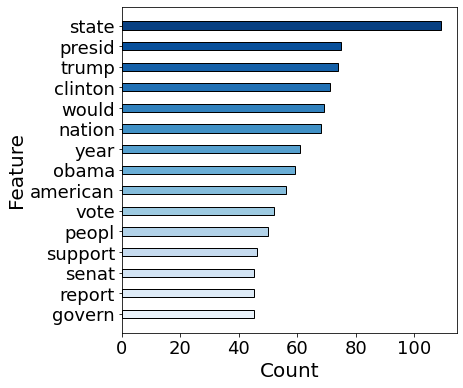

In [20]:
show_features(DS1_bow_1_feature_df, 'Blues', 15, 6, 6, 'Count')

In [27]:
show_features(DS1_bow_2_feature_df, 'Blues', 15, 6, 6, 'Count')

In [28]:
show_features(DS1_bow_3_feature_df, 'Blues', 15, 3, 6, 'Count')

In [29]:
show_features(DS1_tfidf_1_feature_df, 'Oranges', 15, 6, 6, 'Score')

In [30]:
show_features(DS1_tfidf_2_feature_df, 'Oranges', 15, 6, 6, 'Score')

In [31]:
show_features(DS1_tfidf_3_feature_df, 'Oranges', 15, 3, 6, 'Score')

## Dataset 2

In [21]:
DS2_bow_1_res, DS2_bow_1_time, DS2_bow_1_mem = feature_extraction(DS2_final_df,DS2_corpus,'bow',1)

DS2_bow_1_x = DS2_bow_1_res[0]
DS2_bow_1_y = DS2_bow_1_res[1]
DS2_bow_1_vectorizer = DS2_bow_1_res[2]
DS2_bow_1_feature_df = DS2_bow_1_res[3]

Running Memory: 28.55 MB
Running Time: 26.35 Seconds


In [33]:
DS2_bow_2_res, DS2_bow_2_time, DS2_bow_2_mem = feature_extraction(DS2_final_df,DS2_corpus,'bow',2)

DS2_bow_2_x = DS2_bow_2_res[0]
DS2_bow_2_y = DS2_bow_2_res[1]
DS2_bow_2_vectorizer = DS2_bow_2_res[2]
DS2_bow_2_feature_df = DS2_bow_2_res[3]

Running Memory: 498.06 MB
Running Time: 39.32 Seconds


In [34]:
DS2_bow_3_res, DS2_bow_3_time, DS2_bow_3_mem = feature_extraction(DS2_final_df,DS2_corpus,'bow',3)

DS2_bow_3_x = DS2_bow_3_res[0]
DS2_bow_3_y = DS2_bow_3_res[1]
DS2_bow_3_vectorizer = DS2_bow_3_res[2]
DS2_bow_3_feature_df = DS2_bow_3_res[3]

Running Memory: 504.11 MB
Running Time: 72.01 Seconds


In [35]:
DS2_tfidf_1_res, DS2_tfidf_1_time, DS2_tfidf_1_mem = feature_extraction(DS2_final_df,DS2_corpus,'tf-idf',1)

DS2_tfidf_1_x = DS2_tfidf_1_res[0]
DS2_tfidf_1_y = DS2_tfidf_1_res[1]
DS2_tfidf_1_vectorizer = DS2_tfidf_1_res[2]
DS2_tfidf_1_feature_df = DS2_tfidf_1_res[3]

Running Memory: 158.53 MB
Running Time: 12.00 Seconds


In [36]:
DS2_tfidf_2_res, DS2_tfidf_2_time, DS2_tfidf_2_mem = feature_extraction(DS2_final_df,DS2_corpus,'tf-idf',2)

DS2_tfidf_2_x = DS2_tfidf_2_res[0]
DS2_tfidf_2_y = DS2_tfidf_2_res[1]
DS2_tfidf_2_vectorizer = DS2_tfidf_2_res[2]
DS2_tfidf_2_feature_df = DS2_tfidf_2_res[3]

Running Memory: 156.34 MB
Running Time: 42.45 Seconds


In [37]:
DS2_tfidf_3_res, DS2_tfidf_3_time, DS2_tfidf_3_mem = feature_extraction(DS2_final_df,DS2_corpus,'tf-idf',3)

DS2_tfidf_3_x = DS2_tfidf_3_res[0]
DS2_tfidf_3_y = DS2_tfidf_3_res[1]
DS2_tfidf_3_vectorizer = DS2_tfidf_3_res[2]
DS2_tfidf_3_feature_df = DS2_tfidf_3_res[3]

Running Memory: 800.36 MB
Running Time: 77.08 Seconds


In [38]:
DS2_feature_mem  = [DS2_bow_1_mem, DS2_bow_2_mem, DS2_bow_3_mem, DS2_tfidf_1_mem,  DS2_tfidf_2_mem,  DS2_tfidf_3_mem]
DS2_feature_time = [DS2_bow_1_time, DS2_bow_2_time, DS2_bow_3_time, DS2_tfidf_1_time, DS2_tfidf_2_time, DS2_tfidf_3_time]

this_df_2 = pd.DataFrame()
this_df_2['Time (S)']    = DS2_feature_time
this_df_2['Memory (MB)'] = DS2_feature_mem
this_df_2.index = ['BoW(n=1)','BoW(n=2)','BoW(n=3)','TF-IDF(n=1)','TF-IDF(n=2)','TF-IDF(n=3)']

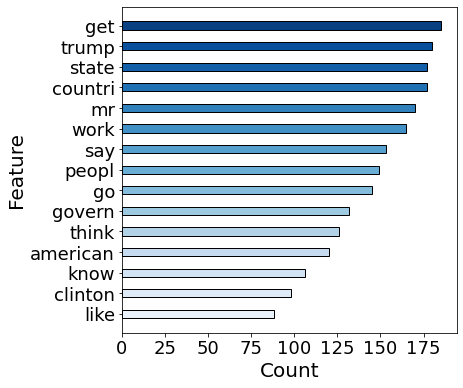

In [23]:
show_features(DS2_bow_1_feature_df, 'Blues', 15, 6, 6, 'Count')

In [41]:
show_features(DS2_bow_2_feature_df, 'Blues', 15, 6, 6, 'Count')

In [42]:
show_features(DS2_bow_3_feature_df, 'Blues', 15, 3, 6, 'Count')

In [43]:
show_features(DS2_tfidf_1_feature_df, 'Oranges', 15, 6, 6, 'Score')

In [44]:
show_features(DS2_tfidf_2_feature_df, 'Oranges', 15, 6, 6, 'Score')

In [45]:
show_features(DS2_tfidf_3_feature_df, 'Oranges', 15, 3, 6, 'Score')

## Dataset 3

In [24]:
DS3_bow_1_res, DS3_bow_1_time, DS3_bow_1_mem = feature_extraction(DS3_final_df,DS3_corpus,'bow',1)

DS3_bow_1_x = DS3_bow_1_res[0]
DS3_bow_1_y = DS3_bow_1_res[1]
DS3_bow_1_vectorizer = DS3_bow_1_res[2]
DS3_bow_1_feature_df = DS3_bow_1_res[3]

Running Memory: 7.24 MB
Running Time: 2.98 Seconds


In [17]:
DS3_bow_2_res, DS3_bow_2_time, DS3_bow_2_mem = feature_extraction(DS3_final_df,DS3_corpus,'bow',2)

DS3_bow_2_x = DS3_bow_2_res[0]
DS3_bow_2_y = DS3_bow_2_res[1]
DS3_bow_2_vectorizer = DS3_bow_2_res[2]
DS3_bow_2_feature_df = DS3_bow_2_res[3]

Running Memory: 88.00 MB
Running Time: 7.58 Seconds


In [18]:
DS3_bow_3_res, DS3_bow_3_time, DS3_bow_3_mem = feature_extraction(DS3_final_df,DS3_corpus,'bow',3)

DS3_bow_3_x = DS3_bow_3_res[0]
DS3_bow_3_y = DS3_bow_3_res[1]
DS3_bow_3_vectorizer = DS3_bow_3_res[2]
DS3_bow_3_feature_df = DS3_bow_3_res[3]

Running Memory: 140.24 MB
Running Time: 9.06 Seconds


In [19]:
DS3_tfidf_1_res, DS3_tfidf_1_time, DS3_tfidf_1_mem = feature_extraction(DS3_final_df,DS3_corpus,'tf-idf',1)

DS3_tfidf_1_x = DS3_tfidf_1_res[0]
DS3_tfidf_1_y = DS3_tfidf_1_res[1]
DS3_tfidf_1_vectorizer = DS3_tfidf_1_res[2]
DS3_tfidf_1_feature_df = DS3_tfidf_1_res[3]

Running Memory: 4.48 MB
Running Time: 2.54 Seconds


In [20]:
DS3_tfidf_2_res, DS3_tfidf_2_time, DS3_tfidf_2_mem = feature_extraction(DS3_final_df,DS3_corpus,'tf-idf',2)

DS3_tfidf_2_x = DS3_tfidf_2_res[0]
DS3_tfidf_2_y = DS3_tfidf_2_res[1]
DS3_tfidf_2_vectorizer = DS3_tfidf_2_res[2]
DS3_tfidf_2_feature_df = DS3_tfidf_2_res[3]

Running Memory: 67.93 MB
Running Time: 7.55 Seconds


In [21]:
DS3_tfidf_3_res, DS3_tfidf_3_time, DS3_tfidf_3_mem = feature_extraction(DS3_final_df,DS3_corpus,'tf-idf',3)

DS3_tfidf_3_x = DS3_tfidf_3_res[0]
DS3_tfidf_3_y = DS3_tfidf_3_res[1]
DS3_tfidf_3_vectorizer = DS3_tfidf_3_res[2]
DS3_tfidf_3_feature_df = DS3_tfidf_3_res[3]

Running Memory: 138.73 MB
Running Time: 8.97 Seconds


In [22]:
DS3_feature_mem  = [DS3_bow_1_mem, DS3_bow_2_mem, DS3_bow_3_mem, DS3_tfidf_1_mem,  DS3_tfidf_2_mem,  DS3_tfidf_3_mem]
DS3_feature_time = [DS3_bow_1_time, DS3_bow_2_time, DS3_bow_3_time, DS3_tfidf_1_time, DS3_tfidf_2_time, DS3_tfidf_3_time]

this_df_3 = pd.DataFrame()
this_df_3['Time (S)'] = DS3_feature_time
this_df_3['Memory (MB)'] = DS3_feature_mem
this_df_3.index = ['BoW(n=1)','BoW(n=2)','BoW(n=3)','TF-IDF(n=1)','TF-IDF(n=2)','TF-IDF(n=3)']
this_df_3.round(2)

,Time (S),Memory (MB)
BoW(n=1),2.58,8.73
BoW(n=2),7.58,88.00
BoW(n=3),9.06,140.24
TF-IDF(n=1),2.54,4.48
TF-IDF(n=2),7.55,67.93
TF-IDF(n=3),8.97,138.73


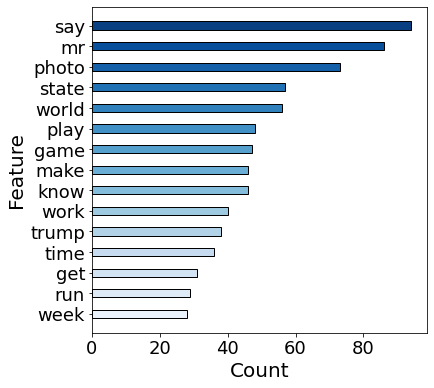

In [26]:
show_features(DS3_bow_1_feature_df, 'Blues', 15, 6, 6, 'Count')

In [55]:
show_features(DS3_bow_2_feature_df, 'Blues', 15, 6, 6, 'Count')

In [56]:
show_features(DS3_bow_3_feature_df, 'Blues', 15, 3, 6, 'Count')

In [57]:
show_features(DS3_tfidf_1_feature_df, 'Oranges', 15, 6, 6, 'Score')

In [58]:
show_features(DS3_tfidf_2_feature_df, 'Oranges', 15, 6, 6，'Score')

In [59]:
show_features(DS3_tfidf_3_feature_df, 'Oranges', 15, 3, 6，'Score')

# Data Split

In [26]:
def split(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 20)
    return x_train, x_test, y_train, y_test

## Dataset 1 

In [27]:
DS1_bow_1_x_train, DS1_bow_1_x_test, DS1_bow_1_y_train, DS1_bow_1_y_test = split(DS1_bow_1_x,DS1_bow_1_y)
DS1_bow_2_x_train, DS1_bow_2_x_test, DS1_bow_2_y_train, DS1_bow_2_y_test = split(DS1_bow_2_x,DS1_bow_2_y)
DS1_bow_3_x_train, DS1_bow_3_x_test, DS1_bow_3_y_train, DS1_bow_3_y_test = split(DS1_bow_3_x,DS1_bow_3_y)
DS1_tfidf_1_x_train, DS1_tfidf_1_x_test, DS1_tfidf_1_y_train, DS1_tfidf_1_y_test = split(DS1_tfidf_1_x,DS1_tfidf_1_y)
DS1_tfidf_2_x_train, DS1_tfidf_2_x_test, DS1_tfidf_2_y_train, DS1_tfidf_2_y_test = split(DS1_tfidf_2_x,DS1_tfidf_2_y)
DS1_tfidf_3_x_train, DS1_tfidf_3_x_test, DS1_tfidf_3_y_train, DS1_tfidf_3_y_test = split(DS1_tfidf_3_x,DS1_tfidf_3_y)

## Dataset 2

In [62]:
DS2_bow_1_x_train, DS2_bow_1_x_test, DS2_bow_1_y_train, DS2_bow_1_y_test = split(DS2_bow_1_x,DS2_bow_1_y)
DS2_bow_2_x_train, DS2_bow_2_x_test, DS2_bow_2_y_train, DS2_bow_2_y_test = split(DS2_bow_2_x,DS2_bow_2_y)
DS2_bow_3_x_train, DS2_bow_3_x_test, DS2_bow_3_y_train, DS2_bow_3_y_test = split(DS2_bow_3_x,DS2_bow_3_y)
DS2_tfidf_1_x_train, DS2_tfidf_1_x_test, DS2_tfidf_1_y_train, DS2_tfidf_1_y_test = split(DS2_tfidf_1_x,DS2_tfidf_1_y)
DS2_tfidf_2_x_train, DS2_tfidf_2_x_test, DS2_tfidf_2_y_train, DS2_tfidf_2_y_test = split(DS2_tfidf_2_x,DS2_tfidf_2_y)
#DS2_tfidf_3_x_train, DS2_tfidf_3_x_test, DS2_tfidf_3_y_train, DS2_tfidf_3_y_test = split(DS2_tfidf_3_x,DS2_tfidf_3_y)

In [63]:
DS2_bow_1_x_train, DS2_bow_1_x_test, DS2_bow_1_y_train, DS2_bow_1_y_test = split(DS2_bow_1_x,DS2_bow_1_y)
DS2_bow_2_x_train, DS2_bow_2_x_test, DS2_bow_2_y_train, DS2_bow_2_y_test = split(DS2_bow_2_x,DS2_bow_2_y)
DS2_bow_3_x_train, DS2_bow_3_x_test, DS2_bow_3_y_train, DS2_bow_3_y_test = split(DS2_bow_3_x,DS2_bow_3_y)
DS2_tfidf_1_x_train, DS2_tfidf_1_x_test, DS2_tfidf_1_y_train, DS2_tfidf_1_y_test = split(DS2_tfidf_1_x,DS2_tfidf_1_y)
DS2_tfidf_2_x_train, DS2_tfidf_2_x_test, DS2_tfidf_2_y_train, DS2_tfidf_2_y_test = split(DS2_tfidf_2_x,DS2_tfidf_2_y)
DS2_tfidf_3_x_train, DS2_tfidf_3_x_test, DS2_tfidf_3_y_train, DS2_tfidf_3_y_test = split(DS2_tfidf_3_x,DS2_tfidf_3_y)

## Dataset 3

In [24]:
DS3_bow_1_x_train, DS3_bow_1_x_test, DS3_bow_1_y_train, DS3_bow_1_y_test = split(DS3_bow_1_x,DS3_bow_1_y)
DS3_bow_2_x_train, DS3_bow_2_x_test, DS3_bow_2_y_train, DS3_bow_2_y_test = split(DS3_bow_2_x,DS3_bow_2_y)
DS3_bow_3_x_train, DS3_bow_3_x_test, DS3_bow_3_y_train, DS3_bow_3_y_test = split(DS3_bow_3_x,DS3_bow_3_y)
DS3_tfidf_1_x_train, DS3_tfidf_1_x_test, DS3_tfidf_1_y_train, DS3_tfidf_1_y_test = split(DS3_tfidf_1_x,DS3_tfidf_1_y)
DS3_tfidf_2_x_train, DS3_tfidf_2_x_test, DS3_tfidf_2_y_train, DS3_tfidf_2_y_test = split(DS3_tfidf_2_x,DS3_tfidf_2_y)
DS3_tfidf_3_x_train, DS3_tfidf_3_x_test, DS3_tfidf_3_y_train, DS3_tfidf_3_y_test = split(DS3_tfidf_3_x,DS3_tfidf_3_y)

In [28]:
SKF = StratifiedKFold(n_splits=10, random_state=20, shuffle=True)

# Train and Predict

In [29]:
@profile_1
def train(x_train, y_train, classifier, SKF):
    model  = classifier.fit(x_train, y_train)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=SKF) 
    print("Train Accuracy: %.4f" % (np.mean(scores)))    

In [30]:
def predict(x_test, y_test, classifier):
    y_pred = classifier.predict(x_test)
   
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Test  Accuracy: %.4f" % acc)
    print("Test  Presion:  %.4f" % pre)
    print("Test  Recall:   %.4f" % rec)
    print("Test  F1-score: %.4f" % f1)
    return cm, acc, pre, rec, f1

In [31]:
def show_confusion_maxtrix(cm, model, method):
    new_cm = pd.DataFrame(cm)
    ax = sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='', annot_kws={"fontsize":14})
    plt.xlabel("Actual",fontsize=14)
    plt.ylabel("Predicted",fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=13)
    plt.title('Confusion matrix: '+ model+method,fontsize=15)
    plt.show()

In [32]:
model_1  = ' LR'
model_2  = ' LSVM'
model_3  = ' MLP'
model_4  = ' KNN'
model_5  = ' RF'
model_6  = ' Voting 1' #(RF, LR, KNN)
model_7  = ' Voting 2' #(LR, LSVM, CART)
model_8  = ' Bagging'
model_9  = ' AdaBoost'
model_10 = ' XGBoost'

method_1 = ' (BoW) (n=1)'
method_2 = ' (BoW) (n=2)'
method_3 = ' (BoW) (n=3)'
method_4 = ' (TF-IDF) (n=1)'
method_5 = ' (TF-IDF) (n=2)'
method_6 = ' (TF-IDF) (n=3)'

In [33]:
classifier_LR = LogisticRegression(random_state=20)

In [34]:
classifier_LSVM = LinearSVC()

In [35]:
classifier_MLP = MLPClassifier(solver='sgd', activation='relu', alpha=1e-4, hidden_layer_sizes=(50, 50), random_state=20,
                    max_iter=50, verbose=True, learning_rate_init=.1)

In [36]:
classifier_KNN = KNeighborsClassifier()

In [37]:
classifier_RF = RandomForestClassifier(random_state=20)

In [38]:
rf  =  RandomForestClassifier(random_state=20)
lr  =  LogisticRegression(random_state=20)
knn =  KNeighborsClassifier()
lsvm =  LinearSVC()
cart =  DecisionTreeClassifier(random_state=20)

classifier_VOT_1 = VotingClassifier(estimators=[('RF',rf), ('LR',lr), ('KNN',knn)],voting='hard')
classifier_VOT_2 = VotingClassifier(estimators=[ ('LR',lr), ('LSVM',lsvm), ('CART',cart)],voting='hard')

In [39]:
classifier_BAGG = BaggingClassifier(n_estimators=100, random_state=20)

In [40]:
classifier_ADA = AdaBoostClassifier(random_state=20)

In [41]:
classifier_XG = XGBClassifier(eval_metric=['logloss','auc','error'], random_state=20)

## Dataset 1

### Logic Regression

Train Accuracy: 0.9922
Running Memory: 1.54 MB
Running Time: 1.94 Seconds
Test  Accuracy: 0.9921
Test  Presion:  0.9970
Test  Recall:   0.9878
Test  F1-score: 0.9924


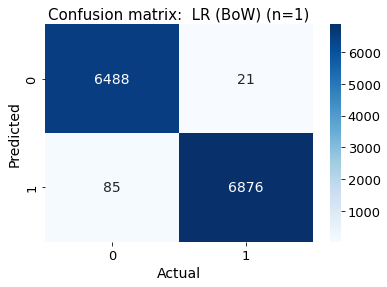

In [43]:
time_LR_DS1_bow_1, memory_LR_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_LR, SKF)
cm_LR_DS1_bow_1, acc_LR_DS1_bow_1, pre_LR_DS1_bow_1, rec_LR_DS1_bow_1, f1_LR_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS1_bow_1, model_1, method_1)

Train Accuracy: 0.8728
Running Memory: 27.10 MB
Running Time: 4.08 Seconds
Test  Accuracy: 0.8679
Test  Presion:  0.8399
Test  Recall:   0.9196
Test  F1-score: 0.8779


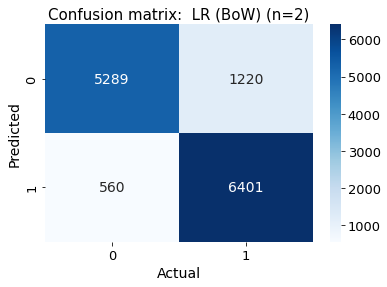

In [44]:
time_LR_DS1_bow_2, memory_LR_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_LR, SKF)
cm_LR_DS1_bow_2, acc_LR_DS1_bow_2, pre_LR_DS1_bow_2, rec_LR_DS1_bow_2, f1_LR_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS1_bow_2, model_1, method_2)

Train Accuracy: 0.7270
Running Memory: 27.02 MB
Running Time: 2.93 Seconds
Test  Accuracy: 0.7285
Test  Presion:  0.9591
Test  Recall:   0.4958
Test  F1-score: 0.6537


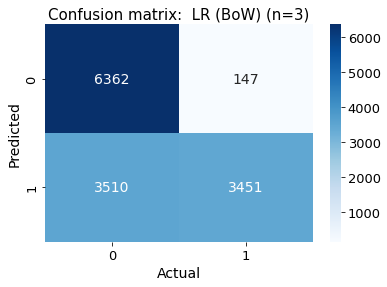

In [45]:
time_LR_DS1_bow_3, memory_LR_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_LR, SKF)
cm_LR_DS1_bow_3, acc_LR_DS1_bow_3, pre_LR_DS1_bow_3, rec_LR_DS1_bow_3, f1_LR_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS1_bow_3, model_1, method_3)

Train Accuracy: 0.9807
Running Memory: 27.80 MB
Running Time: 1.72 Seconds
Test  Accuracy: 0.9805
Test  Presion:  0.9779
Test  Recall:   0.9846
Test  F1-score: 0.9812


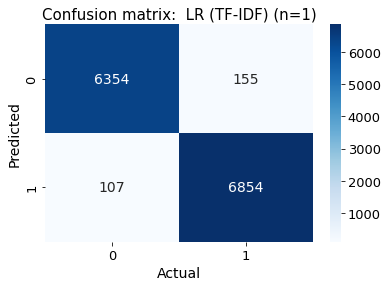

In [46]:
time_LR_DS1_tfidf_1, memory_LR_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_LR, SKF)
cm_LR_DS1_tfidf_1, acc_LR_DS1_tfidf_1, pre_LR_DS1_tfidf_1, rec_LR_DS1_tfidf_1, f1_LR_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS1_tfidf_1, model_1, method_4)

Train Accuracy: 0.8744
Running Memory: 27.02 MB
Running Time: 3.17 Seconds
Test  Accuracy: 0.8706
Test  Presion:  0.8574
Test  Recall:   0.8992
Test  F1-score: 0.8778


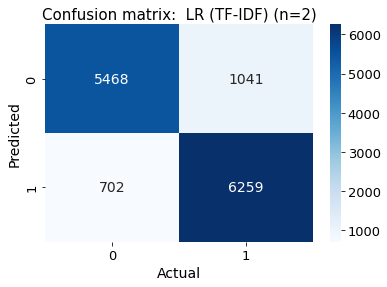

In [47]:
time_LR_DS1_tfidf_2, memory_LR_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_LR, SKF)
cm_LR_DS1_tfidf_2, acc_LR_DS1_tfidf_2, pre_LR_DS1_tfidf_2, rec_LR_DS1_tfidf_2, f1_LR_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS1_tfidf_2, model_1, method_5)

Train Accuracy: 0.7252
Running Memory: 27.00 MB
Running Time: 2.69 Seconds
Test  Accuracy: 0.7276
Test  Presion:  0.9608
Test  Recall:   0.4930
Test  F1-score: 0.6517


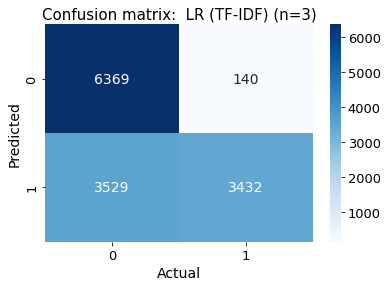

In [48]:
time_LR_DS1_tfidf_3, memory_LR_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_LR, SKF)
cm_LR_DS1_tfidf_3, acc_LR_DS1_tfidf_3, pre_LR_DS1_tfidf_3, rec_LR_DS1_tfidf_3, f1_LR_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS1_tfidf_3, model_1, method_6)

### LSVM

In [333]:
time_LSVM_DS1_bow_1, memory_LSVM_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_LSVM, SKF)
cm_LSVM_DS1_bow_1, acc_LSVM_DS1_bow_1, pre_LSVM_DS1_bow_1, rec_LSVM_DS1_bow_1, f1_LSVM_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS1_bow_1, model_2, method_1)

Train Accuracy: 0.9926
Running Memory: 18.81 MB
Running Time: 34.06 Seconds
Test  Accuracy: 0.9916
Test  Presion:  0.9975
Test  Recall:   0.9862
Test  F1-score: 0.9918


In [334]:
time_LSVM_DS1_bow_2, memory_LSVM_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_LSVM, SKF)
cm_LSVM_DS1_bow_2, acc_LSVM_DS1_bow_2, pre_LSVM_DS1_bow_2, rec_LSVM_DS1_bow_2, f1_LSVM_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS1_bow_2, model_2, method_2)

Train Accuracy: 0.8716
Running Memory: 9.88 MB
Running Time: 9.22 Seconds
Test  Accuracy: 0.8673
Test  Presion:  0.8379
Test  Recall:   0.9214
Test  F1-score: 0.8777


In [335]:
time_LSVM_DS1_bow_3, memory_LSVM_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_LSVM, SKF)
cm_LSVM_DS1_bow_3, acc_LSVM_DS1_bow_3, pre_LSVM_DS1_bow_3, rec_LSVM_DS1_bow_3, f1_LSVM_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS1_bow_3, model_2, method_3)

Train Accuracy: 0.7272
Running Memory: 9.85 MB
Running Time: 8.16 Seconds
Test  Accuracy: 0.7284
Test  Presion:  0.9591
Test  Recall:   0.4956
Test  F1-score: 0.6535


In [336]:
time_LSVM_DS1_tfidf_1, memory_LSVM_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_LSVM, SKF)
cm_LSVM_DS1_tfidf_1, acc_LSVM_DS1_tfidf_1, pre_LSVM_DS1_tfidf_1, rec_LSVM_DS1_tfidf_1, f1_LSVM_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS1_tfidf_1, model_2, method_4)

Train Accuracy: 0.9880
Running Memory: 9.84 MB
Running Time: 1.83 Seconds
Test  Accuracy: 0.9867
Test  Presion:  0.9858
Test  Recall:   0.9885
Test  F1-score: 0.9872


In [337]:
time_LSVM_DS1_tfidf_2, memory_LSVM_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_LSVM, SKF)
cm_LSVM_DS1_tfidf_2, acc_LSVM_DS1_tfidf_2, pre_LSVM_DS1_tfidf_2, rec_LSVM_DS1_tfidf_2, f1_LSVM_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS1_tfidf_2, model_2, method_5)

Train Accuracy: 0.8753
Running Memory: 9.60 MB
Running Time: 1.06 Seconds
Test  Accuracy: 0.8708
Test  Presion:  0.8577
Test  Recall:   0.8993
Test  F1-score: 0.8780


In [338]:
time_LSVM_DS1_tfidf_3, memory_LSVM_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_LSVM, SKF)
cm_LSVM_DS1_tfidf_3, acc_LSVM_DS1_tfidf_3, pre_LSVM_DS1_tfidf_3, rec_LSVM_DS1_tfidf_3, f1_LSVM_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS1_tfidf_3, model_2, method_6)

Train Accuracy: 0.7243
Running Memory: 9.61 MB
Running Time: 0.93 Seconds
Test  Accuracy: 0.7276
Test  Presion:  0.9608
Test  Recall:   0.4930
Test  F1-score: 0.6517


### MLP

In [97]:
time_MLP_DS1_bow_1, memory_MLP_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_MLP, SKF)
cm_MLP_DS1_bow_1, acc_MLP_DS1_bow_1, pre_MLP_DS1_bow_1, rec_MLP_DS1_bow_1, f1_MLP_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS1_bow_1, model_3, method_1)

Iteration 1, loss = 0.13128579
Iteration 2, loss = 0.04193800
Iteration 3, loss = 0.03898869
Iteration 4, loss = 0.03523456
Iteration 5, loss = 0.03326478
Iteration 6, loss = 0.02735376
Iteration 7, loss = 0.02834849
Iteration 8, loss = 0.02450371
Iteration 9, loss = 0.02537590
Iteration 10, loss = 0.02309595
Iteration 11, loss = 0.02168359
Iteration 12, loss = 0.02108971
Iteration 13, loss = 0.02697142
Iteration 14, loss = 0.02152942
Iteration 15, loss = 0.02231202
Iteration 16, loss = 0.01863254
Iteration 17, loss = 0.01909768
Iteration 18, loss = 0.01670793
Iteration 19, loss = 0.01576123
Iteration 20, loss = 0.01496746
Iteration 21, loss = 0.01463127
Iteration 22, loss = 0.01432350
Iteration 23, loss = 0.01496416
Iteration 24, loss = 0.01792678
Iteration 25, loss = 0.02401827
Iteration 26, loss = 0.01690089
Iteration 27, loss = 0.01430959
Iteration 28, loss = 0.01746135
Iteration 29, loss = 0.01445215
Iteration 30, loss = 0.01639260
Iteration 31, loss = 0.01271915
Iteration 32, los

Iteration 9, loss = 0.02234888
Iteration 10, loss = 0.02217296
Iteration 11, loss = 0.02177720
Iteration 12, loss = 0.02545649
Iteration 13, loss = 0.02502377
Iteration 14, loss = 0.02112000
Iteration 15, loss = 0.01834870
Iteration 16, loss = 0.01932374
Iteration 17, loss = 0.01785858
Iteration 18, loss = 0.01765026
Iteration 19, loss = 0.01735738
Iteration 20, loss = 0.01884261
Iteration 21, loss = 0.01476676
Iteration 22, loss = 0.01380486
Iteration 23, loss = 0.01283584
Iteration 24, loss = 0.02088722
Iteration 25, loss = 0.01263294
Iteration 26, loss = 0.01082623
Iteration 27, loss = 0.01340142
Iteration 28, loss = 0.01064761
Iteration 29, loss = 0.01876806
Iteration 30, loss = 0.01150994
Iteration 31, loss = 0.00860295
Iteration 32, loss = 0.00832678
Iteration 33, loss = 0.00671369
Iteration 34, loss = 0.00800747
Iteration 35, loss = 0.00834345
Iteration 36, loss = 0.00614933
Iteration 37, loss = 0.01494068
Iteration 38, loss = 0.00953336
Iteration 39, loss = 0.02636042
Iteration

Iteration 17, loss = 0.01679519
Iteration 18, loss = 0.01576782
Iteration 19, loss = 0.01617654
Iteration 20, loss = 0.01434042
Iteration 21, loss = 0.01272023
Iteration 22, loss = 0.01344974
Iteration 23, loss = 0.01435333
Iteration 24, loss = 0.01336632
Iteration 25, loss = 0.01090587
Iteration 26, loss = 0.01554131
Iteration 27, loss = 0.02041425
Iteration 28, loss = 0.01920881
Iteration 29, loss = 0.02095692
Iteration 30, loss = 0.01202508
Iteration 31, loss = 0.01043802
Iteration 32, loss = 0.01000977
Iteration 33, loss = 0.01545953
Iteration 34, loss = 0.01604372
Iteration 35, loss = 0.01304582
Iteration 36, loss = 0.01804733
Iteration 37, loss = 0.01415384
Iteration 38, loss = 0.01019539
Iteration 39, loss = 0.00735746
Iteration 40, loss = 0.01160119
Iteration 41, loss = 0.00789764
Iteration 42, loss = 0.00905202
Iteration 43, loss = 0.00545844
Iteration 44, loss = 0.00586776
Iteration 45, loss = 0.00524474
Iteration 46, loss = 0.00860896
Iteration 47, loss = 0.00638686
Iteratio

In [98]:
time_MLP_DS1_bow_2, memory_MLP_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_MLP, SKF)
cm_MLP_DS1_bow_2, acc_MLP_DS1_bow_2, pre_MLP_DS1_bow_2, rec_MLP_DS1_bow_2, f1_MLP_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS1_bow_2, model_3, method_2)

Iteration 1, loss = 0.30000068
Iteration 2, loss = 0.25348678
Iteration 3, loss = 0.24713186
Iteration 4, loss = 0.24259821
Iteration 5, loss = 0.24000650
Iteration 6, loss = 0.23784394
Iteration 7, loss = 0.23531795
Iteration 8, loss = 0.23461686
Iteration 9, loss = 0.23280488
Iteration 10, loss = 0.23076168
Iteration 11, loss = 0.22956946
Iteration 12, loss = 0.23102106
Iteration 13, loss = 0.22746453
Iteration 14, loss = 0.22765058
Iteration 15, loss = 0.22607987
Iteration 16, loss = 0.22517974
Iteration 17, loss = 0.22457562
Iteration 18, loss = 0.22320885
Iteration 19, loss = 0.22281152
Iteration 20, loss = 0.22205175
Iteration 21, loss = 0.22025513
Iteration 22, loss = 0.22152313
Iteration 23, loss = 0.21902537
Iteration 24, loss = 0.21835806
Iteration 25, loss = 0.21788871
Iteration 26, loss = 0.21640061
Iteration 27, loss = 0.21753063
Iteration 28, loss = 0.21501083
Iteration 29, loss = 0.21395160
Iteration 30, loss = 0.21385931
Iteration 31, loss = 0.21357909
Iteration 32, los

Iteration 9, loss = 0.23166705
Iteration 10, loss = 0.23205756
Iteration 11, loss = 0.22996246
Iteration 12, loss = 0.22930972
Iteration 13, loss = 0.22726738
Iteration 14, loss = 0.22684715
Iteration 15, loss = 0.22655120
Iteration 16, loss = 0.22551469
Iteration 17, loss = 0.22511724
Iteration 18, loss = 0.22323745
Iteration 19, loss = 0.22170149
Iteration 20, loss = 0.22253370
Iteration 21, loss = 0.22042791
Iteration 22, loss = 0.21924334
Iteration 23, loss = 0.21886539
Iteration 24, loss = 0.21663002
Iteration 25, loss = 0.21624657
Iteration 26, loss = 0.21830900
Iteration 27, loss = 0.21620639
Iteration 28, loss = 0.21420244
Iteration 29, loss = 0.21353564
Iteration 30, loss = 0.21461041
Iteration 31, loss = 0.21401529
Iteration 32, loss = 0.21322955
Iteration 33, loss = 0.21253051
Iteration 34, loss = 0.21127465
Iteration 35, loss = 0.21130201
Iteration 36, loss = 0.21074601
Iteration 37, loss = 0.20861309
Iteration 38, loss = 0.20814627
Iteration 39, loss = 0.20793251
Iteration

Iteration 18, loss = 0.22282399
Iteration 19, loss = 0.22153092
Iteration 20, loss = 0.22085885
Iteration 21, loss = 0.21945267
Iteration 22, loss = 0.21916372
Iteration 23, loss = 0.21732648
Iteration 24, loss = 0.21769811
Iteration 25, loss = 0.21585546
Iteration 26, loss = 0.21492193
Iteration 27, loss = 0.21496390
Iteration 28, loss = 0.21432815
Iteration 29, loss = 0.21299338
Iteration 30, loss = 0.21259170
Iteration 31, loss = 0.21147061
Iteration 32, loss = 0.21191255
Iteration 33, loss = 0.21085768
Iteration 34, loss = 0.21053253
Iteration 35, loss = 0.20941008
Iteration 36, loss = 0.20822936
Iteration 37, loss = 0.20810417
Iteration 38, loss = 0.20748707
Iteration 39, loss = 0.20623061
Iteration 40, loss = 0.20678623
Iteration 41, loss = 0.20593953
Iteration 42, loss = 0.20331110
Iteration 43, loss = 0.20201598
Iteration 44, loss = 0.20291603
Iteration 45, loss = 0.20175067
Iteration 46, loss = 0.20334150
Iteration 47, loss = 0.20245909
Iteration 48, loss = 0.20163122
Iteratio

In [342]:
time_MLP_DS1_bow_3, memory_MLP_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_MLP, SKF)
cm_MLP_DS1_bow_3, acc_MLP_DS1_bow_3, pre_MLP_DS1_bow_3, rec_MLP_DS1_bow_3, f1_MLP_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS1_bow_3, model_3, method_3)

Iteration 1, loss = 0.46900733
Iteration 2, loss = 0.43537452
Iteration 3, loss = 0.43379877
Iteration 4, loss = 0.43077870
Iteration 5, loss = 0.43000889
Iteration 6, loss = 0.42957323
Iteration 7, loss = 0.42801963
Iteration 8, loss = 0.42778455
Iteration 9, loss = 0.42712478
Iteration 10, loss = 0.42624567
Iteration 11, loss = 0.42660381
Iteration 12, loss = 0.42687993
Iteration 13, loss = 0.42543574
Iteration 14, loss = 0.42512543
Iteration 15, loss = 0.42550348
Iteration 16, loss = 0.42473082
Iteration 17, loss = 0.42421734
Iteration 18, loss = 0.42422708
Iteration 19, loss = 0.42391078
Iteration 20, loss = 0.42340354
Iteration 21, loss = 0.42313503
Iteration 22, loss = 0.42319398
Iteration 23, loss = 0.42360607
Iteration 24, loss = 0.42259520
Iteration 25, loss = 0.42317536
Iteration 26, loss = 0.42164338
Iteration 27, loss = 0.42230054
Iteration 28, loss = 0.42227293
Iteration 29, loss = 0.42188515
Iteration 30, loss = 0.42152035
Iteration 31, loss = 0.42139623
Iteration 32, los

Iteration 9, loss = 0.42780808
Iteration 10, loss = 0.42657239
Iteration 11, loss = 0.42656690
Iteration 12, loss = 0.42552212
Iteration 13, loss = 0.42535596
Iteration 14, loss = 0.42574116
Iteration 15, loss = 0.42411734
Iteration 16, loss = 0.42413966
Iteration 17, loss = 0.42399484
Iteration 18, loss = 0.42415965
Iteration 19, loss = 0.42347526
Iteration 20, loss = 0.42341510
Iteration 21, loss = 0.42301775
Iteration 22, loss = 0.42275564
Iteration 23, loss = 0.42172858
Iteration 24, loss = 0.42251303
Iteration 25, loss = 0.42254355
Iteration 26, loss = 0.42277545
Iteration 27, loss = 0.42165030
Iteration 28, loss = 0.42193985
Iteration 29, loss = 0.42093112
Iteration 30, loss = 0.42070926
Iteration 31, loss = 0.42140608
Iteration 32, loss = 0.42087631
Iteration 33, loss = 0.42121667
Iteration 34, loss = 0.42040164
Iteration 35, loss = 0.42083632
Iteration 36, loss = 0.42028331
Iteration 37, loss = 0.41979326
Iteration 38, loss = 0.42061867
Iteration 39, loss = 0.42009658
Iteration

Iteration 18, loss = 0.42394452
Iteration 19, loss = 0.42392477
Iteration 20, loss = 0.42398804
Iteration 21, loss = 0.42395272
Iteration 22, loss = 0.42292443
Iteration 23, loss = 0.42354013
Iteration 24, loss = 0.42241118
Iteration 25, loss = 0.42318648
Iteration 26, loss = 0.42275811
Iteration 27, loss = 0.42260817
Iteration 28, loss = 0.42247028
Iteration 29, loss = 0.42195538
Iteration 30, loss = 0.42186671
Iteration 31, loss = 0.42232974
Iteration 32, loss = 0.42071335
Iteration 33, loss = 0.42172683
Iteration 34, loss = 0.42116588
Iteration 35, loss = 0.42101176
Iteration 36, loss = 0.42124440
Iteration 37, loss = 0.42057874
Iteration 38, loss = 0.42042925
Iteration 39, loss = 0.41986654
Iteration 40, loss = 0.42019364
Iteration 41, loss = 0.42033751
Iteration 42, loss = 0.41975085
Iteration 43, loss = 0.41916104
Iteration 44, loss = 0.41955029
Iteration 45, loss = 0.41936018
Iteration 46, loss = 0.41930238
Iteration 47, loss = 0.41925550
Iteration 48, loss = 0.41878894
Iteratio

In [100]:
time_MLP_DS1_tfidf_1, memory_MLP_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_MLP, SKF)
cm_MLP_DS1_tfidf_1, acc_MLP_DS1_tfidf_1, pre_MLP_DS1_tfidf_1, rec_MLP_DS1_tfidf_1, f1_MLP_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS1_tfidf_1, model_3, method_4)

Iteration 1, loss = 0.19701872
Iteration 2, loss = 0.05575562
Iteration 3, loss = 0.04847260
Iteration 4, loss = 0.04393710
Iteration 5, loss = 0.04104780
Iteration 6, loss = 0.03764490
Iteration 7, loss = 0.03606758
Iteration 8, loss = 0.03369157
Iteration 9, loss = 0.03222800
Iteration 10, loss = 0.03151140
Iteration 11, loss = 0.03027621
Iteration 12, loss = 0.02910134
Iteration 13, loss = 0.03307784
Iteration 14, loss = 0.02960876
Iteration 15, loss = 0.02734724
Iteration 16, loss = 0.02750764
Iteration 17, loss = 0.02740917
Iteration 18, loss = 0.02638641
Iteration 19, loss = 0.02583965
Iteration 20, loss = 0.02583967
Iteration 21, loss = 0.02675961
Iteration 22, loss = 0.02607254
Iteration 23, loss = 0.02416062
Iteration 24, loss = 0.02630861
Iteration 25, loss = 0.02371564
Iteration 26, loss = 0.02298468
Iteration 27, loss = 0.02294152
Iteration 28, loss = 0.02292414
Iteration 29, loss = 0.02278739
Iteration 30, loss = 0.02149942
Iteration 31, loss = 0.02164079
Iteration 32, los

Iteration 9, loss = 0.03349052
Iteration 10, loss = 0.03210462
Iteration 11, loss = 0.03112863
Iteration 12, loss = 0.03061458
Iteration 13, loss = 0.02964542
Iteration 14, loss = 0.02945421
Iteration 15, loss = 0.03130879
Iteration 16, loss = 0.02771127
Iteration 17, loss = 0.02836793
Iteration 18, loss = 0.02687665
Iteration 19, loss = 0.02698967
Iteration 20, loss = 0.02625623
Iteration 21, loss = 0.02587985
Iteration 22, loss = 0.02626600
Iteration 23, loss = 0.02627848
Iteration 24, loss = 0.02751348
Iteration 25, loss = 0.02436012
Iteration 26, loss = 0.02361222
Iteration 27, loss = 0.02372466
Iteration 28, loss = 0.02371493
Iteration 29, loss = 0.02349817
Iteration 30, loss = 0.02210422
Iteration 31, loss = 0.02162664
Iteration 32, loss = 0.02149521
Iteration 33, loss = 0.02209374
Iteration 34, loss = 0.02176916
Iteration 35, loss = 0.02276550
Iteration 36, loss = 0.02041563
Iteration 37, loss = 0.01948391
Iteration 38, loss = 0.02094943
Iteration 39, loss = 0.01949678
Iteration

Iteration 17, loss = 0.02786459
Iteration 18, loss = 0.02674294
Iteration 19, loss = 0.02683170
Iteration 20, loss = 0.02620182
Iteration 21, loss = 0.02621805
Iteration 22, loss = 0.02640563
Iteration 23, loss = 0.02464975
Iteration 24, loss = 0.02539841
Iteration 25, loss = 0.02455578
Iteration 26, loss = 0.02375056
Iteration 27, loss = 0.02419586
Iteration 28, loss = 0.02357853
Iteration 29, loss = 0.02329288
Iteration 30, loss = 0.02277817
Iteration 31, loss = 0.02358584
Iteration 32, loss = 0.02153241
Iteration 33, loss = 0.02249194
Iteration 34, loss = 0.02048167
Iteration 35, loss = 0.02091150
Iteration 36, loss = 0.02000403
Iteration 37, loss = 0.02157499
Iteration 38, loss = 0.01984990
Iteration 39, loss = 0.01896374
Iteration 40, loss = 0.01883698
Iteration 41, loss = 0.01877575
Iteration 42, loss = 0.01893807
Iteration 43, loss = 0.01934575
Iteration 44, loss = 0.01811655
Iteration 45, loss = 0.01780758
Iteration 46, loss = 0.01744183
Iteration 47, loss = 0.01693656
Iteratio

In [340]:
time_MLP_DS1_tfidf_2, memory_MLP_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_MLP, SKF)
cm_MLP_DS1_tfidf_2, acc_MLP_DS1_tfidf_2, pre_MLP_DS1_tfidf_2, rec_MLP_DS1_tfidf_2, f1_MLP_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS1_tfidf_2, model_3, method_5)

Iteration 1, loss = 0.33128253
Iteration 2, loss = 0.26991698
Iteration 3, loss = 0.26417065
Iteration 4, loss = 0.25941858
Iteration 5, loss = 0.25780923
Iteration 6, loss = 0.25498434
Iteration 7, loss = 0.25229486
Iteration 8, loss = 0.25106801
Iteration 9, loss = 0.24931910
Iteration 10, loss = 0.24811395
Iteration 11, loss = 0.24659651
Iteration 12, loss = 0.24645447
Iteration 13, loss = 0.24427200
Iteration 14, loss = 0.24396847
Iteration 15, loss = 0.24323844
Iteration 16, loss = 0.24150139
Iteration 17, loss = 0.24139518
Iteration 18, loss = 0.24030025
Iteration 19, loss = 0.23956620
Iteration 20, loss = 0.23865762
Iteration 21, loss = 0.23816796
Iteration 22, loss = 0.23845887
Iteration 23, loss = 0.23692466
Iteration 24, loss = 0.23557178
Iteration 25, loss = 0.23701618
Iteration 26, loss = 0.23541335
Iteration 27, loss = 0.23609593
Iteration 28, loss = 0.23406806
Iteration 29, loss = 0.23344524
Iteration 30, loss = 0.23372958
Iteration 31, loss = 0.23311706
Iteration 32, los

Iteration 9, loss = 0.25093060
Iteration 10, loss = 0.24907521
Iteration 11, loss = 0.24791579
Iteration 12, loss = 0.24692376
Iteration 13, loss = 0.24531769
Iteration 14, loss = 0.24490174
Iteration 15, loss = 0.24439790
Iteration 16, loss = 0.24295511
Iteration 17, loss = 0.24252928
Iteration 18, loss = 0.24112655
Iteration 19, loss = 0.23998046
Iteration 20, loss = 0.24011106
Iteration 21, loss = 0.23873939
Iteration 22, loss = 0.23830516
Iteration 23, loss = 0.23807279
Iteration 24, loss = 0.23652605
Iteration 25, loss = 0.23609116
Iteration 26, loss = 0.23700129
Iteration 27, loss = 0.23609464
Iteration 28, loss = 0.23568189
Iteration 29, loss = 0.23430508
Iteration 30, loss = 0.23535408
Iteration 31, loss = 0.23424971
Iteration 32, loss = 0.23415260
Iteration 33, loss = 0.23429683
Iteration 34, loss = 0.23225996
Iteration 35, loss = 0.23274936
Iteration 36, loss = 0.23238220
Iteration 37, loss = 0.23213466
Iteration 38, loss = 0.23031222
Iteration 39, loss = 0.23021970
Iteration

Iteration 18, loss = 0.24345727
Iteration 19, loss = 0.24181638
Iteration 20, loss = 0.24169396
Iteration 21, loss = 0.24153527
Iteration 22, loss = 0.23984359
Iteration 23, loss = 0.23956956
Iteration 24, loss = 0.23828327
Iteration 25, loss = 0.23878121
Iteration 26, loss = 0.23773575
Iteration 27, loss = 0.23645545
Iteration 28, loss = 0.23527482
Iteration 29, loss = 0.23488919
Iteration 30, loss = 0.23522236
Iteration 31, loss = 0.23455251
Iteration 32, loss = 0.23410063
Iteration 33, loss = 0.23500366
Iteration 34, loss = 0.23364313
Iteration 35, loss = 0.23277322
Iteration 36, loss = 0.23306614
Iteration 37, loss = 0.23229376
Iteration 38, loss = 0.23140453
Iteration 39, loss = 0.23177898
Iteration 40, loss = 0.22970474
Iteration 41, loss = 0.23062848
Iteration 42, loss = 0.22980869
Iteration 43, loss = 0.22909986
Iteration 44, loss = 0.22871277
Iteration 45, loss = 0.22907234
Iteration 46, loss = 0.22938337
Iteration 47, loss = 0.22811781
Iteration 48, loss = 0.22774198
Iteratio

In [102]:
time_MLP_DS1_tfidf_3, memory_MLP_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_MLP, SKF)
cm_MLP_DS1_tfidf_3, acc_MLP_DS1_tfidf_3, pre_MLP_DS1_tfidf_3, rec_MLP_DS1_tfidf_3, f1_MLP_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS1_tfidf_3, model_3, method_6)

Iteration 1, loss = 0.48527600
Iteration 2, loss = 0.44272121
Iteration 3, loss = 0.44056342
Iteration 4, loss = 0.43731293
Iteration 5, loss = 0.43603489
Iteration 6, loss = 0.43550246
Iteration 7, loss = 0.43406713
Iteration 8, loss = 0.43348951
Iteration 9, loss = 0.43275815
Iteration 10, loss = 0.43214333
Iteration 11, loss = 0.43311915
Iteration 12, loss = 0.43281469
Iteration 13, loss = 0.43135479
Iteration 14, loss = 0.43086245
Iteration 15, loss = 0.43213663
Iteration 16, loss = 0.43039965
Iteration 17, loss = 0.43036798
Iteration 18, loss = 0.43022279
Iteration 19, loss = 0.42966176
Iteration 20, loss = 0.42955720
Iteration 21, loss = 0.42939623
Iteration 22, loss = 0.42900958
Iteration 23, loss = 0.42987004
Iteration 24, loss = 0.42872438
Iteration 25, loss = 0.42955300
Iteration 26, loss = 0.42781317
Iteration 27, loss = 0.42846007
Iteration 28, loss = 0.42863550
Iteration 29, loss = 0.42800852
Iteration 30, loss = 0.42803255
Iteration 31, loss = 0.42846897
Iteration 32, los

Iteration 9, loss = 0.43368389
Iteration 10, loss = 0.43221611
Iteration 11, loss = 0.43237702
Iteration 12, loss = 0.43136263
Iteration 13, loss = 0.43101907
Iteration 14, loss = 0.43198775
Iteration 15, loss = 0.42997543
Iteration 16, loss = 0.43012937
Iteration 17, loss = 0.43003118
Iteration 18, loss = 0.43029123
Iteration 19, loss = 0.42942091
Iteration 20, loss = 0.42949004
Iteration 21, loss = 0.42932114
Iteration 22, loss = 0.42867187
Iteration 23, loss = 0.42783789
Iteration 24, loss = 0.42867215
Iteration 25, loss = 0.42859311
Iteration 26, loss = 0.42846345
Iteration 27, loss = 0.42785053
Iteration 28, loss = 0.42819339
Iteration 29, loss = 0.42732968
Iteration 30, loss = 0.42730363
Iteration 31, loss = 0.42764442
Iteration 32, loss = 0.42720620
Iteration 33, loss = 0.42778542
Iteration 34, loss = 0.42683936
Iteration 35, loss = 0.42737709
Iteration 36, loss = 0.42692820
Iteration 37, loss = 0.42645579
Iteration 38, loss = 0.42675073
Iteration 39, loss = 0.42643626
Iteration

Iteration 18, loss = 0.42979854
Iteration 19, loss = 0.43038225
Iteration 20, loss = 0.43053757
Iteration 21, loss = 0.43020784
Iteration 22, loss = 0.42911532
Iteration 23, loss = 0.43018895
Iteration 24, loss = 0.42890403
Iteration 25, loss = 0.43033329
Iteration 26, loss = 0.42929037
Iteration 27, loss = 0.42944435
Iteration 28, loss = 0.42948944
Iteration 29, loss = 0.42830639
Iteration 30, loss = 0.42861187
Iteration 31, loss = 0.42917564
Iteration 32, loss = 0.42784359
Iteration 33, loss = 0.42863984
Iteration 34, loss = 0.42819345
Iteration 35, loss = 0.42799075
Iteration 36, loss = 0.42807805
Iteration 37, loss = 0.42778768
Iteration 38, loss = 0.42754537
Iteration 39, loss = 0.42711522
Iteration 40, loss = 0.42713326
Iteration 41, loss = 0.42695135
Iteration 42, loss = 0.42725782
Iteration 43, loss = 0.42680421
Iteration 44, loss = 0.42679777
Iteration 45, loss = 0.42694324
Iteration 46, loss = 0.42646305
Iteration 47, loss = 0.42679180
Iteration 48, loss = 0.42615184
Iteratio

### KNN

In [344]:
time_KNN_DS1_bow_1, memory_KNN_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_KNN, SKF)
cm_KNN_DS1_bow_1, acc_KNN_DS1_bow_1, pre_KNN_DS1_bow_1, rec_KNN_DS1_bow_1, f1_KNN_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS1_bow_1, model_4, method_1)

Train Accuracy: 0.8989
Running Memory: 0.02 MB
Running Time: 19.94 Seconds
Test  Accuracy: 0.9031
Test  Presion:  0.9426
Test  Recall:   0.8652
Test  F1-score: 0.9023


In [104]:
time_KNN_DS1_bow_2, memory_KNN_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_KNN, SKF)
cm_KNN_DS1_bow_2, acc_KNN_DS1_bow_2, pre_KNN_DS1_bow_2, rec_KNN_DS1_bow_2, f1_KNN_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS1_bow_2, model_4, method_2)

Train Accuracy: 0.8558
Running Memory: 0.45 MB
Running Time: 21.50 Seconds
Test  Accuracy: 0.8561
Test  Presion:  0.8263
Test  Recall:   0.9137
Test  F1-score: 0.8678


In [105]:
time_KNN_DS1_bow_3, memory_KNN_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_KNN, SKF)
cm_KNN_DS1_bow_3, acc_KNN_DS1_bow_3, pre_KNN_DS1_bow_3, rec_KNN_DS1_bow_3, f1_KNN_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS1_bow_3, model_4, method_3)

Train Accuracy: 0.7207
Running Memory: 0.01 MB
Running Time: 19.12 Seconds
Test  Accuracy: 0.7127
Test  Presion:  0.6550
Test  Recall:   0.9384
Test  F1-score: 0.7715


In [106]:
time_KNN_DS1_tfidf_1, memory_KNN_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_KNN, SKF)
cm_KNN_DS1_tfidf_1, acc_KNN_DS1_tfidf_1, pre_KNN_DS1_tfidf_1, rec_KNN_DS1_tfidf_1, f1_KNN_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS1_tfidf_1, model_4, method_4)

Train Accuracy: 0.8907
Running Memory: 0.00 MB
Running Time: 20.92 Seconds
Test  Accuracy: 0.8965
Test  Presion:  0.9349
Test  Recall:   0.8596
Test  F1-score: 0.8957


In [107]:
time_KNN_DS1_tfidf_2, memory_KNN_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_KNN, SKF)
cm_KNN_DS1_tfidf_2, acc_KNN_DS1_tfidf_2, pre_KNN_DS1_tfidf_2, rec_KNN_DS1_tfidf_2, f1_KNN_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS1_tfidf_2, model_4, method_5)

Train Accuracy: 0.8493
Running Memory: 0.00 MB
Running Time: 20.95 Seconds
Test  Accuracy: 0.8606
Test  Presion:  0.8427
Test  Recall:   0.8979
Test  F1-score: 0.8694


In [108]:
time_KNN_DS1_tfidf_3, memory_KNN_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_KNN, SKF)
cm_KNN_DS1_tfidf_3, acc_KNN_DS1_tfidf_3, pre_KNN_DS1_tfidf_3, rec_KNN_DS1_tfidf_3, f1_KNN_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS1_tfidf_3, model_4, method_6)

Train Accuracy: 0.7110
Running Memory: 0.01 MB
Running Time: 19.71 Seconds
Test  Accuracy: 0.7027
Test  Presion:  0.6465
Test  Recall:   0.9372
Test  F1-score: 0.7652


### Random forest 

In [346]:
time_RF_DS1_bow_1, memory_RF_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_RF, SKF)
cm_RF_DS1_bow_1, acc_RF_DS1_bow_1, pre_RF_DS1_bow_1, rec_RF_DS1_bow_1, f1_RF_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS1_bow_1, model_5, method_1)

Train Accuracy: 0.9948
Running Memory: 1.22 MB
Running Time: 27.45 Seconds
Test  Accuracy: 0.9955
Test  Presion:  0.9984
Test  Recall:   0.9928
Test  F1-score: 0.9956


In [348]:
time_RF_DS1_bow_2, memory_RF_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_RF, SKF)
cm_RF_DS1_bow_2, acc_RF_DS1_bow_2, pre_RF_DS1_bow_2, rec_RF_DS1_bow_2, f1_RF_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS1_bow_2, model_5, method_2)

Train Accuracy: 0.8943
Running Memory: 2.34 MB
Running Time: 24.95 Seconds
Test  Accuracy: 0.8896
Test  Presion:  0.8614
Test  Recall:   0.9372
Test  F1-score: 0.8977


In [350]:
time_RF_DS1_bow_3, memory_RF_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_RF, SKF)
cm_RF_DS1_bow_3, acc_RF_DS1_bow_3, pre_RF_DS1_bow_3, rec_RF_DS1_bow_3, f1_RF_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS1_bow_3, model_5, method_3)

Train Accuracy: 0.7315
Running Memory: 0.03 MB
Running Time: 22.63 Seconds
Test  Accuracy: 0.7371
Test  Presion:  0.9521
Test  Recall:   0.5173
Test  F1-score: 0.6704


In [351]:
time_RF_DS1_tfidf_1, memory_RF_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_RF, SKF)
cm_RF_DS1_tfidf_1, acc_RF_DS1_tfidf_1, pre_RF_DS1_tfidf_1, rec_RF_DS1_tfidf_1, f1_RF_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS1_tfidf_1, model_5, method_4)

Train Accuracy: 0.9947
Running Memory: 12.70 MB
Running Time: 59.89 Seconds
Test  Accuracy: 0.9956
Test  Presion:  0.9984
Test  Recall:   0.9931
Test  F1-score: 0.9958


In [352]:
time_RF_DS1_tfidf_2, memory_RF_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_RF, SKF)
cm_RF_DS1_tfidf_2, acc_RF_DS1_tfidf_2, pre_RF_DS1_tfidf_2, rec_RF_DS1_tfidf_2, f1_RF_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS1_tfidf_2, model_5, method_5)

Train Accuracy: 0.8947
Running Memory: 27.76 MB
Running Time: 36.63 Seconds
Test  Accuracy: 0.8898
Test  Presion:  0.8644
Test  Recall:   0.9331
Test  F1-score: 0.8974


In [114]:
time_RF_DS1_tfidf_3, memory_RF_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_RF, SKF)
cm_RF_DS1_tfidf_3, acc_RF_DS1_tfidf_3, pre_RF_DS1_tfidf_3, rec_RF_DS1_tfidf_3, f1_RF_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS1_tfidf_3, model_5, method_6)

Train Accuracy: 0.7316
Running Memory: 14.38 MB
Running Time: 29.85 Seconds
Test  Accuracy: 0.7367
Test  Presion:  0.9547
Test  Recall:   0.5149
Test  F1-score: 0.6690


### Voting classifier (RF,LR,KNN) 

In [115]:
time_VOT_1_DS1_bow_1, memory_VOT_1_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS1_bow_1, acc_VOT_1_DS1_bow_1, pre_VOT_1_DS1_bow_1, rec_VOT_1_DS1_bow_1, f1_VOT_1_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS1_bow_1, model_6, method_1)

Train Accuracy: 0.9934
Running Memory: 18.86 MB
Running Time: 60.93 Seconds
Test  Accuracy: 0.9939
Test  Presion:  0.9980
Test  Recall:   0.9902
Test  F1-score: 0.9941


In [116]:
time_VOT_1_DS1_bow_2, memory_VOT_1_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS1_bow_2, acc_VOT_1_DS1_bow_2, pre_VOT_1_DS1_bow_2, rec_VOT_1_DS1_bow_2, f1_VOT_1_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS1_bow_2, model_6, method_2)

Train Accuracy: 0.8870
Running Memory: 35.91 MB
Running Time: 65.10 Seconds
Test  Accuracy: 0.8825
Test  Presion:  0.8523
Test  Recall:   0.9345
Test  F1-score: 0.8915


In [117]:
time_VOT_1_DS1_bow_3, memory_VOT_1_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS1_bow_3, acc_VOT_1_DS1_bow_3, pre_VOT_1_DS1_bow_3, rec_VOT_1_DS1_bow_3, f1_VOT_1_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS1_bow_3, model_6, method_3)

Train Accuracy: 0.7311
Running Memory: 43.04 MB
Running Time: 52.30 Seconds
Test  Accuracy: 0.7366
Test  Presion:  0.9521
Test  Recall:   0.5163
Test  F1-score: 0.6695


In [118]:
time_VOT_1_DS1_tfidf_1, memory_VOT_1_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS1_tfidf_1, acc_VOT_1_DS1_tfidf_1, pre_VOT_1_DS1_tfidf_1, rec_VOT_1_DS1_tfidf_1, f1_VOT_1_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS1_tfidf_1, model_6, method_4)

Train Accuracy: 0.9872
Running Memory: 57.05 MB
Running Time: 100.26 Seconds
Test  Accuracy: 0.9878
Test  Presion:  0.9888
Test  Recall:   0.9875
Test  F1-score: 0.9881


In [119]:
time_VOT_1_DS1_tfidf_2, memory_VOT_1_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS1_tfidf_2, acc_VOT_1_DS1_tfidf_2, pre_VOT_1_DS1_tfidf_2, rec_VOT_1_DS1_tfidf_2, f1_VOT_1_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS1_tfidf_2, model_6, method_5)

Train Accuracy: 0.8869
Running Memory: 31.31 MB
Running Time: 68.85 Seconds
Test  Accuracy: 0.8823
Test  Presion:  0.8627
Test  Recall:   0.9185
Test  F1-score: 0.8897


In [120]:
time_VOT_1_DS1_tfidf_3, memory_VOT_1_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS1_tfidf_3, acc_VOT_1_DS1_tfidf_3, pre_VOT_1_DS1_tfidf_3, rec_VOT_1_DS1_tfidf_3, f1_VOT_1_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS1_tfidf_3, model_6, method_6)

Train Accuracy: 0.7296
Running Memory: 2.27 MB
Running Time: 54.27 Seconds
Test  Accuracy: 0.7341
Test  Presion:  0.9605
Test  Recall:   0.5062
Test  F1-score: 0.6630


### Voting classifier (LR, LSVM, CART)

In [121]:
time_VOT_2_DS1_bow_1, memory_VOT_2_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS1_bow_1, acc_VOT_2_DS1_bow_1, pre_VOT_2_DS1_bow_1, rec_VOT_2_DS1_bow_1, f1_VOT_2_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS1_bow_1, model_7, method_1)

Train Accuracy: 0.9926
Running Memory: 44.74 MB
Running Time: 38.35 Seconds
Test  Accuracy: 0.9925
Test  Presion:  0.9977
Test  Recall:   0.9878
Test  F1-score: 0.9927


In [122]:
time_VOT_2_DS1_bow_2, memory_VOT_2_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS1_bow_2, acc_VOT_2_DS1_bow_2, pre_VOT_2_DS1_bow_2, rec_VOT_2_DS1_bow_2, f1_VOT_2_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS1_bow_2, model_7, method_2)

Train Accuracy: 0.8734
Running Memory: 43.13 MB
Running Time: 14.94 Seconds
Test  Accuracy: 0.8682
Test  Presion:  0.8401
Test  Recall:   0.9201
Test  F1-score: 0.8783


In [123]:
time_VOT_2_DS1_bow_3, memory_VOT_2_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS1_bow_3, acc_VOT_2_DS1_bow_3, pre_VOT_2_DS1_bow_3, rec_VOT_2_DS1_bow_3, f1_VOT_2_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS1_bow_3, model_7, method_3)

Train Accuracy: 0.7272
Running Memory: 43.18 MB
Running Time: 12.85 Seconds
Test  Accuracy: 0.7287
Test  Presion:  0.9592
Test  Recall:   0.4960
Test  F1-score: 0.6539


In [124]:
time_VOT_2_DS1_tfidf_1, memory_VOT_2_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS1_tfidf_1, acc_VOT_2_DS1_tfidf_1, pre_VOT_2_DS1_tfidf_1, rec_VOT_2_DS1_tfidf_1, f1_VOT_2_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS1_tfidf_1, model_7, method_4)

Train Accuracy: 0.9882
Running Memory: 44.68 MB
Running Time: 11.56 Seconds
Test  Accuracy: 0.9871
Test  Presion:  0.9861
Test  Recall:   0.9889
Test  F1-score: 0.9875


In [125]:
time_VOT_2_DS1_tfidf_2, memory_VOT_2_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS1_tfidf_2, acc_VOT_2_DS1_tfidf_2, pre_VOT_2_DS1_tfidf_2, rec_VOT_2_DS1_tfidf_2, f1_VOT_2_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS1_tfidf_2, model_7, method_5)

Train Accuracy: 0.8759
Running Memory: 43.16 MB
Running Time: 6.89 Seconds
Test  Accuracy: 0.8716
Test  Presion:  0.8578
Test  Recall:   0.9007
Test  F1-score: 0.8788


In [126]:
time_VOT_2_DS1_tfidf_3, memory_VOT_2_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS1_tfidf_3, acc_VOT_2_DS1_tfidf_3, pre_VOT_2_DS1_tfidf_3, rec_VOT_2_DS1_tfidf_3, f1_VOT_2_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS1_tfidf_3, model_7, method_6)

Train Accuracy: 0.7253
Running Memory: 43.05 MB
Running Time: 6.97 Seconds
Test  Accuracy: 0.7279
Test  Presion:  0.9609
Test  Recall:   0.4936
Test  F1-score: 0.6522


### Bagging classifier (decision trees)

In [127]:
time_BAGG_DS1_bow_1, memory_BAGG_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_BAGG, SKF)
cm_BAGG_DS1_bow_1, acc_BAGG_DS1_bow_1, pre_BAGG_DS1_bow_1, rec_BAGG_DS1_bow_1, f1_BAGG_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS1_bow_1, model_8, method_1)

Train Accuracy: 0.9946
Running Memory: 5.36 MB
Running Time: 198.24 Seconds
Test  Accuracy: 0.9955
Test  Presion:  0.9981
Test  Recall:   0.9932
Test  F1-score: 0.9957


In [128]:
time_BAGG_DS1_bow_2, memory_BAGG_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_BAGG, SKF)
cm_BAGG_DS1_bow_2, acc_BAGG_DS1_bow_2, pre_BAGG_DS1_bow_2, rec_BAGG_DS1_bow_2, f1_BAGG_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS1_bow_2, model_8, method_2)

Train Accuracy: 0.8884
Running Memory: 17.77 MB
Running Time: 93.11 Seconds
Test  Accuracy: 0.8837
Test  Presion:  0.8547
Test  Recall:   0.9336
Test  F1-score: 0.8924


In [129]:
time_BAGG_DS1_bow_3, memory_BAGG_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_BAGG, SKF)
cm_BAGG_DS1_bow_3, acc_BAGG_DS1_bow_3, pre_BAGG_DS1_bow_3, rec_BAGG_DS1_bow_3, f1_BAGG_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS1_bow_3, model_8, method_3)

Train Accuracy: 0.7314
Running Memory: 16.04 MB
Running Time: 88.21 Seconds
Test  Accuracy: 0.7360
Test  Presion:  0.9481
Test  Recall:   0.5175
Test  F1-score: 0.6695


In [130]:
time_BAGG_DS1_tfidf_1, memory_BAGG_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_BAGG, SKF)
cm_BAGG_DS1_tfidf_1, acc_BAGG_DS1_tfidf_1, pre_BAGG_DS1_tfidf_1, rec_BAGG_DS1_tfidf_1, f1_BAGG_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS1_tfidf_1, model_8, method_4)

Train Accuracy: 0.9946
Running Memory: 2.73 MB
Running Time: 476.38 Seconds
Test  Accuracy: 0.9955
Test  Presion:  0.9981
Test  Recall:   0.9931
Test  F1-score: 0.9956


In [131]:
time_BAGG_DS1_tfidf_2, memory_BAGG_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_BAGG, SKF)
cm_BAGG_DS1_tfidf_2, acc_BAGG_DS1_tfidf_2, pre_BAGG_DS1_tfidf_2, rec_BAGG_DS1_tfidf_2, f1_BAGG_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS1_tfidf_2, model_8, method_5)

Train Accuracy: 0.8915
Running Memory: 0.01 MB
Running Time: 174.29 Seconds
Test  Accuracy: 0.8878
Test  Presion:  0.8617
Test  Recall:   0.9326
Test  F1-score: 0.8958


In [132]:
time_BAGG_DS1_tfidf_3, memory_BAGG_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_BAGG, SKF)
cm_BAGG_DS1_tfidf_3, acc_BAGG_DS1_tfidf_3, pre_BAGG_DS1_tfidf_3, rec_BAGG_DS1_tfidf_3, f1_BAGG_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS1_tfidf_3, model_8, method_6)

Train Accuracy: 0.7313
Running Memory: 0.67 MB
Running Time: 101.94 Seconds
Test  Accuracy: 0.7362
Test  Presion:  0.9527
Test  Recall:   0.5152
Test  F1-score: 0.6687


### ADABoost (Boosting classifier)

In [133]:
time_ADA_DS1_bow_1, memory_ADA_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_ADA, SKF)
cm_ADA_DS1_bow_1, acc_ADA_DS1_bow_1, pre_ADA_DS1_bow_1, rec_ADA_DS1_bow_1, f1_ADA_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS1_bow_1, model_9, method_1)

Train Accuracy: 0.9927
Running Memory: 0.15 MB
Running Time: 22.41 Seconds
Test  Accuracy: 0.9923
Test  Presion:  0.9974
Test  Recall:   0.9876
Test  F1-score: 0.9925


In [134]:
time_ADA_DS1_bow_2, memory_ADA_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_ADA, SKF)
cm_ADA_DS1_bow_2, acc_ADA_DS1_bow_2, pre_ADA_DS1_bow_2, rec_ADA_DS1_bow_2, f1_ADA_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS1_bow_2, model_9, method_2)

Train Accuracy: 0.8724
Running Memory: 0.04 MB
Running Time: 15.57 Seconds
Test  Accuracy: 0.8665
Test  Presion:  0.8346
Test  Recall:   0.9250
Test  F1-score: 0.8775


In [135]:
time_ADA_DS1_bow_3, memory_ADA_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_ADA, SKF)
cm_ADA_DS1_bow_3, acc_ADA_DS1_bow_3, pre_ADA_DS1_bow_3, rec_ADA_DS1_bow_3, f1_ADA_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS1_bow_3, model_9, method_3)

Train Accuracy: 0.7260
Running Memory: 0.41 MB
Running Time: 15.24 Seconds
Test  Accuracy: 0.7261
Test  Presion:  0.9557
Test  Recall:   0.4929
Test  F1-score: 0.6504


In [136]:
time_ADA_DS1_tfidf_1, memory_ADA_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_ADA, SKF)
cm_ADA_DS1_tfidf_1, acc_ADA_DS1_tfidf_1, pre_ADA_DS1_tfidf_1, rec_ADA_DS1_tfidf_1, f1_ADA_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS1_tfidf_1, model_9, method_4)

Train Accuracy: 0.9925
Running Memory: 0.00 MB
Running Time: 53.21 Seconds
Test  Accuracy: 0.9918
Test  Presion:  0.9971
Test  Recall:   0.9869
Test  F1-score: 0.9920


In [137]:
time_ADA_DS1_tfidf_2, memory_ADA_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_ADA, SKF)
cm_ADA_DS1_tfidf_2, acc_ADA_DS1_tfidf_2, pre_ADA_DS1_tfidf_2, rec_ADA_DS1_tfidf_2, f1_ADA_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS1_tfidf_2, model_9, method_5)

Train Accuracy: 0.8775
Running Memory: 0.00 MB
Running Time: 29.07 Seconds
Test  Accuracy: 0.8722
Test  Presion:  0.8512
Test  Recall:   0.9121
Test  F1-score: 0.8806


In [138]:
time_ADA_DS1_tfidf_3, memory_ADA_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_ADA, SKF)
cm_ADA_DS1_tfidf_3, acc_ADA_DS1_tfidf_3, pre_ADA_DS1_tfidf_3, rec_ADA_DS1_tfidf_3, f1_ADA_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS1_tfidf_3, model_9, method_6)

Train Accuracy: 0.7293
Running Memory: 0.00 MB
Running Time: 22.31 Seconds
Test  Accuracy: 0.7316
Test  Presion:  0.9601
Test  Recall:   0.5014
Test  F1-score: 0.6587


### XGBoost (Boosting classifier)

In [139]:
time_XG_DS1_bow_1, memory_XG_DS1_bow_1 = train(DS1_bow_1_x_train, DS1_bow_1_y_train, classifier_XG, SKF)
cm_XG_DS1_bow_1, acc_XG_DS1_bow_1, pre_XG_DS1_bow_1, rec_XG_DS1_bow_1, f1_XG_DS1_bow_1 = predict(DS1_bow_1_x_test, DS1_bow_1_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS1_bow_1, model_10, method_1)

Train Accuracy: 0.9949
Running Memory: 8.98 MB
Running Time: 35.99 Seconds
Test  Accuracy: 0.9953
Test  Presion:  0.9971
Test  Recall:   0.9938
Test  F1-score: 0.9955


In [140]:
time_XG_DS1_bow_2, memory_XG_DS1_bow_2 = train(DS1_bow_2_x_train, DS1_bow_2_y_train, classifier_XG, SKF)
cm_XG_DS1_bow_2, acc_XG_DS1_bow_2, pre_XG_DS1_bow_2, rec_XG_DS1_bow_2, f1_XG_DS1_bow_2 = predict(DS1_bow_2_x_test, DS1_bow_2_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS1_bow_2, model_10, method_2)

Train Accuracy: 0.8893
Running Memory: 0.41 MB
Running Time: 29.30 Seconds
Test  Accuracy: 0.8837
Test  Presion:  0.8570
Test  Recall:   0.9300
Test  F1-score: 0.8920


In [141]:
time_XG_DS1_bow_3, memory_XG_DS1_bow_3 = train(DS1_bow_3_x_train, DS1_bow_3_y_train, classifier_XG, SKF)
cm_XG_DS1_bow_3, acc_XG_DS1_bow_3, pre_XG_DS1_bow_3, rec_XG_DS1_bow_3, f1_XG_DS1_bow_3 = predict(DS1_bow_3_x_test, DS1_bow_3_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS1_bow_3, model_10, method_3)

Train Accuracy: 0.7313
Running Memory: 0.14 MB
Running Time: 25.48 Seconds
Test  Accuracy: 0.7350
Test  Presion:  0.9559
Test  Recall:   0.5107
Test  F1-score: 0.6657


In [142]:
time_XG_DS1_tfidf_1, memory_XG_DS1_tfidf_1 = train(DS1_tfidf_1_x_train, DS1_tfidf_1_y_train, classifier_XG, SKF)
cm_XG_DS1_tfidf_1, acc_XG_DS1_tfidf_1, pre_XG_DS1_tfidf_1, rec_XG_DS1_tfidf_1, f1_XG_DS1_tfidf_1 = predict(DS1_tfidf_1_x_test, DS1_tfidf_1_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS1_tfidf_1, model_10, method_4)

Train Accuracy: 0.9948
Running Memory: 0.18 MB
Running Time: 61.53 Seconds
Test  Accuracy: 0.9955
Test  Presion:  0.9978
Test  Recall:   0.9934
Test  F1-score: 0.9956


In [143]:
time_XG_DS1_tfidf_2, memory_XG_DS1_tfidf_2 = train(DS1_tfidf_2_x_train, DS1_tfidf_2_y_train, classifier_XG, SKF)
cm_XG_DS1_tfidf_2, acc_XG_DS1_tfidf_2, pre_XG_DS1_tfidf_2, rec_XG_DS1_tfidf_2, f1_XG_DS1_tfidf_2 = predict(DS1_tfidf_2_x_test, DS1_tfidf_2_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS1_tfidf_2, model_10, method_5)

Train Accuracy: 0.8902
Running Memory: 4.77 MB
Running Time: 38.39 Seconds
Test  Accuracy: 0.8840
Test  Presion:  0.8563
Test  Recall:   0.9320
Test  F1-score: 0.8926


In [144]:
time_XG_DS1_tfidf_3, memory_XG_DS1_tfidf_3 = train(DS1_tfidf_3_x_train, DS1_tfidf_3_y_train, classifier_XG, SKF)
cm_XG_DS1_tfidf_3, acc_XG_DS1_tfidf_3, pre_XG_DS1_tfidf_3, rec_XG_DS1_tfidf_3, f1_XG_DS1_tfidf_3 = predict(DS1_tfidf_3_x_test, DS1_tfidf_3_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS1_tfidf_3, model_10, method_6)

Train Accuracy: 0.7315
Running Memory: 0.05 MB
Running Time: 25.31 Seconds
Test  Accuracy: 0.7362
Test  Presion:  0.9551
Test  Recall:   0.5136
Test  F1-score: 0.6680


## Dataset 2

### Logic Regression

In [145]:
time_LR_DS2_bow_1, memory_LR_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_LR, SKF)
cm_LR_DS2_bow_1, acc_LR_DS2_bow_1, pre_LR_DS2_bow_1, rec_LR_DS2_bow_1, f1_LR_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS2_bow_1, model_1, method_1)

Train Accuracy: 0.7716
Running Memory: 44.49 MB
Running Time: 1.07 Seconds
Test  Accuracy: 0.7704
Test  Presion:  0.7145
Test  Recall:   0.8835
Test  F1-score: 0.7901


In [146]:
time_LR_DS2_bow_2, memory_LR_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_LR, SKF)
cm_LR_DS2_bow_2, acc_LR_DS2_bow_2, pre_LR_DS2_bow_2, rec_LR_DS2_bow_2, f1_LR_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS2_bow_2, model_1, method_2)

Train Accuracy: 0.8201
Running Memory: 4.15 MB
Running Time: 0.87 Seconds
Test  Accuracy: 0.8125
Test  Presion:  0.7610
Test  Recall:   0.8989
Test  F1-score: 0.8242


In [147]:
time_LR_DS2_bow_3, memory_LR_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_LR, SKF)
cm_LR_DS2_bow_3, acc_LR_DS2_bow_3, pre_LR_DS2_bow_3, rec_LR_DS2_bow_3, f1_LR_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS2_bow_3, model_1, method_3)

Train Accuracy: 0.8184
Running Memory: 4.17 MB
Running Time: 1.18 Seconds
Test  Accuracy: 0.8167
Test  Presion:  0.7621
Test  Recall:   0.9088
Test  F1-score: 0.8290


In [148]:
time_LR_DS2_tfidf_1, memory_LR_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_LR, SKF)
cm_LR_DS2_tfidf_1, acc_LR_DS2_tfidf_1, pre_LR_DS2_tfidf_1, rec_LR_DS2_tfidf_1, f1_LR_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS2_tfidf_1, model_1, method_4)

Train Accuracy: 0.7756
Running Memory: 4.30 MB
Running Time: 0.68 Seconds
Test  Accuracy: 0.7790
Test  Presion:  0.7563
Test  Recall:   0.8085
Test  F1-score: 0.7815


In [149]:
time_LR_DS2_tfidf_2, memory_LR_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_LR, SKF)
cm_LR_DS2_tfidf_2, acc_LR_DS2_tfidf_2, pre_LR_DS2_tfidf_2, rec_LR_DS2_tfidf_2, f1_LR_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS2_tfidf_2, model_1, method_5)

Train Accuracy: 0.8128
Running Memory: 5.41 MB
Running Time: 0.85 Seconds
Test  Accuracy: 0.8056
Test  Presion:  0.7832
Test  Recall:   0.8331
Test  F1-score: 0.8074


In [150]:
time_LR_DS2_tfidf_3, memory_LR_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_LR, SKF)
cm_LR_DS2_tfidf_3, acc_LR_DS2_tfidf_3, pre_LR_DS2_tfidf_3, rec_LR_DS2_tfidf_3, f1_LR_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS2_tfidf_3, model_1, method_6)

Train Accuracy: 0.8115
Running Memory: 5.41 MB
Running Time: 1.30 Seconds
Test  Accuracy: 0.8097
Test  Presion:  0.7652
Test  Recall:   0.8813
Test  F1-score: 0.8192


### LSVM

In [151]:
time_LSVM_DS2_bow_1, memory_LSVM_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_LSVM, SKF)
cm_LSVM_DS2_bow_1, acc_LSVM_DS2_bow_1, pre_LSVM_DS2_bow_1, rec_LSVM_DS2_bow_1, f1_LSVM_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS2_bow_1, model_2, method_1)

Train Accuracy: 0.7655
Running Memory: 0.01 MB
Running Time: 25.00 Seconds
Test  Accuracy: 0.7633
Test  Presion:  0.7157
Test  Recall:   0.8560
Test  F1-score: 0.7796


In [152]:
time_LSVM_DS2_bow_2, memory_LSVM_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_LSVM, SKF)
cm_LSVM_DS2_bow_2, acc_LSVM_DS2_bow_2, pre_LSVM_DS2_bow_2, rec_LSVM_DS2_bow_2, f1_LSVM_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS2_bow_2, model_2, method_2)

Train Accuracy: 0.8169
Running Memory: 0.00 MB
Running Time: 9.59 Seconds
Test  Accuracy: 0.8090
Test  Presion:  0.7532
Test  Recall:   0.9064
Test  F1-score: 0.8228


In [153]:
time_LSVM_DS2_bow_3, memory_LSVM_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_LSVM, SKF)
cm_LSVM_DS2_bow_3, acc_LSVM_DS2_bow_3, pre_LSVM_DS2_bow_3, rec_LSVM_DS2_bow_3, f1_LSVM_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS2_bow_3, model_2, method_3)

Train Accuracy: 0.8182
Running Memory: 0.00 MB
Running Time: 7.03 Seconds
Test  Accuracy: 0.8166
Test  Presion:  0.7606
Test  Recall:   0.9118
Test  F1-score: 0.8294


In [154]:
time_LSVM_DS2_tfidf_1, memory_LSVM_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_LSVM, SKF)
cm_LSVM_DS2_tfidf_1, acc_LSVM_DS2_tfidf_1, pre_LSVM_DS2_tfidf_1, rec_LSVM_DS2_tfidf_1, f1_LSVM_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS2_tfidf_1, model_2, method_4)

Train Accuracy: 0.7749
Running Memory: 0.00 MB
Running Time: 2.02 Seconds
Test  Accuracy: 0.7777
Test  Presion:  0.7541
Test  Recall:   0.8091
Test  F1-score: 0.7806


In [155]:
time_LSVM_DS2_tfidf_2, memory_LSVM_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_LSVM, SKF)
cm_LSVM_DS2_tfidf_2, acc_LSVM_DS2_tfidf_2, pre_LSVM_DS2_tfidf_2, rec_LSVM_DS2_tfidf_2, f1_LSVM_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS2_tfidf_2, model_2, method_5)

Train Accuracy: 0.8125
Running Memory: 0.00 MB
Running Time: 0.98 Seconds
Test  Accuracy: 0.8055
Test  Presion:  0.7824
Test  Recall:   0.8341
Test  F1-score: 0.8075


In [156]:
time_LSVM_DS2_tfidf_3, memory_LSVM_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_LSVM, SKF)
cm_LSVM_DS2_tfidf_3, acc_LSVM_DS2_tfidf_3, pre_LSVM_DS2_tfidf_3, rec_LSVM_DS2_tfidf_3, f1_LSVM_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS2_tfidf_3, model_2, method_6)

Train Accuracy: 0.8104
Running Memory: 0.00 MB
Running Time: 0.74 Seconds
Test  Accuracy: 0.8093
Test  Presion:  0.7652
Test  Recall:   0.8800
Test  F1-score: 0.8186


### MLP

In [157]:
time_MLP_DS2_bow_1, memory_MLP_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_MLP, SKF)
cm_MLP_DS2_bow_1, acc_MLP_DS2_bow_1, pre_MLP_DS2_bow_1, rec_MLP_DS2_bow_1, f1_MLP_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS2_bow_1, model_3, method_1)

Iteration 1, loss = 0.49286846
Iteration 2, loss = 0.43596222
Iteration 3, loss = 0.42248841
Iteration 4, loss = 0.41295007
Iteration 5, loss = 0.40640708
Iteration 6, loss = 0.40219454
Iteration 7, loss = 0.39525478
Iteration 8, loss = 0.39128523
Iteration 9, loss = 0.38869556
Iteration 10, loss = 0.38435690
Iteration 11, loss = 0.38170424
Iteration 12, loss = 0.37703445
Iteration 13, loss = 0.37568740
Iteration 14, loss = 0.37611140
Iteration 15, loss = 0.37134342
Iteration 16, loss = 0.36643067
Iteration 17, loss = 0.36202070
Iteration 18, loss = 0.36229654
Iteration 19, loss = 0.35919322
Iteration 20, loss = 0.35799593
Iteration 21, loss = 0.35204145
Iteration 22, loss = 0.35339653
Iteration 23, loss = 0.34617554
Iteration 24, loss = 0.38032664
Iteration 25, loss = 0.36399593
Iteration 26, loss = 0.35273659
Iteration 27, loss = 0.34853372
Iteration 28, loss = 0.34135863
Iteration 29, loss = 0.33870144
Iteration 30, loss = 0.33440728
Iteration 31, loss = 0.33625291
Iteration 32, los

Iteration 10, loss = 0.38428267
Iteration 11, loss = 0.37915438
Iteration 12, loss = 0.37497606
Iteration 13, loss = 0.37379059
Iteration 14, loss = 0.37123984
Iteration 15, loss = 0.37211488
Iteration 16, loss = 0.36412462
Iteration 17, loss = 0.35896821
Iteration 18, loss = 0.35585634
Iteration 19, loss = 0.35539981
Iteration 20, loss = 0.35406675
Iteration 21, loss = 0.35178627
Iteration 22, loss = 0.34769946
Iteration 23, loss = 0.34663888
Iteration 24, loss = 0.34097175
Iteration 25, loss = 0.33921507
Iteration 26, loss = 0.33755432
Iteration 27, loss = 0.33103976
Iteration 28, loss = 0.33394151
Iteration 29, loss = 0.33215394
Iteration 30, loss = 0.32743115
Iteration 31, loss = 0.32272835
Iteration 32, loss = 0.31870293
Iteration 33, loss = 0.32064739
Iteration 34, loss = 0.31760951
Iteration 35, loss = 0.31281922
Iteration 36, loss = 0.31429524
Iteration 37, loss = 0.30905420
Iteration 38, loss = 0.30967593
Iteration 39, loss = 0.30093206
Iteration 40, loss = 0.30897519
Iteratio

Iteration 18, loss = 0.37081928
Iteration 19, loss = 0.36671160
Iteration 20, loss = 0.36656380
Iteration 21, loss = 0.36414682
Iteration 22, loss = 0.35973835
Iteration 23, loss = 0.35836721
Iteration 24, loss = 0.35958914
Iteration 25, loss = 0.35767912
Iteration 26, loss = 0.35512173
Iteration 27, loss = 0.35059254
Iteration 28, loss = 0.34858967
Iteration 29, loss = 0.34767510
Iteration 30, loss = 0.34278048
Iteration 31, loss = 0.34215304
Iteration 32, loss = 0.34434965
Iteration 33, loss = 0.34072154
Iteration 34, loss = 0.33696599
Iteration 35, loss = 0.33505499
Iteration 36, loss = 0.33378619
Iteration 37, loss = 0.33124980
Iteration 38, loss = 0.32549090
Iteration 39, loss = 0.32736721
Iteration 40, loss = 0.34212194
Iteration 41, loss = 0.32971019
Iteration 42, loss = 0.32535582
Iteration 43, loss = 0.32231001
Iteration 44, loss = 0.32798646
Iteration 45, loss = 0.32001084
Iteration 46, loss = 0.32182929
Iteration 47, loss = 0.31514809
Iteration 48, loss = 0.31618274
Iteratio

In [158]:
time_MLP_DS2_bow_2, memory_MLP_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_MLP, SKF)
cm_MLP_DS2_bow_2, acc_MLP_DS2_bow_2, pre_MLP_DS2_bow_2, rec_MLP_DS2_bow_2, f1_MLP_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS2_bow_2, model_3, method_2)

Iteration 1, loss = 0.45370961
Iteration 2, loss = 0.41120015
Iteration 3, loss = 0.40216595
Iteration 4, loss = 0.39767811
Iteration 5, loss = 0.39356926
Iteration 6, loss = 0.39056665
Iteration 7, loss = 0.38720372
Iteration 8, loss = 0.38646700
Iteration 9, loss = 0.38325696
Iteration 10, loss = 0.38308960
Iteration 11, loss = 0.37887004
Iteration 12, loss = 0.37839750
Iteration 13, loss = 0.37683379
Iteration 14, loss = 0.37511025
Iteration 15, loss = 0.37225364
Iteration 16, loss = 0.37201342
Iteration 17, loss = 0.36976554
Iteration 18, loss = 0.36886761
Iteration 19, loss = 0.36813164
Iteration 20, loss = 0.36625048
Iteration 21, loss = 0.36413785
Iteration 22, loss = 0.36348931
Iteration 23, loss = 0.36404901
Iteration 24, loss = 0.36054815
Iteration 25, loss = 0.36156390
Iteration 26, loss = 0.35732365
Iteration 27, loss = 0.35928882
Iteration 28, loss = 0.35358933
Iteration 29, loss = 0.35499238
Iteration 30, loss = 0.35290814
Iteration 31, loss = 0.35752908
Iteration 32, los

Iteration 9, loss = 0.38382838
Iteration 10, loss = 0.38090829
Iteration 11, loss = 0.37924121
Iteration 12, loss = 0.37890136
Iteration 13, loss = 0.37571946
Iteration 14, loss = 0.37545666
Iteration 15, loss = 0.37557721
Iteration 16, loss = 0.37233539
Iteration 17, loss = 0.36841270
Iteration 18, loss = 0.36919430
Iteration 19, loss = 0.36951001
Iteration 20, loss = 0.36360401
Iteration 21, loss = 0.36414137
Iteration 22, loss = 0.36367967
Iteration 23, loss = 0.36287182
Iteration 24, loss = 0.36165573
Iteration 25, loss = 0.35962042
Iteration 26, loss = 0.35813835
Iteration 27, loss = 0.35792377
Iteration 28, loss = 0.35401178
Iteration 29, loss = 0.35440404
Iteration 30, loss = 0.35283363
Iteration 31, loss = 0.35315808
Iteration 32, loss = 0.35283227
Iteration 33, loss = 0.34990489
Iteration 34, loss = 0.34836988
Iteration 35, loss = 0.34619488
Iteration 36, loss = 0.34787203
Iteration 37, loss = 0.34718210
Iteration 38, loss = 0.34489599
Iteration 39, loss = 0.34147397
Iteration

Iteration 18, loss = 0.36937583
Iteration 19, loss = 0.36668818
Iteration 20, loss = 0.36825086
Iteration 21, loss = 0.36628206
Iteration 22, loss = 0.36347517
Iteration 23, loss = 0.36211026
Iteration 24, loss = 0.36179864
Iteration 25, loss = 0.35996454
Iteration 26, loss = 0.35905378
Iteration 27, loss = 0.35777538
Iteration 28, loss = 0.35935541
Iteration 29, loss = 0.35531538
Iteration 30, loss = 0.35064697
Iteration 31, loss = 0.35425313
Iteration 32, loss = 0.35129508
Iteration 33, loss = 0.35197358
Iteration 34, loss = 0.34698854
Iteration 35, loss = 0.34768932
Iteration 36, loss = 0.34914887
Iteration 37, loss = 0.34474348
Iteration 38, loss = 0.34251143
Iteration 39, loss = 0.34128119
Iteration 40, loss = 0.34171239
Iteration 41, loss = 0.34102166
Iteration 42, loss = 0.33808410
Iteration 43, loss = 0.33667485
Iteration 44, loss = 0.33996427
Iteration 45, loss = 0.33577819
Iteration 46, loss = 0.33635572
Iteration 47, loss = 0.33408226
Iteration 48, loss = 0.33175101
Iteratio

In [159]:
time_MLP_DS2_bow_3, memory_MLP_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_MLP, SKF)
cm_MLP_DS2_bow_3, acc_MLP_DS2_bow_3, pre_MLP_DS2_bow_3, rec_MLP_DS2_bow_3, f1_MLP_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS2_bow_3, model_3, method_3)

Iteration 1, loss = 0.47753852
Iteration 2, loss = 0.44324696
Iteration 3, loss = 0.44119607
Iteration 4, loss = 0.43946549
Iteration 5, loss = 0.43776882
Iteration 6, loss = 0.43598234
Iteration 7, loss = 0.43608790
Iteration 8, loss = 0.43472733
Iteration 9, loss = 0.43387599
Iteration 10, loss = 0.43311297
Iteration 11, loss = 0.43259092
Iteration 12, loss = 0.43257797
Iteration 13, loss = 0.43166879
Iteration 14, loss = 0.43214815
Iteration 15, loss = 0.43070145
Iteration 16, loss = 0.43031713
Iteration 17, loss = 0.43026131
Iteration 18, loss = 0.42938011
Iteration 19, loss = 0.42869938
Iteration 20, loss = 0.42870399
Iteration 21, loss = 0.42708439
Iteration 22, loss = 0.42736849
Iteration 23, loss = 0.42792996
Iteration 24, loss = 0.42725614
Iteration 25, loss = 0.42720497
Iteration 26, loss = 0.42580337
Iteration 27, loss = 0.42672936
Iteration 28, loss = 0.42571084
Iteration 29, loss = 0.42571262
Iteration 30, loss = 0.42410222
Iteration 31, loss = 0.42617161
Iteration 32, los

Iteration 10, loss = 0.43416974
Iteration 11, loss = 0.43385923
Iteration 12, loss = 0.43291238
Iteration 13, loss = 0.43274681
Iteration 14, loss = 0.43320724
Iteration 15, loss = 0.43146786
Iteration 16, loss = 0.43202816
Iteration 17, loss = 0.43109253
Iteration 18, loss = 0.43054737
Iteration 19, loss = 0.43029839
Iteration 20, loss = 0.43013125
Iteration 21, loss = 0.42920495
Iteration 22, loss = 0.42987209
Iteration 23, loss = 0.42871381
Iteration 24, loss = 0.42893576
Iteration 25, loss = 0.42856103
Iteration 26, loss = 0.42686786
Iteration 27, loss = 0.42788617
Iteration 28, loss = 0.42683067
Iteration 29, loss = 0.42634243
Iteration 30, loss = 0.42590586
Iteration 31, loss = 0.42598455
Iteration 32, loss = 0.42606186
Iteration 33, loss = 0.42499874
Iteration 34, loss = 0.42546049
Iteration 35, loss = 0.42583483
Iteration 36, loss = 0.42434631
Iteration 37, loss = 0.42402328
Iteration 38, loss = 0.42312458
Iteration 39, loss = 0.42332880
Iteration 40, loss = 0.42477251
Iteratio

Iteration 19, loss = 0.43047260
Iteration 20, loss = 0.43104156
Iteration 21, loss = 0.43105757
Iteration 22, loss = 0.43090630
Iteration 23, loss = 0.42978353
Iteration 24, loss = 0.42902046
Iteration 25, loss = 0.42877531
Iteration 26, loss = 0.42811773
Iteration 27, loss = 0.42785011
Iteration 28, loss = 0.42799820
Iteration 29, loss = 0.42707308
Iteration 30, loss = 0.42590397
Iteration 31, loss = 0.42584457
Iteration 32, loss = 0.42557846
Iteration 33, loss = 0.42549301
Iteration 34, loss = 0.42592469
Iteration 35, loss = 0.42480101
Iteration 36, loss = 0.42526307
Iteration 37, loss = 0.42311321
Iteration 38, loss = 0.42493431
Iteration 39, loss = 0.42259804
Iteration 40, loss = 0.42379618
Iteration 41, loss = 0.42262190
Iteration 42, loss = 0.42348015
Iteration 43, loss = 0.42172936
Iteration 44, loss = 0.42215774
Iteration 45, loss = 0.42126459
Iteration 46, loss = 0.42150333
Iteration 47, loss = 0.42039326
Iteration 48, loss = 0.42022107
Iteration 49, loss = 0.42000037
Iteratio

In [160]:
time_MLP_DS2_tfidf_1, memory_MLP_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_MLP, SKF)
cm_MLP_DS2_tfidf_1, acc_MLP_DS2_tfidf_1, pre_MLP_DS2_tfidf_1, rec_MLP_DS2_tfidf_1, f1_MLP_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS2_tfidf_1, model_3, method_4)

Iteration 1, loss = 0.51156280
Iteration 2, loss = 0.46109457
Iteration 3, loss = 0.45814973
Iteration 4, loss = 0.45297404
Iteration 5, loss = 0.44814904
Iteration 6, loss = 0.44116140
Iteration 7, loss = 0.43804232
Iteration 8, loss = 0.43273192
Iteration 9, loss = 0.42984430
Iteration 10, loss = 0.42608929
Iteration 11, loss = 0.42436463
Iteration 12, loss = 0.42235186
Iteration 13, loss = 0.42051471
Iteration 14, loss = 0.41757235
Iteration 15, loss = 0.41665849
Iteration 16, loss = 0.41304642
Iteration 17, loss = 0.41125753
Iteration 18, loss = 0.41003415
Iteration 19, loss = 0.40733514
Iteration 20, loss = 0.40696459
Iteration 21, loss = 0.40483681
Iteration 22, loss = 0.40302202
Iteration 23, loss = 0.40268323
Iteration 24, loss = 0.39910405
Iteration 25, loss = 0.39907455
Iteration 26, loss = 0.39554584
Iteration 27, loss = 0.39740299
Iteration 28, loss = 0.39470161
Iteration 29, loss = 0.39218815
Iteration 30, loss = 0.39136491
Iteration 31, loss = 0.39057420
Iteration 32, los

Iteration 10, loss = 0.42922216
Iteration 11, loss = 0.42816084
Iteration 12, loss = 0.42511030
Iteration 13, loss = 0.42151872
Iteration 14, loss = 0.41994772
Iteration 15, loss = 0.41698091
Iteration 16, loss = 0.41339056
Iteration 17, loss = 0.41177016
Iteration 18, loss = 0.40924489
Iteration 19, loss = 0.40824486
Iteration 20, loss = 0.40688914
Iteration 21, loss = 0.40528737
Iteration 22, loss = 0.40237960
Iteration 23, loss = 0.40269921
Iteration 24, loss = 0.40047124
Iteration 25, loss = 0.39698461
Iteration 26, loss = 0.39626686
Iteration 27, loss = 0.39452740
Iteration 28, loss = 0.39409547
Iteration 29, loss = 0.39244273
Iteration 30, loss = 0.38979818
Iteration 31, loss = 0.38670058
Iteration 32, loss = 0.38673709
Iteration 33, loss = 0.38508392
Iteration 34, loss = 0.38539858
Iteration 35, loss = 0.38332700
Iteration 36, loss = 0.38116173
Iteration 37, loss = 0.38097444
Iteration 38, loss = 0.38013838
Iteration 39, loss = 0.37711366
Iteration 40, loss = 0.37799901
Iteratio

Iteration 18, loss = 0.41061165
Iteration 19, loss = 0.41126899
Iteration 20, loss = 0.40862383
Iteration 21, loss = 0.40675004
Iteration 22, loss = 0.40499160
Iteration 23, loss = 0.40352282
Iteration 24, loss = 0.40301790
Iteration 25, loss = 0.40163497
Iteration 26, loss = 0.39973739
Iteration 27, loss = 0.39816895
Iteration 28, loss = 0.39597522
Iteration 29, loss = 0.39539378
Iteration 30, loss = 0.39303403
Iteration 31, loss = 0.39249783
Iteration 32, loss = 0.39066200
Iteration 33, loss = 0.39066085
Iteration 34, loss = 0.38891315
Iteration 35, loss = 0.38769124
Iteration 36, loss = 0.38838522
Iteration 37, loss = 0.38263587
Iteration 38, loss = 0.38119575
Iteration 39, loss = 0.38037878
Iteration 40, loss = 0.38032269
Iteration 41, loss = 0.37950799
Iteration 42, loss = 0.37755283
Iteration 43, loss = 0.37548003
Iteration 44, loss = 0.37469762
Iteration 45, loss = 0.37301623
Iteration 46, loss = 0.37082626
Iteration 47, loss = 0.37171149
Iteration 48, loss = 0.36829969
Iteratio

In [161]:
time_MLP_DS2_tfidf_2, memory_MLP_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_MLP, SKF)
cm_MLP_DS2_tfidf_2, acc_MLP_DS2_tfidf_2, pre_MLP_DS2_tfidf_2, rec_MLP_DS2_tfidf_2, f1_MLP_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS2_tfidf_2, model_3, method_5)

Iteration 1, loss = 0.49834711
Iteration 2, loss = 0.42835554
Iteration 3, loss = 0.42468172
Iteration 4, loss = 0.41887955
Iteration 5, loss = 0.41654325
Iteration 6, loss = 0.41274253
Iteration 7, loss = 0.41156645
Iteration 8, loss = 0.40986678
Iteration 9, loss = 0.40682196
Iteration 10, loss = 0.40673906
Iteration 11, loss = 0.40444009
Iteration 12, loss = 0.40395451
Iteration 13, loss = 0.40262960
Iteration 14, loss = 0.40149535
Iteration 15, loss = 0.40011296
Iteration 16, loss = 0.39909146
Iteration 17, loss = 0.39776973
Iteration 18, loss = 0.39708867
Iteration 19, loss = 0.39598347
Iteration 20, loss = 0.39531964
Iteration 21, loss = 0.39347534
Iteration 22, loss = 0.39320120
Iteration 23, loss = 0.39325956
Iteration 24, loss = 0.39117883
Iteration 25, loss = 0.39163784
Iteration 26, loss = 0.38853769
Iteration 27, loss = 0.39054692
Iteration 28, loss = 0.38732504
Iteration 29, loss = 0.38666246
Iteration 30, loss = 0.38566629
Iteration 31, loss = 0.38730989
Iteration 32, los

Iteration 10, loss = 0.40696233
Iteration 11, loss = 0.40634419
Iteration 12, loss = 0.40478075
Iteration 13, loss = 0.40324372
Iteration 14, loss = 0.40341026
Iteration 15, loss = 0.40148268
Iteration 16, loss = 0.39986041
Iteration 17, loss = 0.39839227
Iteration 18, loss = 0.39805829
Iteration 19, loss = 0.39870187
Iteration 20, loss = 0.39587790
Iteration 21, loss = 0.39419021
Iteration 22, loss = 0.39477129
Iteration 23, loss = 0.39461455
Iteration 24, loss = 0.39321577
Iteration 25, loss = 0.39140897
Iteration 26, loss = 0.39156761
Iteration 27, loss = 0.38994991
Iteration 28, loss = 0.39000821
Iteration 29, loss = 0.38810424
Iteration 30, loss = 0.38740149
Iteration 31, loss = 0.38630184
Iteration 32, loss = 0.38723764
Iteration 33, loss = 0.38471507
Iteration 34, loss = 0.38440048
Iteration 35, loss = 0.38512283
Iteration 36, loss = 0.38229948
Iteration 37, loss = 0.38153343
Iteration 38, loss = 0.38133167
Iteration 39, loss = 0.37855154
Iteration 40, loss = 0.38111629
Iteratio

Iteration 18, loss = 0.39830823
Iteration 19, loss = 0.39621524
Iteration 20, loss = 0.39626407
Iteration 21, loss = 0.39481375
Iteration 22, loss = 0.39473749
Iteration 23, loss = 0.39232622
Iteration 24, loss = 0.39337734
Iteration 25, loss = 0.39200539
Iteration 26, loss = 0.39110168
Iteration 27, loss = 0.38969516
Iteration 28, loss = 0.38939023
Iteration 29, loss = 0.38877845
Iteration 30, loss = 0.38698672
Iteration 31, loss = 0.38721384
Iteration 32, loss = 0.38600632
Iteration 33, loss = 0.38521344
Iteration 34, loss = 0.38495037
Iteration 35, loss = 0.38342473
Iteration 36, loss = 0.38237908
Iteration 37, loss = 0.38114778
Iteration 38, loss = 0.38204245
Iteration 39, loss = 0.38109579
Iteration 40, loss = 0.38017901
Iteration 41, loss = 0.37866675
Iteration 42, loss = 0.37816707
Iteration 43, loss = 0.37658008
Iteration 44, loss = 0.37661783
Iteration 45, loss = 0.37542493
Iteration 46, loss = 0.37457197
Iteration 47, loss = 0.37353486
Iteration 48, loss = 0.37221318
Iteratio

In [162]:
time_MLP_DS2_tfidf_3, memory_MLP_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_MLP, SKF)
cm_MLP_DS2_tfidf_3, acc_MLP_DS2_tfidf_3, pre_MLP_DS2_tfidf_3, rec_MLP_DS2_tfidf_3, f1_MLP_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS2_tfidf_3, model_3, method_6)

Iteration 1, loss = 0.49226190
Iteration 2, loss = 0.44615816
Iteration 3, loss = 0.44542581
Iteration 4, loss = 0.44441921
Iteration 5, loss = 0.44356958
Iteration 6, loss = 0.44165200
Iteration 7, loss = 0.44264173
Iteration 8, loss = 0.44039824
Iteration 9, loss = 0.44008410
Iteration 10, loss = 0.44004595
Iteration 11, loss = 0.43933849
Iteration 12, loss = 0.43955125
Iteration 13, loss = 0.43850304
Iteration 14, loss = 0.43898696
Iteration 15, loss = 0.43799107
Iteration 16, loss = 0.43748140
Iteration 17, loss = 0.43763828
Iteration 18, loss = 0.43705861
Iteration 19, loss = 0.43642993
Iteration 20, loss = 0.43660815
Iteration 21, loss = 0.43523586
Iteration 22, loss = 0.43572669
Iteration 23, loss = 0.43590995
Iteration 24, loss = 0.43578817
Iteration 25, loss = 0.43558283
Iteration 26, loss = 0.43411803
Iteration 27, loss = 0.43576971
Iteration 28, loss = 0.43391522
Iteration 29, loss = 0.43467482
Iteration 30, loss = 0.43310205
Iteration 31, loss = 0.43511148
Iteration 32, los

Iteration 10, loss = 0.44122292
Iteration 11, loss = 0.44082125
Iteration 12, loss = 0.44110812
Iteration 13, loss = 0.44086249
Iteration 14, loss = 0.44134714
Iteration 15, loss = 0.43993859
Iteration 16, loss = 0.44033096
Iteration 17, loss = 0.43910167
Iteration 18, loss = 0.43881803
Iteration 19, loss = 0.43869944
Iteration 20, loss = 0.43816253
Iteration 21, loss = 0.43799275
Iteration 22, loss = 0.43833780
Iteration 23, loss = 0.43712271
Iteration 24, loss = 0.43787028
Iteration 25, loss = 0.43779120
Iteration 26, loss = 0.43728343
Iteration 27, loss = 0.43710842
Iteration 28, loss = 0.43727701
Iteration 29, loss = 0.43621989
Iteration 30, loss = 0.43588112
Iteration 31, loss = 0.43605992
Iteration 32, loss = 0.43637043
Iteration 33, loss = 0.43526269
Iteration 34, loss = 0.43509756
Iteration 35, loss = 0.43568532
Iteration 36, loss = 0.43513845
Iteration 37, loss = 0.43434490
Iteration 38, loss = 0.43449925
Iteration 39, loss = 0.43393917
Iteration 40, loss = 0.43553882
Iteratio

Iteration 18, loss = 0.43992196
Iteration 19, loss = 0.43829650
Iteration 20, loss = 0.43895821
Iteration 21, loss = 0.43877361
Iteration 22, loss = 0.43867064
Iteration 23, loss = 0.43827671
Iteration 24, loss = 0.43794424
Iteration 25, loss = 0.43758364
Iteration 26, loss = 0.43730557
Iteration 27, loss = 0.43714960
Iteration 28, loss = 0.43622740
Iteration 29, loss = 0.43666130
Iteration 30, loss = 0.43518409
Iteration 31, loss = 0.43566912
Iteration 32, loss = 0.43519630
Iteration 33, loss = 0.43529160
Iteration 34, loss = 0.43558096
Iteration 35, loss = 0.43518911
Iteration 36, loss = 0.43528817
Iteration 37, loss = 0.43383092
Iteration 38, loss = 0.43474842
Iteration 39, loss = 0.43390644
Iteration 40, loss = 0.43408570
Iteration 41, loss = 0.43403171
Iteration 42, loss = 0.43447915
Iteration 43, loss = 0.43294673
Iteration 44, loss = 0.43323470
Iteration 45, loss = 0.43282730
Iteration 46, loss = 0.43239222
Iteration 47, loss = 0.43218783
Iteration 48, loss = 0.43188640
Iteratio

### KNN

In [163]:
time_KNN_DS2_bow_1, memory_KNN_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_KNN, SKF)
cm_KNN_DS2_bow_1, acc_KNN_DS2_bow_1, pre_KNN_DS2_bow_1, rec_KNN_DS2_bow_1, f1_KNN_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS2_bow_1, model_4, method_1)

Train Accuracy: 0.7699
Running Memory: 5.61 MB
Running Time: 7.57 Seconds
Test  Accuracy: 0.7696
Test  Presion:  0.7416
Test  Recall:   0.8118
Test  F1-score: 0.7751


In [164]:
time_KNN_DS2_bow_2, memory_KNN_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_KNN, SKF)
cm_KNN_DS2_bow_2, acc_KNN_DS2_bow_2, pre_KNN_DS2_bow_2, rec_KNN_DS2_bow_2, f1_KNN_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS2_bow_2, model_4, method_2)

Train Accuracy: 0.7909
Running Memory: 0.01 MB
Running Time: 6.52 Seconds
Test  Accuracy: 0.7970
Test  Presion:  0.7625
Test  Recall:   0.8495
Test  F1-score: 0.8037


In [165]:
time_KNN_DS2_bow_3, memory_KNN_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_KNN, SKF)
cm_KNN_DS2_bow_3, acc_KNN_DS2_bow_3, pre_KNN_DS2_bow_3, rec_KNN_DS2_bow_3, f1_KNN_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS2_bow_3, model_4, method_3)

Train Accuracy: 0.7678
Running Memory: 0.01 MB
Running Time: 6.27 Seconds
Test  Accuracy: 0.6066
Test  Presion:  0.8054
Test  Recall:   0.2578
Test  F1-score: 0.3906


In [166]:
time_KNN_DS2_tfidf_1, memory_KNN_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_KNN, SKF)
cm_KNN_DS2_tfidf_1, acc_KNN_DS2_tfidf_1, pre_KNN_DS2_tfidf_1, rec_KNN_DS2_tfidf_1, f1_KNN_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS2_tfidf_1, model_4, method_4)

Train Accuracy: 0.7555
Running Memory: 0.00 MB
Running Time: 7.58 Seconds
Test  Accuracy: 0.7552
Test  Presion:  0.7693
Test  Recall:   0.7133
Test  F1-score: 0.7403


In [167]:
time_KNN_DS2_tfidf_2, memory_KNN_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_KNN, SKF)
cm_KNN_DS2_tfidf_2, acc_KNN_DS2_tfidf_2, pre_KNN_DS2_tfidf_2, rec_KNN_DS2_tfidf_2, f1_KNN_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS2_tfidf_2, model_4, method_5)

Train Accuracy: 0.7850
Running Memory: 0.01 MB
Running Time: 7.10 Seconds
Test  Accuracy: 0.7901
Test  Presion:  0.7608
Test  Recall:   0.8323
Test  F1-score: 0.7950


In [168]:
time_KNN_DS2_tfidf_3, memory_KNN_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_KNN, SKF)
cm_KNN_DS2_tfidf_3, acc_KNN_DS2_tfidf_3, pre_KNN_DS2_tfidf_3, rec_KNN_DS2_tfidf_3, f1_KNN_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS2_tfidf_3, model_4, method_6)

Train Accuracy: 0.7617
Running Memory: 0.00 MB
Running Time: 6.55 Seconds
Test  Accuracy: 0.6044
Test  Presion:  0.7921
Test  Recall:   0.2589
Test  F1-score: 0.3902


### Random forest 

In [169]:
time_RF_DS2_bow_1, memory_RF_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_RF, SKF)
cm_RF_DS2_bow_1, acc_RF_DS2_bow_1, pre_RF_DS2_bow_1, rec_RF_DS2_bow_1, f1_RF_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS2_bow_1, model_5, method_1)

Train Accuracy: 0.8048
Running Memory: 45.06 MB
Running Time: 31.20 Seconds
Test  Accuracy: 0.8043
Test  Presion:  0.7720
Test  Recall:   0.8511
Test  F1-score: 0.8096


In [170]:
time_RF_DS2_bow_2, memory_RF_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_RF, SKF)
cm_RF_DS2_bow_2, acc_RF_DS2_bow_2, pre_RF_DS2_bow_2, rec_RF_DS2_bow_2, f1_RF_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS2_bow_2, model_5, method_2)

Train Accuracy: 0.8256
Running Memory: 3.35 MB
Running Time: 22.36 Seconds
Test  Accuracy: 0.8114
Test  Presion:  0.7786
Test  Recall:   0.8584
Test  F1-score: 0.8166


In [171]:
time_RF_DS2_bow_3, memory_RF_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_RF, SKF)
cm_RF_DS2_bow_3, acc_RF_DS2_bow_3, pre_RF_DS2_bow_3, rec_RF_DS2_bow_3, f1_RF_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS2_bow_3, model_5, method_3)

Train Accuracy: 0.8159
Running Memory: 132.60 MB
Running Time: 21.80 Seconds
Test  Accuracy: 0.8203
Test  Presion:  0.7663
Test  Recall:   0.9099
Test  F1-score: 0.8320


In [172]:
time_RF_DS2_tfidf_1, memory_RF_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_RF, SKF)
cm_RF_DS2_tfidf_1, acc_RF_DS2_tfidf_1, pre_RF_DS2_tfidf_1, rec_RF_DS2_tfidf_1, f1_RF_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS2_tfidf_1, model_5, method_4)

Train Accuracy: 0.8059
Running Memory: 37.09 MB
Running Time: 65.30 Seconds
Test  Accuracy: 0.8034
Test  Presion:  0.7710
Test  Recall:   0.8506
Test  F1-score: 0.8088


In [173]:
time_RF_DS2_tfidf_2, memory_RF_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_RF, SKF)
cm_RF_DS2_tfidf_2, acc_RF_DS2_tfidf_2, pre_RF_DS2_tfidf_2, rec_RF_DS2_tfidf_2, f1_RF_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS2_tfidf_2, model_5, method_5)

Train Accuracy: 0.8250
Running Memory: 13.29 MB
Running Time: 35.41 Seconds
Test  Accuracy: 0.8195
Test  Presion:  0.7826
Test  Recall:   0.8735
Test  F1-score: 0.8255


In [174]:
time_RF_DS2_tfidf_3, memory_RF_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_RF, SKF)
cm_RF_DS2_tfidf_3, acc_RF_DS2_tfidf_3, pre_RF_DS2_tfidf_3, rec_RF_DS2_tfidf_3, f1_RF_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS2_tfidf_3, model_5, method_6)

Train Accuracy: 0.8171
Running Memory: 35.17 MB
Running Time: 24.69 Seconds
Test  Accuracy: 0.8196
Test  Presion:  0.7659
Test  Recall:   0.9088
Test  F1-score: 0.8313


### Voting classifier (RF,LR,KNN) 

In [175]:
time_VOT_1_DS2_bow_1, memory_VOT_1_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS2_bow_1, acc_VOT_1_DS2_bow_1, pre_VOT_1_DS2_bow_1, rec_VOT_1_DS2_bow_1, f1_VOT_1_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS2_bow_1, model_6, method_1)

Train Accuracy: 0.7971
Running Memory: 73.59 MB
Running Time: 40.74 Seconds
Test  Accuracy: 0.7977
Test  Presion:  0.7516
Test  Recall:   0.8757
Test  F1-score: 0.8089


In [176]:
time_VOT_1_DS2_bow_2, memory_VOT_1_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS2_bow_2, acc_VOT_1_DS2_bow_2, pre_VOT_1_DS2_bow_2, rec_VOT_1_DS2_bow_2, f1_VOT_1_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS2_bow_2, model_6, method_2)

Train Accuracy: 0.8261
Running Memory: 11.11 MB
Running Time: 28.88 Seconds
Test  Accuracy: 0.8166
Test  Presion:  0.7759
Test  Recall:   0.8786
Test  F1-score: 0.8241


In [177]:
time_VOT_1_DS2_bow_3, memory_VOT_1_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS2_bow_3, acc_VOT_1_DS2_bow_3, pre_VOT_1_DS2_bow_3, rec_VOT_1_DS2_bow_3, f1_VOT_1_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS2_bow_3, model_6, method_3)

Train Accuracy: 0.8180
Running Memory: 49.10 MB
Running Time: 30.28 Seconds
Test  Accuracy: 0.8203
Test  Presion:  0.7664
Test  Recall:   0.9097
Test  F1-score: 0.8319


In [178]:
time_VOT_1_DS2_tfidf_1, memory_VOT_1_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS2_tfidf_1, acc_VOT_1_DS2_tfidf_1, pre_VOT_1_DS2_tfidf_1, rec_VOT_1_DS2_tfidf_1, f1_VOT_1_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS2_tfidf_1, model_6, method_4)

Train Accuracy: 0.7952
Running Memory: 21.43 MB
Running Time: 62.76 Seconds
Test  Accuracy: 0.7968
Test  Presion:  0.7744
Test  Recall:   0.8247
Test  F1-score: 0.7987


In [179]:
time_VOT_1_DS2_tfidf_2, memory_VOT_1_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS2_tfidf_2, acc_VOT_1_DS2_tfidf_2, pre_VOT_1_DS2_tfidf_2, rec_VOT_1_DS2_tfidf_2, f1_VOT_1_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS2_tfidf_2, model_6, method_5)

Train Accuracy: 0.8230
Running Memory: 1.52 MB
Running Time: 38.00 Seconds
Test  Accuracy: 0.8155
Test  Presion:  0.7836
Test  Recall:   0.8603
Test  F1-score: 0.8202


In [180]:
time_VOT_1_DS2_tfidf_3, memory_VOT_1_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS2_tfidf_3, acc_VOT_1_DS2_tfidf_3, pre_VOT_1_DS2_tfidf_3, rec_VOT_1_DS2_tfidf_3, f1_VOT_1_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS2_tfidf_3, model_6, method_6)

Train Accuracy: 0.8163
Running Memory: 47.18 MB
Running Time: 33.67 Seconds
Test  Accuracy: 0.8163
Test  Presion:  0.7669
Test  Recall:   0.8970
Test  F1-score: 0.8268


### Voting classifier (LR, LSVM, CART)

In [181]:
time_VOT_2_DS2_bow_1, memory_VOT_2_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS2_bow_1, acc_VOT_2_DS2_bow_1, pre_VOT_2_DS2_bow_1, rec_VOT_2_DS2_bow_1, f1_VOT_2_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS2_bow_1, model_7, method_1)

Train Accuracy: 0.7720
Running Memory: 20.78 MB
Running Time: 24.85 Seconds
Test  Accuracy: 0.7746
Test  Presion:  0.7267
Test  Recall:   0.8641
Test  F1-score: 0.7895


In [182]:
time_VOT_2_DS2_bow_2, memory_VOT_2_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS2_bow_2, acc_VOT_2_DS2_bow_2, pre_VOT_2_DS2_bow_2, rec_VOT_2_DS2_bow_2, f1_VOT_2_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS2_bow_2, model_7, method_2)

Train Accuracy: 0.8207
Running Memory: 23.79 MB
Running Time: 11.26 Seconds
Test  Accuracy: 0.8117
Test  Presion:  0.7596
Test  Recall:   0.8997
Test  F1-score: 0.8237


In [183]:
time_VOT_2_DS2_bow_3, memory_VOT_2_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS2_bow_3, acc_VOT_2_DS2_bow_3, pre_VOT_2_DS2_bow_3, rec_VOT_2_DS2_bow_3, f1_VOT_2_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS2_bow_3, model_7, method_3)

Train Accuracy: 0.8187
Running Memory: 25.80 MB
Running Time: 8.97 Seconds
Test  Accuracy: 0.8174
Test  Presion:  0.7624
Test  Recall:   0.9102
Test  F1-score: 0.8297


In [184]:
time_VOT_2_DS2_tfidf_1, memory_VOT_2_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS2_tfidf_1, acc_VOT_2_DS2_tfidf_1, pre_VOT_2_DS2_tfidf_1, rec_VOT_2_DS2_tfidf_1, f1_VOT_2_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS2_tfidf_1, model_7, method_4)

Train Accuracy: 0.7760
Running Memory: 24.24 MB
Running Time: 8.88 Seconds
Test  Accuracy: 0.7794
Test  Presion:  0.7558
Test  Recall:   0.8107
Test  F1-score: 0.7823


In [185]:
time_VOT_2_DS2_tfidf_2, memory_VOT_2_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS2_tfidf_2, acc_VOT_2_DS2_tfidf_2, pre_VOT_2_DS2_tfidf_2, rec_VOT_2_DS2_tfidf_2, f1_VOT_2_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS2_tfidf_2, model_7, method_5)

Train Accuracy: 0.8134
Running Memory: 24.30 MB
Running Time: 5.19 Seconds
Test  Accuracy: 0.8054
Test  Presion:  0.7822
Test  Recall:   0.8341
Test  F1-score: 0.8074


In [186]:
time_VOT_2_DS2_tfidf_3, memory_VOT_2_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS2_tfidf_3, acc_VOT_2_DS2_tfidf_3, pre_VOT_2_DS2_tfidf_3, rec_VOT_2_DS2_tfidf_3, f1_VOT_2_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS2_tfidf_3, model_7, method_6)

Train Accuracy: 0.8112
Running Memory: 24.22 MB
Running Time: 4.02 Seconds
Test  Accuracy: 0.8098
Test  Presion:  0.7652
Test  Recall:   0.8816
Test  F1-score: 0.8193


### Bagging classifier (decision trees)

In [187]:
time_BAGG_DS2_bow_1, memory_BAGG_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_BAGG, SKF)
cm_BAGG_DS2_bow_1, acc_BAGG_DS2_bow_1, pre_BAGG_DS2_bow_1, rec_BAGG_DS2_bow_1, f1_BAGG_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS2_bow_1, model_8, method_1)

Train Accuracy: 0.8052
Running Memory: 24.34 MB
Running Time: 146.37 Seconds
Test  Accuracy: 0.8085
Test  Presion:  0.7806
Test  Recall:   0.8463
Test  F1-score: 0.8121


In [188]:
time_BAGG_DS2_bow_2, memory_BAGG_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_BAGG, SKF)
cm_BAGG_DS2_bow_2, acc_BAGG_DS2_bow_2, pre_BAGG_DS2_bow_2, rec_BAGG_DS2_bow_2, f1_BAGG_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS2_bow_2, model_8, method_2)

Train Accuracy: 0.8181
Running Memory: 1.17 MB
Running Time: 77.40 Seconds
Test  Accuracy: 0.8050
Test  Presion:  0.7727
Test  Recall:   0.8517
Test  F1-score: 0.8103


In [189]:
time_BAGG_DS2_bow_3, memory_BAGG_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_BAGG, SKF)
cm_BAGG_DS2_bow_3, acc_BAGG_DS2_bow_3, pre_BAGG_DS2_bow_3, rec_BAGG_DS2_bow_3, f1_BAGG_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS2_bow_3, model_8, method_3)

Train Accuracy: 0.8137
Running Memory: 32.38 MB
Running Time: 62.50 Seconds
Test  Accuracy: 0.8178
Test  Presion:  0.7638
Test  Recall:   0.9080
Test  F1-score: 0.8297


In [190]:
time_BAGG_DS2_tfidf_1, memory_BAGG_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_BAGG, SKF)
cm_BAGG_DS2_tfidf_1, acc_BAGG_DS2_tfidf_1, pre_BAGG_DS2_tfidf_1, rec_BAGG_DS2_tfidf_1, f1_BAGG_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS2_tfidf_1, model_8, method_4)

Train Accuracy: 0.8027
Running Memory: 22.63 MB
Running Time: 425.30 Seconds
Test  Accuracy: 0.8055
Test  Presion:  0.7715
Test  Recall:   0.8557
Test  F1-score: 0.8114


In [191]:
time_BAGG_DS2_tfidf_2, memory_BAGG_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_BAGG, SKF)
cm_BAGG_DS2_tfidf_2, acc_BAGG_DS2_tfidf_2, pre_BAGG_DS2_tfidf_2, rec_BAGG_DS2_tfidf_2, f1_BAGG_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS2_tfidf_2, model_8, method_5)

Train Accuracy: 0.8217
Running Memory: 2.11 MB
Running Time: 190.56 Seconds
Test  Accuracy: 0.8174
Test  Presion:  0.7801
Test  Recall:   0.8724
Test  F1-score: 0.8237


In [192]:
time_BAGG_DS2_tfidf_3, memory_BAGG_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_BAGG, SKF)
cm_BAGG_DS2_tfidf_3, acc_BAGG_DS2_tfidf_3, pre_BAGG_DS2_tfidf_3, rec_BAGG_DS2_tfidf_3, f1_BAGG_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS2_tfidf_3, model_8, method_6)

Train Accuracy: 0.8161
Running Memory: 3.77 MB
Running Time: 81.18 Seconds
Test  Accuracy: 0.8197
Test  Presion:  0.7656
Test  Recall:   0.9099
Test  F1-score: 0.8315


### ADABoost (Boosting classifier)

In [193]:
time_ADA_DS2_bow_1, memory_ADA_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_ADA, SKF)
cm_ADA_DS2_bow_1, acc_ADA_DS2_bow_1, pre_ADA_DS2_bow_1, rec_ADA_DS2_bow_1, f1_ADA_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS2_bow_1, model_9, method_1)

Train Accuracy: 0.7829
Running Memory: 0.36 MB
Running Time: 13.68 Seconds
Test  Accuracy: 0.7820
Test  Presion:  0.7502
Test  Recall:   0.8309
Test  F1-score: 0.7885


In [194]:
time_ADA_DS2_bow_2, memory_ADA_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_ADA, SKF)
cm_ADA_DS2_bow_2, acc_ADA_DS2_bow_2, pre_ADA_DS2_bow_2, rec_ADA_DS2_bow_2, f1_ADA_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS2_bow_2, model_9, method_2)

Train Accuracy: 0.8194
Running Memory: 0.01 MB
Running Time: 9.02 Seconds
Test  Accuracy: 0.8141
Test  Presion:  0.7656
Test  Recall:   0.8932
Test  F1-score: 0.8245


In [195]:
time_ADA_DS2_bow_3, memory_ADA_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_ADA, SKF)
cm_ADA_DS2_bow_3, acc_ADA_DS2_bow_3, pre_ADA_DS2_bow_3, rec_ADA_DS2_bow_3, f1_ADA_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS2_bow_3, model_9, method_3)

Train Accuracy: 0.8170
Running Memory: 0.00 MB
Running Time: 7.99 Seconds
Test  Accuracy: 0.8155
Test  Presion:  0.7619
Test  Recall:   0.9059
Test  F1-score: 0.8276


In [196]:
time_ADA_DS2_tfidf_1, memory_ADA_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_ADA, SKF)
cm_ADA_DS2_tfidf_1, acc_ADA_DS2_tfidf_1, pre_ADA_DS2_tfidf_1, rec_ADA_DS2_tfidf_1, f1_ADA_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS2_tfidf_1, model_9, method_4)

Train Accuracy: 0.7795
Running Memory: 0.00 MB
Running Time: 27.34 Seconds
Test  Accuracy: 0.7774
Test  Presion:  0.7558
Test  Recall:   0.8047
Test  F1-score: 0.7795


In [197]:
time_ADA_DS2_tfidf_2, memory_ADA_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_ADA, SKF)
cm_ADA_DS2_tfidf_2, acc_ADA_DS2_tfidf_2, pre_ADA_DS2_tfidf_2, rec_ADA_DS2_tfidf_2, f1_ADA_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS2_tfidf_2, model_9, method_5)

Train Accuracy: 0.8200
Running Memory: 20.59 MB
Running Time: 10.91 Seconds
Test  Accuracy: 0.8122
Test  Presion:  0.7749
Test  Recall:   0.8681
Test  F1-score: 0.8189


In [198]:
time_ADA_DS2_tfidf_3, memory_ADA_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_ADA, SKF)
cm_ADA_DS2_tfidf_3, acc_ADA_DS2_tfidf_3, pre_ADA_DS2_tfidf_3, rec_ADA_DS2_tfidf_3, f1_ADA_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS2_tfidf_3, model_9, method_6)

Train Accuracy: 0.8183
Running Memory: 0.00 MB
Running Time: 7.68 Seconds
Test  Accuracy: 0.8183
Test  Presion:  0.7651
Test  Recall:   0.9067
Test  F1-score: 0.8299


### XGBoost (Boosting classifier)

In [199]:
time_XG_DS2_bow_1, memory_XG_DS2_bow_1 = train(DS2_bow_1_x_train, DS2_bow_1_y_train, classifier_XG, SKF)
cm_XG_DS2_bow_1, acc_XG_DS2_bow_1, pre_XG_DS2_bow_1, rec_XG_DS2_bow_1, f1_XG_DS2_bow_1 = predict(DS2_bow_1_x_test, DS2_bow_1_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS2_bow_1, model_10, method_1)

Train Accuracy: 0.8054
Running Memory: 16.74 MB
Running Time: 15.79 Seconds
Test  Accuracy: 0.8039
Test  Presion:  0.7774
Test  Recall:   0.8393
Test  F1-score: 0.8072


In [200]:
time_XG_DS2_bow_2, memory_XG_DS2_bow_2 = train(DS2_bow_2_x_train, DS2_bow_2_y_train, classifier_XG, SKF)
cm_XG_DS2_bow_2, acc_XG_DS2_bow_2, pre_XG_DS2_bow_2, rec_XG_DS2_bow_2, f1_XG_DS2_bow_2 = predict(DS2_bow_2_x_test, DS2_bow_2_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS2_bow_2, model_10, method_2)

Train Accuracy: 0.8313
Running Memory: 0.89 MB
Running Time: 14.91 Seconds
Test  Accuracy: 0.8209
Test  Presion:  0.7820
Test  Recall:   0.8786
Test  F1-score: 0.8275


In [201]:
time_XG_DS2_bow_3, memory_XG_DS2_bow_3 = train(DS2_bow_3_x_train, DS2_bow_3_y_train, classifier_XG, SKF)
cm_XG_DS2_bow_3, acc_XG_DS2_bow_3, pre_XG_DS2_bow_3, rec_XG_DS2_bow_3, f1_XG_DS2_bow_3 = predict(DS2_bow_3_x_test, DS2_bow_3_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS2_bow_3, model_10, method_3)

Train Accuracy: 0.8193
Running Memory: 0.40 MB
Running Time: 13.55 Seconds
Test  Accuracy: 0.8192
Test  Presion:  0.7662
Test  Recall:   0.9070
Test  F1-score: 0.8307


In [202]:
time_XG_DS2_tfidf_1, memory_XG_DS2_tfidf_1 = train(DS2_tfidf_1_x_train, DS2_tfidf_1_y_train, classifier_XG, SKF)
cm_XG_DS2_tfidf_1, acc_XG_DS2_tfidf_1, pre_XG_DS2_tfidf_1, rec_XG_DS2_tfidf_1, f1_XG_DS2_tfidf_1 = predict(DS2_tfidf_1_x_test, DS2_tfidf_1_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS2_tfidf_1, model_10, method_4)

Train Accuracy: 0.7979
Running Memory: 0.34 MB
Running Time: 43.45 Seconds
Test  Accuracy: 0.8021
Test  Presion:  0.7785
Test  Recall:   0.8320
Test  F1-score: 0.8043


In [203]:
time_XG_DS2_tfidf_2, memory_XG_DS2_tfidf_2 = train(DS2_tfidf_2_x_train, DS2_tfidf_2_y_train, classifier_XG, SKF)
cm_XG_DS2_tfidf_2, acc_XG_DS2_tfidf_2, pre_XG_DS2_tfidf_2, rec_XG_DS2_tfidf_2, f1_XG_DS2_tfidf_2 = predict(DS2_tfidf_2_x_test, DS2_tfidf_2_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS2_tfidf_2, model_10, method_5)

Train Accuracy: 0.8286
Running Memory: 0.22 MB
Running Time: 21.19 Seconds
Test  Accuracy: 0.8212
Test  Presion:  0.7815
Test  Recall:   0.8805
Test  F1-score: 0.8280


In [204]:
time_XG_DS2_tfidf_3, memory_XG_DS2_tfidf_3 = train(DS2_tfidf_3_x_train, DS2_tfidf_3_y_train, classifier_XG, SKF)
cm_XG_DS2_tfidf_3, acc_XG_DS2_tfidf_3, pre_XG_DS2_tfidf_3, rec_XG_DS2_tfidf_3, f1_XG_DS2_tfidf_3 = predict(DS2_tfidf_3_x_test, DS2_tfidf_3_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS2_tfidf_3, model_10, method_6)

Train Accuracy: 0.8185
Running Memory: 0.32 MB
Running Time: 14.56 Seconds
Test  Accuracy: 0.8209
Test  Presion:  0.7669
Test  Recall:   0.9105
Test  F1-score: 0.8326


## Dataset 3

### Logic Regression

In [39]:
time_LR_DS3_bow_1, memory_LR_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_LR, SKF)
cm_LR_DS3_bow_1, acc_LR_DS3_bow_1, pre_LR_DS3_bow_1, rec_LR_DS3_bow_1, f1_LR_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS3_bow_1, model_1, method_1)

Train Accuracy: 0.8649
Running Memory: 7.69 MB
Running Time: 0.73 Seconds
Test  Accuracy: 0.8588
Test  Presion:  0.8305
Test  Recall:   0.9251
Test  F1-score: 0.8753


In [40]:
time_LR_DS3_bow_2, memory_LR_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_LR, SKF)
cm_LR_DS3_bow_2, acc_LR_DS3_bow_2, pre_LR_DS3_bow_2, rec_LR_DS3_bow_2, f1_LR_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS3_bow_2, model_1, method_2)

Train Accuracy: 0.8201
Running Memory: 3.84 MB
Running Time: 1.00 Seconds
Test  Accuracy: 0.8154
Test  Presion:  0.7800
Test  Recall:   0.9126
Test  F1-score: 0.8411


In [41]:
time_LR_DS3_bow_3, memory_LR_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_LR, SKF)
cm_LR_DS3_bow_3, acc_LR_DS3_bow_3, pre_LR_DS3_bow_3, rec_LR_DS3_bow_3, f1_LR_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS3_bow_3, model_1, method_3)

Train Accuracy: 0.7044
Running Memory: 2.30 MB
Running Time: 0.42 Seconds
Test  Accuracy: 0.6992
Test  Presion:  1.0000
Test  Recall:   0.4384
Test  F1-score: 0.6095


In [42]:
time_LR_DS3_tfidf_1, memory_LR_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_LR, SKF)
cm_LR_DS3_tfidf_1, acc_LR_DS3_tfidf_1, pre_LR_DS3_tfidf_1, rec_LR_DS3_tfidf_1, f1_LR_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS3_tfidf_1, model_1, method_4)

Train Accuracy: 0.8402
Running Memory: 0.00 MB
Running Time: 0.35 Seconds
Test  Accuracy: 0.8538
Test  Presion:  0.8687
Test  Recall:   0.8565
Test  F1-score: 0.8625


In [43]:
time_LR_DS3_tfidf_2, memory_LR_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_LR, SKF)
cm_LR_DS3_tfidf_2, acc_LR_DS3_tfidf_2, pre_LR_DS3_tfidf_2, rec_LR_DS3_tfidf_2, f1_LR_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS3_tfidf_2, model_1, method_5)

Train Accuracy: 0.8155
Running Memory: 0.00 MB
Running Time: 0.55 Seconds
Test  Accuracy: 0.8062
Test  Presion:  0.7752
Test  Recall:   0.8986
Test  F1-score: 0.8324


In [44]:
time_LR_DS3_tfidf_3, memory_LR_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_LR, SKF)
cm_LR_DS3_tfidf_3, acc_LR_DS3_tfidf_3, pre_LR_DS3_tfidf_3, rec_LR_DS3_tfidf_3, f1_LR_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_LR)
#show_confusion_maxtrix(cm_LR_DS3_tfidf_3, model_1, method_6)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 0.44 Seconds
Test  Accuracy: 0.6984
Test  Presion:  1.0000
Test  Recall:   0.4368
Test  F1-score: 0.6080


### LSVM

In [45]:
time_LSVM_DS3_bow_1, memory_LSVM_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_LSVM, SKF)
cm_LSVM_DS3_bow_1, acc_LSVM_DS3_bow_1, pre_LSVM_DS3_bow_1, rec_LSVM_DS3_bow_1, f1_LSVM_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS3_bow_1, model_2, method_1)

Train Accuracy: 0.8606
Running Memory: 0.00 MB
Running Time: 2.51 Seconds
Test  Accuracy: 0.8613
Test  Presion:  0.8276
Test  Recall:   0.9360
Test  F1-score: 0.8785


In [46]:
time_LSVM_DS3_bow_2, memory_LSVM_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_LSVM, SKF)
cm_LSVM_DS3_bow_2, acc_LSVM_DS3_bow_2, pre_LSVM_DS3_bow_2, rec_LSVM_DS3_bow_2, f1_LSVM_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS3_bow_2, model_2, method_2)

Train Accuracy: 0.8241
Running Memory: 0.01 MB
Running Time: 1.17 Seconds
Test  Accuracy: 0.8212
Test  Presion:  0.7806
Test  Recall:   0.9267
Test  F1-score: 0.8474


In [47]:
time_LSVM_DS3_bow_3, memory_LSVM_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_LSVM, SKF)
cm_LSVM_DS3_bow_3, acc_LSVM_DS3_bow_3, pre_LSVM_DS3_bow_3, rec_LSVM_DS3_bow_3, f1_LSVM_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS3_bow_3, model_2, method_3)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 1.36 Seconds
Test  Accuracy: 0.6992
Test  Presion:  1.0000
Test  Recall:   0.4384
Test  F1-score: 0.6095


In [48]:
time_LSVM_DS3_tfidf_1, memory_LSVM_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_LSVM, SKF)
cm_LSVM_DS3_tfidf_1, acc_LSVM_DS3_tfidf_1, pre_LSVM_DS3_tfidf_1, rec_LSVM_DS3_tfidf_1, f1_LSVM_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS3_tfidf_1, model_2, method_4)

Train Accuracy: 0.8456
Running Memory: 0.00 MB
Running Time: 0.28 Seconds
Test  Accuracy: 0.8580
Test  Presion:  0.8768
Test  Recall:   0.8549
Test  F1-score: 0.8657


In [49]:
time_LSVM_DS3_tfidf_2, memory_LSVM_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_LSVM, SKF)
cm_LSVM_DS3_tfidf_2, acc_LSVM_DS3_tfidf_2, pre_LSVM_DS3_tfidf_2, rec_LSVM_DS3_tfidf_2, f1_LSVM_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS3_tfidf_2, model_2, method_5)

Train Accuracy: 0.8158
Running Memory: 0.00 MB
Running Time: 0.16 Seconds
Test  Accuracy: 0.8087
Test  Presion:  0.7791
Test  Recall:   0.8970
Test  F1-score: 0.8339


In [50]:
time_LSVM_DS3_tfidf_3, memory_LSVM_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_LSVM, SKF)
cm_LSVM_DS3_tfidf_3, acc_LSVM_DS3_tfidf_3, pre_LSVM_DS3_tfidf_3, rec_LSVM_DS3_tfidf_3, f1_LSVM_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_LSVM)
#show_confusion_maxtrix(cm_LSVM_DS3_tfidf_3, model_2, method_6)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 0.16 Seconds
Test  Accuracy: 0.6984
Test  Presion:  1.0000
Test  Recall:   0.4368
Test  F1-score: 0.6080


### MLP

In [51]:
time_MLP_DS3_bow_1, memory_MLP_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_MLP, SKF)
cm_MLP_DS3_bow_1, acc_MLP_DS3_bow_1, pre_MLP_DS3_bow_1, rec_MLP_DS3_bow_1, f1_MLP_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS3_bow_1, model_3, method_1)

Iteration 1, loss = 0.48054249
Iteration 2, loss = 0.33315784
Iteration 3, loss = 0.27561366
Iteration 4, loss = 0.23453244
Iteration 5, loss = 0.20428828
Iteration 6, loss = 0.18288713
Iteration 7, loss = 0.16727051
Iteration 8, loss = 0.14614698
Iteration 9, loss = 0.13230219
Iteration 10, loss = 0.13891616
Iteration 11, loss = 0.11623386
Iteration 12, loss = 0.10176613
Iteration 13, loss = 0.09459562
Iteration 14, loss = 0.08572210
Iteration 15, loss = 0.09380997
Iteration 16, loss = 0.08155503
Iteration 17, loss = 0.07391177
Iteration 18, loss = 0.06313237
Iteration 19, loss = 0.06092612
Iteration 20, loss = 0.05608222
Iteration 21, loss = 0.05227576
Iteration 22, loss = 0.05289074
Iteration 23, loss = 0.04960738
Iteration 24, loss = 0.06279272
Iteration 25, loss = 0.11537401
Iteration 26, loss = 0.15206615
Iteration 27, loss = 0.11216121
Iteration 28, loss = 0.07476260
Iteration 29, loss = 0.05674577
Iteration 30, loss = 0.04679569
Iteration 31, loss = 0.04159652
Iteration 32, los

Iteration 10, loss = 0.12161112
Iteration 11, loss = 0.11133450
Iteration 12, loss = 0.09562855
Iteration 13, loss = 0.08914542
Iteration 14, loss = 0.08526060
Iteration 15, loss = 0.07885618
Iteration 16, loss = 0.07771122
Iteration 17, loss = 0.07028222
Iteration 18, loss = 0.06669246
Iteration 19, loss = 0.06053760
Iteration 20, loss = 0.05466597
Iteration 21, loss = 0.05060091
Iteration 22, loss = 0.04751742
Iteration 23, loss = 0.04632085
Iteration 24, loss = 0.04070997
Iteration 25, loss = 0.04056862
Iteration 26, loss = 0.04218945
Iteration 27, loss = 0.03988484
Iteration 28, loss = 0.03975111
Iteration 29, loss = 0.11364907
Iteration 30, loss = 0.11229295
Iteration 31, loss = 0.07300537
Iteration 32, loss = 0.07919860
Iteration 33, loss = 0.07942276
Iteration 34, loss = 0.22730464
Iteration 35, loss = 0.10159538
Iteration 36, loss = 0.06901443
Iteration 37, loss = 0.05287453
Iteration 38, loss = 0.04245886
Iteration 39, loss = 0.03927708
Iteration 40, loss = 0.03548528
Iteratio

Iteration 18, loss = 0.07763382
Iteration 19, loss = 0.07163932
Iteration 20, loss = 0.06489977
Iteration 21, loss = 0.05803021
Iteration 22, loss = 0.05429309
Iteration 23, loss = 0.04861165
Iteration 24, loss = 0.04766416
Iteration 25, loss = 0.04388626
Iteration 26, loss = 0.04375777
Iteration 27, loss = 0.04110633
Iteration 28, loss = 0.03897007
Iteration 29, loss = 0.03776802
Iteration 30, loss = 0.03969934
Iteration 31, loss = 0.26309573
Iteration 32, loss = 0.53135749
Iteration 33, loss = 0.21724410
Iteration 34, loss = 0.17138036
Iteration 35, loss = 0.13985927
Iteration 36, loss = 0.11597129
Iteration 37, loss = 0.09775574
Iteration 38, loss = 0.08319754
Iteration 39, loss = 0.07692338
Iteration 40, loss = 0.08191127
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Train Accuracy: 0.9219
Running Memory: 0.54 MB
Running Time: 22.10 Seconds
Test  Accuracy: 0.9190
Test  Presion:  0.9048
Test  Recall:   0.9485
Test  F1-score: 0.9261


In [52]:
time_MLP_DS3_bow_2, memory_MLP_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_MLP, SKF)
cm_MLP_DS3_bow_2, acc_MLP_DS3_bow_2, pre_MLP_DS3_bow_2, rec_MLP_DS3_bow_2, f1_MLP_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS3_bow_2, model_3, method_2)

Iteration 1, loss = 0.55751947
Iteration 2, loss = 0.36670952
Iteration 3, loss = 0.33356255
Iteration 4, loss = 0.32610865
Iteration 5, loss = 0.31855848
Iteration 6, loss = 0.31370918
Iteration 7, loss = 0.30550541
Iteration 8, loss = 0.30591050
Iteration 9, loss = 0.30579914
Iteration 10, loss = 0.30216289
Iteration 11, loss = 0.30035579
Iteration 12, loss = 0.29843654
Iteration 13, loss = 0.29491216
Iteration 14, loss = 0.29584113
Iteration 15, loss = 0.29186067
Iteration 16, loss = 0.29215005
Iteration 17, loss = 0.29012951
Iteration 18, loss = 0.28937619
Iteration 19, loss = 0.28952692
Iteration 20, loss = 0.28873833
Iteration 21, loss = 0.29233196
Iteration 22, loss = 0.29045509
Iteration 23, loss = 0.28972321
Iteration 24, loss = 0.28425651
Iteration 25, loss = 0.28319925
Iteration 26, loss = 0.28561057
Iteration 27, loss = 0.28581939
Iteration 28, loss = 0.28367764
Iteration 29, loss = 0.28347608
Iteration 30, loss = 0.27780931
Iteration 31, loss = 0.28339947
Iteration 32, los

Iteration 14, loss = 0.29641883
Iteration 15, loss = 0.29077766
Iteration 16, loss = 0.29194801
Iteration 17, loss = 0.29823697
Iteration 18, loss = 0.28870458
Iteration 19, loss = 0.29019364
Iteration 20, loss = 0.28831929
Iteration 21, loss = 0.29778801
Iteration 22, loss = 0.29472573
Iteration 23, loss = 0.28809169
Iteration 24, loss = 0.28465556
Iteration 25, loss = 0.28406557
Iteration 26, loss = 0.29203624
Iteration 27, loss = 0.28215220
Iteration 28, loss = 0.28430287
Iteration 29, loss = 0.27911141
Iteration 30, loss = 0.27603972
Iteration 31, loss = 0.27673885
Iteration 32, loss = 0.28891769
Iteration 33, loss = 0.28832931
Iteration 34, loss = 0.28628437
Iteration 35, loss = 0.27472325
Iteration 36, loss = 0.28002417
Iteration 37, loss = 0.27553336
Iteration 38, loss = 0.27541201
Iteration 39, loss = 0.27973035
Iteration 40, loss = 0.27805692
Iteration 41, loss = 0.27550705
Iteration 42, loss = 0.28205046
Iteration 43, loss = 0.27637319
Iteration 44, loss = 0.27493881
Iteratio

Iteration 27, loss = 0.28347535
Iteration 28, loss = 0.28612009
Iteration 29, loss = 0.28490117
Iteration 30, loss = 0.28769500
Iteration 31, loss = 0.28410355
Iteration 32, loss = 0.27907691
Iteration 33, loss = 0.28168144
Iteration 34, loss = 0.28114058
Iteration 35, loss = 0.28162388
Iteration 36, loss = 0.28027557
Iteration 37, loss = 0.27748266
Iteration 38, loss = 0.27704422
Iteration 39, loss = 0.28214809
Iteration 40, loss = 0.27650414
Iteration 41, loss = 0.27820147
Iteration 42, loss = 0.27568908
Iteration 43, loss = 0.27237492
Iteration 44, loss = 0.28246353
Iteration 45, loss = 0.28320818
Iteration 46, loss = 0.28593353
Iteration 47, loss = 0.28232163
Iteration 48, loss = 0.27902109
Iteration 49, loss = 0.28654960
Iteration 50, loss = 0.27868739
Train Accuracy: 0.8176
Running Memory: 0.00 MB
Running Time: 20.74 Seconds
Test  Accuracy: 0.8246
Test  Presion:  0.7745
Test  Recall:   0.9485
Test  F1-score: 0.8527


In [53]:
time_MLP_DS3_bow_3, memory_MLP_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_MLP, SKF)
cm_MLP_DS3_bow_3, acc_MLP_DS3_bow_3, pre_MLP_DS3_bow_3, rec_MLP_DS3_bow_3, f1_MLP_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS3_bow_3, model_3, method_3)

Iteration 1, loss = 0.60911441
Iteration 2, loss = 0.49190131
Iteration 3, loss = 0.46404252
Iteration 4, loss = 0.45978099
Iteration 5, loss = 0.45735347
Iteration 6, loss = 0.45682392
Iteration 7, loss = 0.45397266
Iteration 8, loss = 0.45437400
Iteration 9, loss = 0.45708284
Iteration 10, loss = 0.45562759
Iteration 11, loss = 0.45463484
Iteration 12, loss = 0.45698614
Iteration 13, loss = 0.45244148
Iteration 14, loss = 0.45593870
Iteration 15, loss = 0.45322280
Iteration 16, loss = 0.45476338
Iteration 17, loss = 0.45301735
Iteration 18, loss = 0.45193634
Iteration 19, loss = 0.45217317
Iteration 20, loss = 0.45123956
Iteration 21, loss = 0.45241210
Iteration 22, loss = 0.45159791
Iteration 23, loss = 0.45500201
Iteration 24, loss = 0.45164555
Iteration 25, loss = 0.44993251
Iteration 26, loss = 0.45165441
Iteration 27, loss = 0.45469128
Iteration 28, loss = 0.45338683
Iteration 29, loss = 0.45123096
Iteration 30, loss = 0.45255581
Iteration 31, loss = 0.45171567
Iteration 32, los

Iteration 31, loss = 0.45188523
Iteration 32, loss = 0.45002995
Iteration 33, loss = 0.45173929
Iteration 34, loss = 0.44978716
Iteration 35, loss = 0.45363528
Iteration 36, loss = 0.44916543
Iteration 37, loss = 0.44934523
Iteration 38, loss = 0.44766742
Iteration 39, loss = 0.45072464
Iteration 40, loss = 0.44902248
Iteration 41, loss = 0.44816015
Iteration 42, loss = 0.45267771
Iteration 43, loss = 0.44751620
Iteration 44, loss = 0.44795224
Iteration 45, loss = 0.45195409
Iteration 46, loss = 0.44899171
Iteration 47, loss = 0.44826358
Iteration 48, loss = 0.44813055
Iteration 49, loss = 0.44859854
Iteration 50, loss = 0.45129604
Iteration 1, loss = 0.61414032
Iteration 2, loss = 0.49269456
Iteration 3, loss = 0.46244643
Iteration 4, loss = 0.45761599
Iteration 5, loss = 0.45421097
Iteration 6, loss = 0.45507078
Iteration 7, loss = 0.45070075
Iteration 8, loss = 0.45332464
Iteration 9, loss = 0.44958220
Iteration 10, loss = 0.45381209
Iteration 11, loss = 0.44909838
Iteration 12, los

In [54]:
time_MLP_DS3_tfidf_1, memory_MLP_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_MLP, SKF)
cm_MLP_DS3_tfidf_1, acc_MLP_DS3_tfidf_1, pre_MLP_DS3_tfidf_1, rec_MLP_DS3_tfidf_1, f1_MLP_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS3_tfidf_1, model_3, method_4)

Iteration 1, loss = 0.63355310
Iteration 2, loss = 0.46315709
Iteration 3, loss = 0.36939107
Iteration 4, loss = 0.33355935
Iteration 5, loss = 0.31633001
Iteration 6, loss = 0.30295524
Iteration 7, loss = 0.28827594
Iteration 8, loss = 0.28033224
Iteration 9, loss = 0.28080528
Iteration 10, loss = 0.26557854
Iteration 11, loss = 0.25365548
Iteration 12, loss = 0.24240660
Iteration 13, loss = 0.23432213
Iteration 14, loss = 0.22760009
Iteration 15, loss = 0.21668098
Iteration 16, loss = 0.22077297
Iteration 17, loss = 0.21617019
Iteration 18, loss = 0.20703985
Iteration 19, loss = 0.20273831
Iteration 20, loss = 0.19461704
Iteration 21, loss = 0.18652219
Iteration 22, loss = 0.18706945
Iteration 23, loss = 0.18001211
Iteration 24, loss = 0.17461034
Iteration 25, loss = 0.16603999
Iteration 26, loss = 0.17584446
Iteration 27, loss = 0.16201695
Iteration 28, loss = 0.15817921
Iteration 29, loss = 0.15005064
Iteration 30, loss = 0.15793394
Iteration 31, loss = 0.13541669
Iteration 32, los

Iteration 11, loss = 0.25577773
Iteration 12, loss = 0.24361924
Iteration 13, loss = 0.24146826
Iteration 14, loss = 0.23107008
Iteration 15, loss = 0.22631743
Iteration 16, loss = 0.22245563
Iteration 17, loss = 0.21904549
Iteration 18, loss = 0.21174904
Iteration 19, loss = 0.22050921
Iteration 20, loss = 0.20080918
Iteration 21, loss = 0.20387662
Iteration 22, loss = 0.19223165
Iteration 23, loss = 0.18444603
Iteration 24, loss = 0.17578069
Iteration 25, loss = 0.17723913
Iteration 26, loss = 0.18254633
Iteration 27, loss = 0.15920135
Iteration 28, loss = 0.16765176
Iteration 29, loss = 0.15036016
Iteration 30, loss = 0.15187948
Iteration 31, loss = 0.14371445
Iteration 32, loss = 0.14543649
Iteration 33, loss = 0.15099904
Iteration 34, loss = 0.13969977
Iteration 35, loss = 0.12567209
Iteration 36, loss = 0.15277701
Iteration 37, loss = 0.12067484
Iteration 38, loss = 0.14702552
Iteration 39, loss = 0.12211453
Iteration 40, loss = 0.13171288
Iteration 41, loss = 0.10993340
Iteratio

Iteration 20, loss = 0.20006870
Iteration 21, loss = 0.18724282
Iteration 22, loss = 0.18629583
Iteration 23, loss = 0.17995014
Iteration 24, loss = 0.17328119
Iteration 25, loss = 0.17785238
Iteration 26, loss = 0.16972813
Iteration 27, loss = 0.16283639
Iteration 28, loss = 0.15911901
Iteration 29, loss = 0.14901237
Iteration 30, loss = 0.14536511
Iteration 31, loss = 0.16999019
Iteration 32, loss = 0.14068206
Iteration 33, loss = 0.13351797
Iteration 34, loss = 0.15093786
Iteration 35, loss = 0.14309909
Iteration 36, loss = 0.12885769
Iteration 37, loss = 0.12792019
Iteration 38, loss = 0.15386677
Iteration 39, loss = 0.12401159
Iteration 40, loss = 0.22559556
Iteration 41, loss = 0.13022487
Iteration 42, loss = 0.12120900
Iteration 43, loss = 0.10829818
Iteration 44, loss = 0.11140321
Iteration 45, loss = 0.10882258
Iteration 46, loss = 0.10074641
Iteration 47, loss = 0.10332132
Iteration 48, loss = 0.11082084
Iteration 49, loss = 0.10856173
Iteration 50, loss = 0.10009668
Train Ac

In [55]:
time_MLP_DS3_tfidf_2, memory_MLP_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_MLP, SKF)
cm_MLP_DS3_tfidf_2, acc_MLP_DS3_tfidf_2, pre_MLP_DS3_tfidf_2, rec_MLP_DS3_tfidf_2, f1_MLP_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS3_tfidf_2, model_3, method_5)

Iteration 1, loss = 0.66809203
Iteration 2, loss = 0.51240317
Iteration 3, loss = 0.36749462
Iteration 4, loss = 0.35464758
Iteration 5, loss = 0.34270972
Iteration 6, loss = 0.34306632
Iteration 7, loss = 0.33040054
Iteration 8, loss = 0.33015664
Iteration 9, loss = 0.34374598
Iteration 10, loss = 0.33499034
Iteration 11, loss = 0.33336354
Iteration 12, loss = 0.33240511
Iteration 13, loss = 0.32528875
Iteration 14, loss = 0.32882639
Iteration 15, loss = 0.32457747
Iteration 16, loss = 0.33157642
Iteration 17, loss = 0.32580511
Iteration 18, loss = 0.32245919
Iteration 19, loss = 0.32471826
Iteration 20, loss = 0.32443296
Iteration 21, loss = 0.32626556
Iteration 22, loss = 0.32144686
Iteration 23, loss = 0.32360918
Iteration 24, loss = 0.31869412
Iteration 25, loss = 0.31956895
Iteration 26, loss = 0.32285048
Iteration 27, loss = 0.32494316
Iteration 28, loss = 0.32306434
Iteration 29, loss = 0.31987982
Iteration 30, loss = 0.31462898
Iteration 31, loss = 0.32065097
Iteration 32, los

Iteration 7, loss = 0.34140132
Iteration 8, loss = 0.33162819
Iteration 9, loss = 0.33474917
Iteration 10, loss = 0.33077411
Iteration 11, loss = 0.33142604
Iteration 12, loss = 0.33246425
Iteration 13, loss = 0.33981751
Iteration 14, loss = 0.32854340
Iteration 15, loss = 0.32290267
Iteration 16, loss = 0.33153061
Iteration 17, loss = 0.33761651
Iteration 18, loss = 0.32480846
Iteration 19, loss = 0.32691245
Iteration 20, loss = 0.32389017
Iteration 21, loss = 0.33916076
Iteration 22, loss = 0.33048939
Iteration 23, loss = 0.31971350
Iteration 24, loss = 0.32339529
Iteration 25, loss = 0.32124142
Iteration 26, loss = 0.33594357
Iteration 27, loss = 0.31600643
Iteration 28, loss = 0.32404264
Iteration 29, loss = 0.31667264
Iteration 30, loss = 0.31395486
Iteration 31, loss = 0.31592598
Iteration 32, loss = 0.32171983
Iteration 33, loss = 0.32683851
Iteration 34, loss = 0.32195183
Iteration 35, loss = 0.31168967
Iteration 36, loss = 0.32065939
Iteration 37, loss = 0.31435769
Iteration 3

Iteration 18, loss = 0.32727285
Iteration 19, loss = 0.32193302
Iteration 20, loss = 0.33619906
Iteration 21, loss = 0.32195006
Iteration 22, loss = 0.32574228
Iteration 23, loss = 0.32700476
Iteration 24, loss = 0.31878465
Iteration 25, loss = 0.32054538
Iteration 26, loss = 0.32344612
Iteration 27, loss = 0.31660480
Iteration 28, loss = 0.32464595
Iteration 29, loss = 0.32924051
Iteration 30, loss = 0.32215764
Iteration 31, loss = 0.32066822
Iteration 32, loss = 0.31599617
Iteration 33, loss = 0.31936927
Iteration 34, loss = 0.32305039
Iteration 35, loss = 0.31879651
Iteration 36, loss = 0.32062478
Iteration 37, loss = 0.31809099
Iteration 38, loss = 0.31877351
Iteration 39, loss = 0.31671078
Iteration 40, loss = 0.31488013
Iteration 41, loss = 0.31235626
Iteration 42, loss = 0.31188392
Iteration 43, loss = 0.30827256
Iteration 44, loss = 0.32178176
Iteration 45, loss = 0.31607040
Iteration 46, loss = 0.31979817
Iteration 47, loss = 0.31427057
Iteration 48, loss = 0.30959609
Iteratio

In [56]:
time_MLP_DS3_tfidf_3, memory_MLP_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_MLP, SKF)
cm_MLP_DS3_tfidf_3, acc_MLP_DS3_tfidf_3, pre_MLP_DS3_tfidf_3, rec_MLP_DS3_tfidf_3, f1_MLP_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_MLP)
#show_confusion_maxtrix(cm_MLP_DS3_tfidf_3, model_3, method_6)

Iteration 1, loss = 0.67140359
Iteration 2, loss = 0.57592159
Iteration 3, loss = 0.48460558
Iteration 4, loss = 0.46775481
Iteration 5, loss = 0.46157181
Iteration 6, loss = 0.46630119
Iteration 7, loss = 0.45785900
Iteration 8, loss = 0.45981970
Iteration 9, loss = 0.47013022
Iteration 10, loss = 0.46398419
Iteration 11, loss = 0.46160683
Iteration 12, loss = 0.46311443
Iteration 13, loss = 0.45626107
Iteration 14, loss = 0.46151038
Iteration 15, loss = 0.45882927
Iteration 16, loss = 0.46158709
Iteration 17, loss = 0.45943072
Iteration 18, loss = 0.45746954
Iteration 19, loss = 0.45819247
Iteration 20, loss = 0.45770070
Iteration 21, loss = 0.45704243
Iteration 22, loss = 0.45724407
Iteration 23, loss = 0.46163105
Iteration 24, loss = 0.45557685
Iteration 25, loss = 0.45491807
Iteration 26, loss = 0.45748232
Iteration 27, loss = 0.46361302
Iteration 28, loss = 0.46176814
Iteration 29, loss = 0.45677430
Iteration 30, loss = 0.45749509
Iteration 31, loss = 0.45700657
Iteration 32, los

Iteration 33, loss = 0.45587781
Iteration 34, loss = 0.45514012
Iteration 35, loss = 0.45413343
Iteration 36, loss = 0.45193486
Iteration 37, loss = 0.45057410
Iteration 38, loss = 0.45646250
Iteration 39, loss = 0.45563439
Iteration 40, loss = 0.45408338
Iteration 41, loss = 0.45411517
Iteration 42, loss = 0.45277804
Iteration 43, loss = 0.45998604
Iteration 44, loss = 0.45338102
Iteration 45, loss = 0.45229501
Iteration 46, loss = 0.44925991
Iteration 47, loss = 0.45394230
Iteration 48, loss = 0.45367793
Iteration 49, loss = 0.45472447
Iteration 50, loss = 0.45591122
Iteration 1, loss = 0.67364563
Iteration 2, loss = 0.58875406
Iteration 3, loss = 0.49275946
Iteration 4, loss = 0.46649762
Iteration 5, loss = 0.47197240
Iteration 6, loss = 0.46295475
Iteration 7, loss = 0.46519653
Iteration 8, loss = 0.46653215
Iteration 9, loss = 0.45862581
Iteration 10, loss = 0.45876205
Iteration 11, loss = 0.46003331
Iteration 12, loss = 0.46177102
Iteration 13, loss = 0.46102675
Iteration 14, los

### KNN

In [57]:
time_KNN_DS3_bow_1, memory_KNN_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_KNN, SKF)
cm_KNN_DS3_bow_1, acc_KNN_DS3_bow_1, pre_KNN_DS3_bow_1, rec_KNN_DS3_bow_1, f1_KNN_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS3_bow_1, model_4, method_1)

Train Accuracy: 0.8578
Running Memory: 1.82 MB
Running Time: 0.67 Seconds
Test  Accuracy: 0.8697
Test  Presion:  0.8669
Test  Recall:   0.8939
Test  F1-score: 0.8802


In [58]:
time_KNN_DS3_bow_2, memory_KNN_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_KNN, SKF)
cm_KNN_DS3_bow_2, acc_KNN_DS3_bow_2, pre_KNN_DS3_bow_2, rec_KNN_DS3_bow_2, f1_KNN_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS3_bow_2, model_4, method_2)

Train Accuracy: 0.7918
Running Memory: 0.00 MB
Running Time: 0.77 Seconds
Test  Accuracy: 0.7310
Test  Presion:  0.8862
Test  Recall:   0.5710
Test  F1-score: 0.6945


In [59]:
time_KNN_DS3_bow_3, memory_KNN_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_KNN, SKF)
cm_KNN_DS3_bow_3, acc_KNN_DS3_bow_3, pre_KNN_DS3_bow_3, rec_KNN_DS3_bow_3, f1_KNN_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS3_bow_3, model_4, method_3)

Train Accuracy: 0.6775
Running Memory: 0.00 MB
Running Time: 0.73 Seconds
Test  Accuracy: 0.6992
Test  Presion:  0.9965
Test  Recall:   0.4399
Test  F1-score: 0.6104


In [60]:
time_KNN_DS3_tfidf_1, memory_KNN_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_KNN, SKF)
cm_KNN_DS3_tfidf_1, acc_KNN_DS3_tfidf_1, pre_KNN_DS3_tfidf_1, rec_KNN_DS3_tfidf_1, f1_KNN_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS3_tfidf_1, model_4, method_4)

Train Accuracy: 0.8657
Running Memory: 0.00 MB
Running Time: 0.88 Seconds
Test  Accuracy: 0.8789
Test  Presion:  0.8746
Test  Recall:   0.9033
Test  F1-score: 0.8887


In [61]:
time_KNN_DS3_tfidf_2, memory_KNN_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_KNN, SKF)
cm_KNN_DS3_tfidf_2, acc_KNN_DS3_tfidf_2, pre_KNN_DS3_tfidf_2, rec_KNN_DS3_tfidf_2, f1_KNN_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS3_tfidf_2, model_4, method_5)

Train Accuracy: 0.7926
Running Memory: 0.00 MB
Running Time: 0.74 Seconds
Test  Accuracy: 0.7293
Test  Presion:  0.8838
Test  Recall:   0.5694
Test  F1-score: 0.6926


In [62]:
time_KNN_DS3_tfidf_3, memory_KNN_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_KNN, SKF)
cm_KNN_DS3_tfidf_3, acc_KNN_DS3_tfidf_3, pre_KNN_DS3_tfidf_3, rec_KNN_DS3_tfidf_3, f1_KNN_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_KNN)
#show_confusion_maxtrix(cm_KNN_DS3_tfidf_3, model_4, method_6)

Train Accuracy: 0.6786
Running Memory: 0.00 MB
Running Time: 0.75 Seconds
Test  Accuracy: 0.6984
Test  Presion:  1.0000
Test  Recall:   0.4368
Test  F1-score: 0.6080


### Random forest 

In [63]:
time_RF_DS3_bow_1, memory_RF_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_RF, SKF)
cm_RF_DS3_bow_1, acc_RF_DS3_bow_1, pre_RF_DS3_bow_1, rec_RF_DS3_bow_1, f1_RF_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS3_bow_1, model_5, method_1)

Train Accuracy: 0.9283
Running Memory: 0.20 MB
Running Time: 9.14 Seconds
Test  Accuracy: 0.9165
Test  Presion:  0.9260
Test  Recall:   0.9173
Test  F1-score: 0.9216


In [64]:
time_RF_DS3_bow_2, memory_RF_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_RF, SKF)
cm_RF_DS3_bow_2, acc_RF_DS3_bow_2, pre_RF_DS3_bow_2, rec_RF_DS3_bow_2, f1_RF_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS3_bow_2, model_5, method_2)

Train Accuracy: 0.8373
Running Memory: 0.05 MB
Running Time: 6.09 Seconds
Test  Accuracy: 0.8379
Test  Presion:  0.7922
Test  Recall:   0.9454
Test  F1-score: 0.8620


In [65]:
time_RF_DS3_bow_3, memory_RF_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_RF, SKF)
cm_RF_DS3_bow_3, acc_RF_DS3_bow_3, pre_RF_DS3_bow_3, rec_RF_DS3_bow_3, f1_RF_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS3_bow_3, model_5, method_3)

Train Accuracy: 0.7055
Running Memory: 0.00 MB
Running Time: 4.87 Seconds
Test  Accuracy: 0.6984
Test  Presion:  0.9965
Test  Recall:   0.4384
Test  F1-score: 0.6089


In [66]:
time_RF_DS3_tfidf_1, memory_RF_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_RF, SKF)
cm_RF_DS3_tfidf_1, acc_RF_DS3_tfidf_1, pre_RF_DS3_tfidf_1, rec_RF_DS3_tfidf_1, f1_RF_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS3_tfidf_1, model_5, method_4)

Train Accuracy: 0.9266
Running Memory: 0.18 MB
Running Time: 12.39 Seconds
Test  Accuracy: 0.9181
Test  Presion:  0.9303
Test  Recall:   0.9158
Test  F1-score: 0.9230


In [67]:
time_RF_DS3_tfidf_2, memory_RF_DS3_tfidf_2 = time_RF_DS3_tfidf_2, memory_RF_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_RF, SKF)
cm_RF_DS3_tfidf_2, acc_RF_DS3_tfidf_2, pre_RF_DS3_tfidf_2, rec_RF_DS3_tfidf_2, f1_RF_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS3_tfidf_2, model_5, method_5)

Train Accuracy: 0.8355
Running Memory: 0.09 MB
Running Time: 6.90 Seconds
Test  Accuracy: 0.8404
Test  Presion:  0.8000
Test  Recall:   0.9360
Test  F1-score: 0.8627


In [68]:
time_RF_DS3_tfidf_3, memory_RF_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_RF, SKF)
cm_RF_DS3_tfidf_3, acc_RF_DS3_tfidf_3, pre_RF_DS3_tfidf_3, rec_RF_DS3_tfidf_3, f1_RF_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_RF)
#show_confusion_maxtrix(cm_RF_DS3_tfidf_3, model_5, method_6)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 4.86 Seconds
Test  Accuracy: 0.6984
Test  Presion:  1.0000
Test  Recall:   0.4368
Test  F1-score: 0.6080


### Voting classifier (RF,LR,KNN) 

In [69]:
time_VOT_1_DS3_bow_1, memory_VOT_1_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS3_bow_1, acc_VOT_1_DS3_bow_1, pre_VOT_1_DS3_bow_1, rec_VOT_1_DS3_bow_1, f1_VOT_1_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS3_bow_1, model_6, method_1)

Train Accuracy: 0.9094
Running Memory: 0.01 MB
Running Time: 11.58 Seconds
Test  Accuracy: 0.9064
Test  Presion:  0.8989
Test  Recall:   0.9298
Test  F1-score: 0.9141


In [70]:
time_VOT_1_DS3_bow_2, memory_VOT_1_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS3_bow_2, acc_VOT_1_DS3_bow_2, pre_VOT_1_DS3_bow_2, rec_VOT_1_DS3_bow_2, f1_VOT_1_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS3_bow_2, model_6, method_2)

Train Accuracy: 0.8305
Running Memory: 0.01 MB
Running Time: 10.42 Seconds
Test  Accuracy: 0.8137
Test  Presion:  0.7743
Test  Recall:   0.9204
Test  F1-score: 0.8411


In [71]:
time_VOT_1_DS3_bow_3, memory_VOT_1_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS3_bow_3, acc_VOT_1_DS3_bow_3, pre_VOT_1_DS3_bow_3, rec_VOT_1_DS3_bow_3, f1_VOT_1_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS3_bow_3, model_6, method_3)

Train Accuracy: 0.7048
Running Memory: 0.00 MB
Running Time: 8.05 Seconds
Test  Accuracy: 0.6992
Test  Presion:  0.9965
Test  Recall:   0.4399
Test  F1-score: 0.6104


In [72]:
time_VOT_1_DS3_tfidf_1, memory_VOT_1_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS3_tfidf_1, acc_VOT_1_DS3_tfidf_1, pre_VOT_1_DS3_tfidf_1, rec_VOT_1_DS3_tfidf_1, f1_VOT_1_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS3_tfidf_1, model_6, method_4)

Train Accuracy: 0.9004
Running Memory: 0.01 MB
Running Time: 16.36 Seconds
Test  Accuracy: 0.9073
Test  Presion:  0.9115
Test  Recall:   0.9158
Test  F1-score: 0.9136


In [73]:
time_VOT_1_DS3_tfidf_2, memory_VOT_1_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS3_tfidf_2, acc_VOT_1_DS3_tfidf_2, pre_VOT_1_DS3_tfidf_2, rec_VOT_1_DS3_tfidf_2, f1_VOT_1_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS3_tfidf_2, model_6, method_5)

Train Accuracy: 0.8309
Running Memory: 0.03 MB
Running Time: 9.74 Seconds
Test  Accuracy: 0.8221
Test  Presion:  0.7932
Test  Recall:   0.9033
Test  F1-score: 0.8446


In [74]:
time_VOT_1_DS3_tfidf_3, memory_VOT_1_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_VOT_1, SKF)
cm_VOT_1_DS3_tfidf_3, acc_VOT_1_DS3_tfidf_3, pre_VOT_1_DS3_tfidf_3, rec_VOT_1_DS3_tfidf_3, f1_VOT_1_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_VOT_1)
#show_confusion_maxtrix(cm_VOT_1_DS3_tfidf_3, model_6, method_6)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 9.04 Seconds
Test  Accuracy: 0.6984
Test  Presion:  1.0000
Test  Recall:   0.4368
Test  F1-score: 0.6080


### Voting classifier (LR, LSVM, CART)

In [75]:
time_VOT_2_DS3_bow_1, memory_VOT_2_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS3_bow_1, acc_VOT_2_DS3_bow_1, pre_VOT_2_DS3_bow_1, rec_VOT_2_DS3_bow_1, f1_VOT_2_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS3_bow_1, model_7, method_1)

Train Accuracy: 0.8699
Running Memory: 0.00 MB
Running Time: 4.66 Seconds
Test  Accuracy: 0.8638
Test  Presion:  0.8319
Test  Recall:   0.9345
Test  F1-score: 0.8802


In [76]:
time_VOT_2_DS3_bow_2, memory_VOT_2_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS3_bow_2, acc_VOT_2_DS3_bow_2, pre_VOT_2_DS3_bow_2, rec_VOT_2_DS3_bow_2, f1_VOT_2_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS3_bow_2, model_7, method_2)

Train Accuracy: 0.8244
Running Memory: 0.00 MB
Running Time: 3.19 Seconds
Test  Accuracy: 0.8262
Test  Presion:  0.7852
Test  Recall:   0.9298
Test  F1-score: 0.8514


In [77]:
time_VOT_2_DS3_bow_3, memory_VOT_2_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS3_bow_3, acc_VOT_2_DS3_bow_3, pre_VOT_2_DS3_bow_3, rec_VOT_2_DS3_bow_3, f1_VOT_2_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS3_bow_3, model_7, method_3)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 2.53 Seconds
Test  Accuracy: 0.6992
Test  Presion:  1.0000
Test  Recall:   0.4384
Test  F1-score: 0.6095


In [78]:
time_VOT_2_DS3_tfidf_1, memory_VOT_2_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS3_tfidf_1, acc_VOT_2_DS3_tfidf_1, pre_VOT_2_DS3_tfidf_1, rec_VOT_2_DS3_tfidf_1, f1_VOT_2_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS3_tfidf_1, model_7, method_4)

Train Accuracy: 0.8474
Running Memory: 0.00 MB
Running Time: 2.56 Seconds
Test  Accuracy: 0.8613
Test  Presion:  0.8776
Test  Recall:   0.8612
Test  F1-score: 0.8693


In [79]:
time_VOT_2_DS3_tfidf_2, memory_VOT_2_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS3_tfidf_2, acc_VOT_2_DS3_tfidf_2, pre_VOT_2_DS3_tfidf_2, rec_VOT_2_DS3_tfidf_2, f1_VOT_2_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS3_tfidf_2, model_7, method_5)

Train Accuracy: 0.8173
Running Memory: 0.00 MB
Running Time: 1.29 Seconds
Test  Accuracy: 0.8087
Test  Presion:  0.7784
Test  Recall:   0.8986
Test  F1-score: 0.8342


In [80]:
time_VOT_2_DS3_tfidf_3, memory_VOT_2_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_VOT_2, SKF)
cm_VOT_2_DS3_tfidf_3, acc_VOT_2_DS3_tfidf_3, pre_VOT_2_DS3_tfidf_3, rec_VOT_2_DS3_tfidf_3, f1_VOT_2_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_VOT_2)
#show_confusion_maxtrix(cm_VOT_2_DS3_tfidf_3, model_7, method_6)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 0.96 Seconds
Test  Accuracy: 0.6984
Test  Presion:  1.0000
Test  Recall:   0.4368
Test  F1-score: 0.6080


### Bagging classifier (decision trees)

In [81]:
time_BAGG_DS3_bow_1, memory_BAGG_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_BAGG, SKF)
cm_BAGG_DS3_bow_1, acc_BAGG_DS3_bow_1, pre_BAGG_DS3_bow_1, rec_BAGG_DS3_bow_1, f1_BAGG_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS3_bow_1, model_8, method_1)

Train Accuracy: 0.9176
Running Memory: 0.07 MB
Running Time: 32.45 Seconds
Test  Accuracy: 0.9190
Test  Presion:  0.9172
Test  Recall:   0.9329
Test  F1-score: 0.9250


In [82]:
time_BAGG_DS3_bow_2, memory_BAGG_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_BAGG, SKF)
cm_BAGG_DS3_bow_2, acc_BAGG_DS3_bow_2, pre_BAGG_DS3_bow_2, rec_BAGG_DS3_bow_2, f1_BAGG_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS3_bow_2, model_8, method_2)

Train Accuracy: 0.8359
Running Memory: 0.09 MB
Running Time: 16.06 Seconds
Test  Accuracy: 0.8371
Test  Presion:  0.7904
Test  Recall:   0.9470
Test  F1-score: 0.8616


In [83]:
time_BAGG_DS3_bow_3, memory_BAGG_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_BAGG, SKF)
cm_BAGG_DS3_bow_3, acc_BAGG_DS3_bow_3, pre_BAGG_DS3_bow_3, rec_BAGG_DS3_bow_3, f1_BAGG_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS3_bow_3, model_8, method_3)

Train Accuracy: 0.7055
Running Memory: 0.00 MB
Running Time: 9.89 Seconds
Test  Accuracy: 0.6976
Test  Presion:  0.9964
Test  Recall:   0.4368
Test  F1-score: 0.6074


In [84]:
time_BAGG_DS3_tfidf_1, memory_BAGG_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_BAGG, SKF)
cm_BAGG_DS3_tfidf_1, acc_BAGG_DS3_tfidf_1, pre_BAGG_DS3_tfidf_1, rec_BAGG_DS3_tfidf_1, f1_BAGG_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS3_tfidf_1, model_8, method_4)

Train Accuracy: 0.9169
Running Memory: 0.00 MB
Running Time: 78.75 Seconds
Test  Accuracy: 0.9140
Test  Presion:  0.9256
Test  Recall:   0.9126
Test  F1-score: 0.9191


In [85]:
time_BAGG_DS3_tfidf_2, memory_BAGG_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_BAGG, SKF)
cm_BAGG_DS3_tfidf_2, acc_BAGG_DS3_tfidf_2, pre_BAGG_DS3_tfidf_2, rec_BAGG_DS3_tfidf_2, f1_BAGG_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS3_tfidf_2, model_8, method_5)

Train Accuracy: 0.8341
Running Memory: 0.00 MB
Running Time: 18.44 Seconds
Test  Accuracy: 0.8363
Test  Presion:  0.7955
Test  Recall:   0.9345
Test  F1-score: 0.8594


In [86]:
time_BAGG_DS3_tfidf_3, memory_BAGG_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_BAGG, SKF)
cm_BAGG_DS3_tfidf_3, acc_BAGG_DS3_tfidf_3, pre_BAGG_DS3_tfidf_3, rec_BAGG_DS3_tfidf_3, f1_BAGG_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_BAGG)
#show_confusion_maxtrix(cm_BAGG_DS3_tfidf_3, model_8, method_6)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 9.68 Seconds
Test  Accuracy: 0.6984
Test  Presion:  1.0000
Test  Recall:   0.4368
Test  F1-score: 0.6080


### ADABoost (Boosting classifier)

In [87]:
time_ADA_DS3_bow_1, memory_ADA_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_ADA, SKF)
cm_ADA_DS3_bow_1, acc_ADA_DS3_bow_1, pre_ADA_DS3_bow_1, rec_ADA_DS3_bow_1, f1_ADA_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS3_bow_1, model_9, method_1)

Train Accuracy: 0.8807
Running Memory: 0.00 MB
Running Time: 6.39 Seconds
Test  Accuracy: 0.8864
Test  Presion:  0.8686
Test  Recall:   0.9282
Test  F1-score: 0.8974


In [88]:
time_ADA_DS3_bow_2, memory_ADA_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_ADA, SKF)
cm_ADA_DS3_bow_2, acc_ADA_DS3_bow_2, pre_ADA_DS3_bow_2, rec_ADA_DS3_bow_2, f1_ADA_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS3_bow_2, model_9, method_2)

Train Accuracy: 0.8287
Running Memory: 0.00 MB
Running Time: 4.43 Seconds
Test  Accuracy: 0.8204
Test  Presion:  0.7752
Test  Recall:   0.9360
Test  F1-score: 0.8481


In [89]:
time_ADA_DS3_bow_3, memory_ADA_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_ADA, SKF)
cm_ADA_DS3_bow_3, acc_ADA_DS3_bow_3, pre_ADA_DS3_bow_3, rec_ADA_DS3_bow_3, f1_ADA_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS3_bow_3, model_9, method_3)

Train Accuracy: 0.7055
Running Memory: 0.00 MB
Running Time: 4.26 Seconds
Test  Accuracy: 0.6992
Test  Presion:  0.9965
Test  Recall:   0.4399
Test  F1-score: 0.6104


In [90]:
time_ADA_DS3_tfidf_1, memory_ADA_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_ADA, SKF)
cm_ADA_DS3_tfidf_1, acc_ADA_DS3_tfidf_1, pre_ADA_DS3_tfidf_1, rec_ADA_DS3_tfidf_1, f1_ADA_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS3_tfidf_1, model_9, method_4)

Train Accuracy: 0.8721
Running Memory: 0.00 MB
Running Time: 9.84 Seconds
Test  Accuracy: 0.8822
Test  Presion:  0.8765
Test  Recall:   0.9080
Test  F1-score: 0.8920


In [91]:
time_ADA_DS3_tfidf_2, memory_ADA_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_ADA, SKF)
cm_ADA_DS3_tfidf_2, acc_ADA_DS3_tfidf_2, pre_ADA_DS3_tfidf_2, rec_ADA_DS3_tfidf_2, f1_ADA_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS3_tfidf_2, model_9, method_5)

Train Accuracy: 0.8259
Running Memory: 0.00 MB
Running Time: 5.05 Seconds
Test  Accuracy: 0.8212
Test  Presion:  0.7784
Test  Recall:   0.9314
Test  F1-score: 0.8480


In [92]:
time_ADA_DS3_tfidf_3, memory_ADA_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_ADA, SKF)
cm_ADA_DS3_tfidf_3, acc_ADA_DS3_tfidf_3, pre_ADA_DS3_tfidf_3, rec_ADA_DS3_tfidf_3, f1_ADA_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_ADA)
#show_confusion_maxtrix(cm_ADA_DS3_tfidf_3, model_9, method_6)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 4.19 Seconds
Test  Accuracy: 0.6992
Test  Presion:  1.0000
Test  Recall:   0.4384
Test  F1-score: 0.6095


### XGBoost (Boosting classifier)

In [93]:
time_XG_DS3_bow_1, memory_XG_DS3_bow_1 = train(DS3_bow_1_x_train, DS3_bow_1_y_train, classifier_XG, SKF)
cm_XG_DS3_bow_1, acc_XG_DS3_bow_1, pre_XG_DS3_bow_1, rec_XG_DS3_bow_1, f1_XG_DS3_bow_1 = predict(DS3_bow_1_x_test, DS3_bow_1_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS3_bow_1, model_10, method_1)

Train Accuracy: 0.9273
Running Memory: 0.12 MB
Running Time: 5.87 Seconds
Test  Accuracy: 0.9298
Test  Presion:  0.9252
Test  Recall:   0.9454
Test  F1-score: 0.9352


In [94]:
time_XG_DS3_bow_2, memory_XG_DS3_bow_2 = train(DS3_bow_2_x_train, DS3_bow_2_y_train, classifier_XG, SKF)
cm_XG_DS3_bow_2, acc_XG_DS3_bow_2, pre_XG_DS3_bow_2, rec_XG_DS3_bow_2, f1_XG_DS3_bow_2 = predict(DS3_bow_2_x_test, DS3_bow_2_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS3_bow_2, model_10, method_2)

Train Accuracy: 0.8298
Running Memory: 0.02 MB
Running Time: 4.56 Seconds
Test  Accuracy: 0.8304
Test  Presion:  0.7905
Test  Recall:   0.9298
Test  F1-score: 0.8545


In [95]:
time_XG_DS3_bow_3, memory_XG_DS3_bow_3 = train(DS3_bow_3_x_train, DS3_bow_3_y_train, classifier_XG, SKF)
cm_XG_DS3_bow_3, acc_XG_DS3_bow_3, pre_XG_DS3_bow_3, rec_XG_DS3_bow_3, f1_XG_DS3_bow_3 = predict(DS3_bow_3_x_test, DS3_bow_3_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS3_bow_3, model_10, method_3)

Train Accuracy: 0.7044
Running Memory: 0.00 MB
Running Time: 3.64 Seconds
Test  Accuracy: 0.6992
Test  Presion:  1.0000
Test  Recall:   0.4384
Test  F1-score: 0.6095


In [96]:
time_XG_DS3_tfidf_1, memory_XG_DS3_tfidf_1 = train(DS3_tfidf_1_x_train, DS3_tfidf_1_y_train, classifier_XG, SKF)
cm_XG_DS3_tfidf_1, acc_XG_DS3_tfidf_1, pre_XG_DS3_tfidf_1, rec_XG_DS3_tfidf_1, f1_XG_DS3_tfidf_1 = predict(DS3_tfidf_1_x_test, DS3_tfidf_1_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS3_tfidf_1, model_10, method_4)

Train Accuracy: 0.9344
Running Memory: 0.02 MB
Running Time: 8.78 Seconds
Test  Accuracy: 0.9248
Test  Presion:  0.9245
Test  Recall:   0.9360
Test  F1-score: 0.9302


In [97]:
time_XG_DS3_tfidf_2, memory_XG_DS3_tfidf_2 = train(DS3_tfidf_2_x_train, DS3_tfidf_2_y_train, classifier_XG, SKF)
cm_XG_DS3_tfidf_2, acc_XG_DS3_tfidf_2, pre_XG_DS3_tfidf_2, rec_XG_DS3_tfidf_2, f1_XG_DS3_tfidf_2 = predict(DS3_tfidf_2_x_test, DS3_tfidf_2_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS3_tfidf_2, model_10, method_5)

Train Accuracy: 0.8341
Running Memory: 0.00 MB
Running Time: 4.91 Seconds
Test  Accuracy: 0.8413
Test  Presion:  0.7971
Test  Recall:   0.9438
Test  F1-score: 0.8643


In [98]:
time_XG_DS3_tfidf_3, memory_XG_DS3_tfidf_3 = train(DS3_tfidf_3_x_train, DS3_tfidf_3_y_train, classifier_XG, SKF)
cm_XG_DS3_tfidf_3, acc_XG_DS3_tfidf_3, pre_XG_DS3_tfidf_3, rec_XG_DS3_tfidf_3, f1_XG_DS3_tfidf_3 = predict(DS3_tfidf_3_x_test, DS3_tfidf_3_y_test, classifier_XG)
#show_confusion_maxtrix(cm_XG_DS3_tfidf_3, model_10, method_6)

Train Accuracy: 0.7044
Running Memory: 0.01 MB
Running Time: 3.16 Seconds
Test  Accuracy: 0.6992
Test  Presion:  1.0000
Test  Recall:   0.4384
Test  F1-score: 0.6095


# Save Results

## Dataset 1

In [353]:
DS1_LR_Accuracy  = [ acc_LR_DS1_bow_1, acc_LR_DS1_bow_2, acc_LR_DS1_bow_3, acc_LR_DS1_tfidf_1, acc_LR_DS1_tfidf_2, acc_LR_DS1_tfidf_3 ]
DS1_LR_Precision = [ pre_LR_DS1_bow_1, pre_LR_DS1_bow_2, pre_LR_DS1_bow_3, pre_LR_DS1_tfidf_1, pre_LR_DS1_tfidf_2, pre_LR_DS1_tfidf_3 ]
DS1_LR_Recall    = [ rec_LR_DS1_bow_1, rec_LR_DS1_bow_2, rec_LR_DS1_bow_3, rec_LR_DS1_tfidf_1, rec_LR_DS1_tfidf_2, rec_LR_DS1_tfidf_3 ]
DS1_LR_F1_score  = [ f1_LR_DS1_bow_1,  f1_LR_DS1_bow_2,  f1_LR_DS1_bow_3,  f1_LR_DS1_tfidf_1,  f1_LR_DS1_tfidf_2,  f1_LR_DS1_tfidf_3  ]
DS1_LR_time      = [ time_LR_DS1_bow_1,time_LR_DS1_bow_2,time_LR_DS1_bow_3,time_LR_DS1_tfidf_1,time_LR_DS1_tfidf_2,time_LR_DS1_tfidf_3]
DS1_LR_memory    = [ memory_LR_DS1_bow_1, memory_LR_DS1_bow_2, memory_LR_DS1_bow_3, memory_LR_DS1_tfidf_1, memory_LR_DS1_tfidf_2, memory_LR_DS1_tfidf_3]
DS1_LR           = [ DS1_LR_Accuracy, DS1_LR_Precision, DS1_LR_Recall, DS1_LR_F1_score, DS1_LR_time, DS1_LR_memory]

DS1_LSVM_Accuracy  = [ acc_LSVM_DS1_bow_1, acc_LSVM_DS1_bow_2, acc_LSVM_DS1_bow_3, acc_LSVM_DS1_tfidf_1, acc_LSVM_DS1_tfidf_2, acc_LSVM_DS1_tfidf_3 ]
DS1_LSVM_Precision = [ pre_LSVM_DS1_bow_1, pre_LSVM_DS1_bow_2, pre_LSVM_DS1_bow_3, pre_LSVM_DS1_tfidf_1, pre_LSVM_DS1_tfidf_2, pre_LSVM_DS1_tfidf_3 ]
DS1_LSVM_Recall    = [ rec_LSVM_DS1_bow_1, rec_LSVM_DS1_bow_2, rec_LSVM_DS1_bow_3, rec_LSVM_DS1_tfidf_1, rec_LSVM_DS1_tfidf_2, rec_LSVM_DS1_tfidf_3 ]
DS1_LSVM_F1_score  = [ f1_LSVM_DS1_bow_1,  f1_LSVM_DS1_bow_2,  f1_LSVM_DS1_bow_3,  f1_LSVM_DS1_tfidf_1,  f1_LSVM_DS1_tfidf_2,  f1_LSVM_DS1_tfidf_3  ]
DS1_LSVM_time      = [ time_LSVM_DS1_bow_1,time_LSVM_DS1_bow_2,time_LSVM_DS1_bow_3,time_LSVM_DS1_tfidf_1,time_LSVM_DS1_tfidf_2,time_LSVM_DS1_tfidf_3]
DS1_LSVM_memory    = [ memory_LSVM_DS1_bow_1, memory_LSVM_DS1_bow_2, memory_LSVM_DS1_bow_3, memory_LSVM_DS1_tfidf_1, memory_LSVM_DS1_tfidf_2, memory_LSVM_DS1_tfidf_3]
DS1_LSVM           = [ DS1_LSVM_Accuracy, DS1_LSVM_Precision, DS1_LSVM_Recall, DS1_LSVM_F1_score, DS1_LSVM_time, DS1_LSVM_memory]

DS1_MLP_Accuracy  = [ acc_MLP_DS1_bow_1, acc_MLP_DS1_bow_2, acc_MLP_DS1_bow_3, acc_MLP_DS1_tfidf_1, acc_MLP_DS1_tfidf_2, acc_MLP_DS1_tfidf_3 ]
DS1_MLP_Precision = [ pre_MLP_DS1_bow_1, pre_MLP_DS1_bow_2, pre_MLP_DS1_bow_3, pre_MLP_DS1_tfidf_1, pre_MLP_DS1_tfidf_2, pre_MLP_DS1_tfidf_3 ]
DS1_MLP_Recall    = [ rec_MLP_DS1_bow_1, rec_MLP_DS1_bow_2, rec_MLP_DS1_bow_3, rec_MLP_DS1_tfidf_1, rec_MLP_DS1_tfidf_2, rec_MLP_DS1_tfidf_3 ]
DS1_MLP_F1_score  = [ f1_MLP_DS1_bow_1,  f1_MLP_DS1_bow_2,  f1_MLP_DS1_bow_3,  f1_MLP_DS1_tfidf_1,  f1_MLP_DS1_tfidf_2,  f1_MLP_DS1_tfidf_3  ]
DS1_MLP_time      = [ time_MLP_DS1_bow_1,time_MLP_DS1_bow_2,time_MLP_DS1_bow_3,time_MLP_DS1_tfidf_1,time_MLP_DS1_tfidf_2,time_MLP_DS1_tfidf_3]
DS1_MLP_memory    = [ memory_MLP_DS1_bow_1, memory_MLP_DS1_bow_2, memory_MLP_DS1_bow_3, memory_MLP_DS1_tfidf_1, memory_MLP_DS1_tfidf_2, memory_MLP_DS1_tfidf_3]
DS1_MLP           = [ DS1_MLP_Accuracy, DS1_MLP_Precision, DS1_MLP_Recall, DS1_MLP_F1_score, DS1_MLP_time, DS1_MLP_memory]

DS1_KNN_Accuracy  = [ acc_KNN_DS1_bow_1, acc_KNN_DS1_bow_2, acc_KNN_DS1_bow_3, acc_KNN_DS1_tfidf_1, acc_KNN_DS1_tfidf_2, acc_KNN_DS1_tfidf_3 ]
DS1_KNN_Precision = [ pre_KNN_DS1_bow_1, pre_KNN_DS1_bow_2, pre_KNN_DS1_bow_3, pre_KNN_DS1_tfidf_1, pre_KNN_DS1_tfidf_2, pre_KNN_DS1_tfidf_3 ]
DS1_KNN_Recall    = [ rec_KNN_DS1_bow_1, rec_KNN_DS1_bow_2, rec_KNN_DS1_bow_3, rec_KNN_DS1_tfidf_1, rec_KNN_DS1_tfidf_2, rec_KNN_DS1_tfidf_3 ]
DS1_KNN_F1_score  = [ f1_KNN_DS1_bow_1,  f1_KNN_DS1_bow_2,  f1_KNN_DS1_bow_3,  f1_KNN_DS1_tfidf_1,  f1_KNN_DS1_tfidf_2,  f1_KNN_DS1_tfidf_3  ]
DS1_KNN_time      = [ time_KNN_DS1_bow_1,time_KNN_DS1_bow_2,time_KNN_DS1_bow_3,time_KNN_DS1_tfidf_1,time_KNN_DS1_tfidf_2,time_KNN_DS1_tfidf_3]
DS1_KNN_memory    = [ memory_KNN_DS1_bow_1, memory_KNN_DS1_bow_2, memory_KNN_DS1_bow_3, memory_KNN_DS1_tfidf_1, memory_KNN_DS1_tfidf_2, memory_KNN_DS1_tfidf_3]
DS1_KNN           = [ DS1_KNN_Accuracy, DS1_KNN_Precision, DS1_KNN_Recall, DS1_KNN_F1_score, DS1_KNN_time, DS1_KNN_memory]

DS1_RF_Accuracy  = [ acc_RF_DS1_bow_1, acc_RF_DS1_bow_2, acc_RF_DS1_bow_3, acc_RF_DS1_tfidf_1, acc_RF_DS1_tfidf_2, acc_RF_DS1_tfidf_3 ]
DS1_RF_Precision = [ pre_RF_DS1_bow_1, pre_RF_DS1_bow_2, pre_RF_DS1_bow_3, pre_RF_DS1_tfidf_1, pre_RF_DS1_tfidf_2, pre_RF_DS1_tfidf_3 ]
DS1_RF_Recall    = [ rec_RF_DS1_bow_1, rec_RF_DS1_bow_2, rec_RF_DS1_bow_3, rec_RF_DS1_tfidf_1, rec_RF_DS1_tfidf_2, rec_RF_DS1_tfidf_3 ]
DS1_RF_F1_score  = [ f1_RF_DS1_bow_1,  f1_RF_DS1_bow_2,  f1_RF_DS1_bow_3,  f1_RF_DS1_tfidf_1,  f1_RF_DS1_tfidf_2,  f1_RF_DS1_tfidf_3  ]
DS1_RF_time      = [ time_RF_DS1_bow_1,time_RF_DS1_bow_2,time_RF_DS1_bow_3,time_RF_DS1_tfidf_1,time_RF_DS1_tfidf_2,time_RF_DS1_tfidf_3]
DS1_RF_memory    = [ memory_RF_DS1_bow_1, memory_RF_DS1_bow_2, memory_RF_DS1_bow_3, memory_RF_DS1_tfidf_1, memory_RF_DS1_tfidf_2, memory_RF_DS1_tfidf_3]
DS1_RF           = [ DS1_RF_Accuracy, DS1_RF_Precision, DS1_RF_Recall, DS1_RF_F1_score, DS1_RF_time, DS1_RF_memory]

DS1_VOT_1_Accuracy  = [ acc_VOT_1_DS1_bow_1, acc_VOT_1_DS1_bow_2, acc_VOT_1_DS1_bow_3, acc_VOT_1_DS1_tfidf_1, acc_VOT_1_DS1_tfidf_2, acc_VOT_1_DS1_tfidf_3 ]
DS1_VOT_1_Precision = [ pre_VOT_1_DS1_bow_1, pre_VOT_1_DS1_bow_2, pre_VOT_1_DS1_bow_3, pre_VOT_1_DS1_tfidf_1, pre_VOT_1_DS1_tfidf_2, pre_VOT_1_DS1_tfidf_3 ]
DS1_VOT_1_Recall    = [ rec_VOT_1_DS1_bow_1, rec_VOT_1_DS1_bow_2, rec_VOT_1_DS1_bow_3, rec_VOT_1_DS1_tfidf_1, rec_VOT_1_DS1_tfidf_2, rec_VOT_1_DS1_tfidf_3 ]
DS1_VOT_1_F1_score  = [ f1_VOT_1_DS1_bow_1,  f1_VOT_1_DS1_bow_2,  f1_VOT_1_DS1_bow_3,  f1_VOT_1_DS1_tfidf_1,  f1_VOT_1_DS1_tfidf_2,  f1_VOT_1_DS1_tfidf_3  ]
DS1_VOT_1_time      = [ time_VOT_1_DS1_bow_1,time_VOT_1_DS1_bow_2,time_VOT_1_DS1_bow_3,time_VOT_1_DS1_tfidf_1,time_VOT_1_DS1_tfidf_2,time_VOT_1_DS1_tfidf_3]
DS1_VOT_1_memory    = [ memory_VOT_1_DS1_bow_1, memory_VOT_1_DS1_bow_2, memory_VOT_1_DS1_bow_3, memory_VOT_1_DS1_tfidf_1, memory_VOT_1_DS1_tfidf_2, memory_VOT_1_DS1_tfidf_3]
DS1_VOT_1           = [ DS1_VOT_1_Accuracy, DS1_VOT_1_Precision, DS1_VOT_1_Recall, DS1_VOT_1_F1_score, DS1_VOT_1_time, DS1_VOT_1_memory]

DS1_VOT_2_Accuracy  = [ acc_VOT_2_DS1_bow_1, acc_VOT_2_DS1_bow_2, acc_VOT_2_DS1_bow_3, acc_VOT_2_DS1_tfidf_1, acc_VOT_2_DS1_tfidf_2, acc_VOT_2_DS1_tfidf_3 ]
DS1_VOT_2_Precision = [ pre_VOT_2_DS1_bow_1, pre_VOT_2_DS1_bow_2, pre_VOT_2_DS1_bow_3, pre_VOT_2_DS1_tfidf_1, pre_VOT_2_DS1_tfidf_2, pre_VOT_2_DS1_tfidf_3 ]
DS1_VOT_2_Recall    = [ rec_VOT_2_DS1_bow_1, rec_VOT_2_DS1_bow_2, rec_VOT_2_DS1_bow_3, rec_VOT_2_DS1_tfidf_1, rec_VOT_2_DS1_tfidf_2, rec_VOT_2_DS1_tfidf_3 ]
DS1_VOT_2_F1_score  = [ f1_VOT_2_DS1_bow_1,  f1_VOT_2_DS1_bow_2,  f1_VOT_2_DS1_bow_3,  f1_VOT_2_DS1_tfidf_1,  f1_VOT_2_DS1_tfidf_2,  f1_VOT_2_DS1_tfidf_3  ]
DS1_VOT_2_time      = [ time_VOT_2_DS1_bow_1,time_VOT_2_DS1_bow_2,time_VOT_2_DS1_bow_3,time_VOT_2_DS1_tfidf_1,time_VOT_2_DS1_tfidf_2,time_VOT_2_DS1_tfidf_3]
DS1_VOT_2_memory    = [ memory_VOT_2_DS1_bow_1, memory_VOT_2_DS1_bow_2, memory_VOT_2_DS1_bow_3, memory_VOT_2_DS1_tfidf_1, memory_VOT_2_DS1_tfidf_2, memory_VOT_2_DS1_tfidf_3]
DS1_VOT_2           = [ DS1_VOT_2_Accuracy, DS1_VOT_2_Precision, DS1_VOT_2_Recall, DS1_VOT_2_F1_score, DS1_VOT_2_time, DS1_VOT_2_memory]

DS1_BAGG_Accuracy  = [ acc_BAGG_DS1_bow_1, acc_BAGG_DS1_bow_2, acc_BAGG_DS1_bow_3, acc_BAGG_DS1_tfidf_1, acc_BAGG_DS1_tfidf_2, acc_BAGG_DS1_tfidf_3 ]
DS1_BAGG_Precision = [ pre_BAGG_DS1_bow_1, pre_BAGG_DS1_bow_2, pre_BAGG_DS1_bow_3, pre_BAGG_DS1_tfidf_1, pre_BAGG_DS1_tfidf_2, pre_BAGG_DS1_tfidf_3 ]
DS1_BAGG_Recall    = [ rec_BAGG_DS1_bow_1, rec_BAGG_DS1_bow_2, rec_BAGG_DS1_bow_3, rec_BAGG_DS1_tfidf_1, rec_BAGG_DS1_tfidf_2, rec_BAGG_DS1_tfidf_3 ]
DS1_BAGG_F1_score  = [ f1_BAGG_DS1_bow_1,  f1_BAGG_DS1_bow_2,  f1_BAGG_DS1_bow_3,  f1_BAGG_DS1_tfidf_1,  f1_BAGG_DS1_tfidf_2,  f1_BAGG_DS1_tfidf_3  ]
DS1_BAGG_time      = [ time_BAGG_DS1_bow_1,time_BAGG_DS1_bow_2,time_BAGG_DS1_bow_3,time_BAGG_DS1_tfidf_1,time_BAGG_DS1_tfidf_2,time_BAGG_DS1_tfidf_3]
DS1_BAGG_memory    = [ memory_BAGG_DS1_bow_1, memory_BAGG_DS1_bow_2, memory_BAGG_DS1_bow_3, memory_BAGG_DS1_tfidf_1, memory_BAGG_DS1_tfidf_2, memory_BAGG_DS1_tfidf_3]
DS1_BAGG           = [ DS1_BAGG_Accuracy, DS1_BAGG_Precision, DS1_BAGG_Recall, DS1_BAGG_F1_score, DS1_BAGG_time, DS1_BAGG_memory]

DS1_ADA_Accuracy  = [ acc_ADA_DS1_bow_1, acc_ADA_DS1_bow_2, acc_ADA_DS1_bow_3, acc_ADA_DS1_tfidf_1, acc_ADA_DS1_tfidf_2, acc_ADA_DS1_tfidf_3 ]
DS1_ADA_Precision = [ pre_ADA_DS1_bow_1, pre_ADA_DS1_bow_2, pre_ADA_DS1_bow_3, pre_ADA_DS1_tfidf_1, pre_ADA_DS1_tfidf_2, pre_ADA_DS1_tfidf_3 ]
DS1_ADA_Recall    = [ rec_ADA_DS1_bow_1, rec_ADA_DS1_bow_2, rec_ADA_DS1_bow_3, rec_ADA_DS1_tfidf_1, rec_ADA_DS1_tfidf_2, rec_ADA_DS1_tfidf_3 ]
DS1_ADA_F1_score  = [ f1_ADA_DS1_bow_1,  f1_ADA_DS1_bow_2,  f1_ADA_DS1_bow_3,  f1_ADA_DS1_tfidf_1,  f1_ADA_DS1_tfidf_2,  f1_ADA_DS1_tfidf_3  ]
DS1_ADA_time      = [ time_ADA_DS1_bow_1,time_ADA_DS1_bow_2,time_ADA_DS1_bow_3,time_ADA_DS1_tfidf_1,time_ADA_DS1_tfidf_2,time_ADA_DS1_tfidf_3]
DS1_ADA_memory    = [ memory_ADA_DS1_bow_1, memory_ADA_DS1_bow_2, memory_ADA_DS1_bow_3, memory_ADA_DS1_tfidf_1, memory_ADA_DS1_tfidf_2, memory_ADA_DS1_tfidf_3]
DS1_ADA           = [ DS1_ADA_Accuracy, DS1_ADA_Precision, DS1_ADA_Recall, DS1_ADA_F1_score, DS1_ADA_time, DS1_ADA_memory]

DS1_XG_Accuracy  = [ acc_XG_DS1_bow_1, acc_XG_DS1_bow_2, acc_XG_DS1_bow_3, acc_XG_DS1_tfidf_1, acc_XG_DS1_tfidf_2, acc_XG_DS1_tfidf_3 ]
DS1_XG_Precision = [ pre_XG_DS1_bow_1, pre_XG_DS1_bow_2, pre_XG_DS1_bow_3, pre_XG_DS1_tfidf_1, pre_XG_DS1_tfidf_2, pre_XG_DS1_tfidf_3 ]
DS1_XG_Recall    = [ rec_XG_DS1_bow_1, rec_XG_DS1_bow_2, rec_XG_DS1_bow_3, rec_XG_DS1_tfidf_1, rec_XG_DS1_tfidf_2, rec_XG_DS1_tfidf_3 ]
DS1_XG_F1_score  = [ f1_XG_DS1_bow_1,  f1_XG_DS1_bow_2,  f1_XG_DS1_bow_3,  f1_XG_DS1_tfidf_1,  f1_XG_DS1_tfidf_2,  f1_XG_DS1_tfidf_3  ]
DS1_XG_time      = [ time_XG_DS1_bow_1,time_XG_DS1_bow_2,time_XG_DS1_bow_3,time_XG_DS1_tfidf_1,time_XG_DS1_tfidf_2,time_XG_DS1_tfidf_3]
DS1_XG_memory    = [ memory_XG_DS1_bow_1, memory_XG_DS1_bow_2, memory_XG_DS1_bow_3, memory_XG_DS1_tfidf_1, memory_XG_DS1_tfidf_2, memory_XG_DS1_tfidf_3]
DS1_XG           = [ DS1_XG_Accuracy, DS1_XG_Precision, DS1_XG_Recall, DS1_XG_F1_score, DS1_XG_time, DS1_XG_memory]


In [354]:
Index = ['Accuracy','Precision', 'Recall', 'F1-score', 'Run time (s)', 'Memory (MB)']
Columns=[' '+' (BoW) (n=1)',' (BoW) (n=2)', ' (BoW) (n=3)',' (TF-IDF) (n=1)',' (TF-IDF) (n=2)', ' (TF-IDF) (n=3)']

In [355]:
DS1_LR_df    = pd.DataFrame( DS1_LR,    index=Index, columns=[ 'LR '      + w for w in Columns] ).round(3).T
DS1_LSVM_df  = pd.DataFrame( DS1_LSVM,  index=Index, columns=[ 'LSVM '    + w for w in Columns] ).round(3).T
DS1_MLP_df   = pd.DataFrame( DS1_MLP,   index=Index, columns=[ 'MLP '     + w for w in Columns] ).round(3).T
DS1_KNN_df   = pd.DataFrame( DS1_KNN,   index=Index, columns=[ 'KNN '     + w for w in Columns] ).round(3).T
DS1_RF_df    = pd.DataFrame( DS1_RF,    index=Index, columns=[ 'RF '      + w for w in Columns] ).round(3).T
DS1_VOT_1_df = pd.DataFrame( DS1_VOT_1, index=Index, columns=[ 'Voting 1' + w for w in Columns] ).round(3).T
DS1_VOT_2_df = pd.DataFrame( DS1_VOT_2, index=Index, columns=[ 'Voting 2' + w for w in Columns] ).round(3).T
DS1_BAGG_df  = pd.DataFrame( DS1_BAGG,  index=Index, columns=[ 'Bagging'     + w for w in Columns] ).round(3).T
DS1_ADA_df   = pd.DataFrame( DS1_ADA,   index=Index, columns=[ 'AdaBoost '+ w for w in Columns] ).round(3).T
DS1_XG_df    = pd.DataFrame( DS1_XG,    index=Index, columns=[ 'XGBoost ' + w for w in Columns] ).round(3).T

In [359]:
DS1_LR_df.to_csv('DS1_LR_df')
DS1_LSVM_df.to_csv('DS1_LSVM_df')
DS1_MLP_df.to_csv('DS1_MLP_df')
DS1_KNN_df.to_csv('DS1_KNN_df')
DS1_RF_df.to_csv('DS1_RF_df')
DS1_VOT_1_df.to_csv('DS1_VOT_1_df')
DS1_VOT_2_df.to_csv('DS1_VOT_2_df')
DS1_BAGG_df.to_csv('DS1_BAGG_df')
DS1_ADA_df.to_csv('DS1_ADA_df')
DS1_XG_df .to_csv('DS1_XG_df ')

## Dataset 2

In [360]:
DS2_LR_Accuracy  = [ acc_LR_DS2_bow_1, acc_LR_DS2_bow_2, acc_LR_DS2_bow_3, acc_LR_DS2_tfidf_1, acc_LR_DS2_tfidf_2, acc_LR_DS2_tfidf_3 ]
DS2_LR_Precision = [ pre_LR_DS2_bow_1, pre_LR_DS2_bow_2, pre_LR_DS2_bow_3, pre_LR_DS2_tfidf_1, pre_LR_DS2_tfidf_2, pre_LR_DS2_tfidf_3 ]
DS2_LR_Recall    = [ rec_LR_DS2_bow_1, rec_LR_DS2_bow_2, rec_LR_DS2_bow_3, rec_LR_DS2_tfidf_1, rec_LR_DS2_tfidf_2, rec_LR_DS2_tfidf_3 ]
DS2_LR_F1_score  = [ f1_LR_DS2_bow_1,  f1_LR_DS2_bow_2,  f1_LR_DS2_bow_3,  f1_LR_DS2_tfidf_1,  f1_LR_DS2_tfidf_2,  f1_LR_DS2_tfidf_3  ]
DS2_LR_time      = [ time_LR_DS2_bow_1,time_LR_DS2_bow_2,time_LR_DS2_bow_3,time_LR_DS2_tfidf_1,time_LR_DS2_tfidf_2,time_LR_DS2_tfidf_3]
DS2_LR_memory    = [ memory_LR_DS2_bow_1, memory_LR_DS2_bow_2, memory_LR_DS2_bow_3, memory_LR_DS2_tfidf_1, memory_LR_DS2_tfidf_2, memory_LR_DS2_tfidf_3]
DS2_LR           = [ DS2_LR_Accuracy, DS2_LR_Precision, DS2_LR_Recall, DS2_LR_F1_score, DS2_LR_time, DS2_LR_memory]

DS2_LSVM_Accuracy  = [ acc_LSVM_DS2_bow_1, acc_LSVM_DS2_bow_2, acc_LSVM_DS2_bow_3, acc_LSVM_DS2_tfidf_1, acc_LSVM_DS2_tfidf_2, acc_LSVM_DS2_tfidf_3 ]
DS2_LSVM_Precision = [ pre_LSVM_DS2_bow_1, pre_LSVM_DS2_bow_2, pre_LSVM_DS2_bow_3, pre_LSVM_DS2_tfidf_1, pre_LSVM_DS2_tfidf_2, pre_LSVM_DS2_tfidf_3 ]
DS2_LSVM_Recall    = [ rec_LSVM_DS2_bow_1, rec_LSVM_DS2_bow_2, rec_LSVM_DS2_bow_3, rec_LSVM_DS2_tfidf_1, rec_LSVM_DS2_tfidf_2, rec_LSVM_DS2_tfidf_3 ]
DS2_LSVM_F1_score  = [ f1_LSVM_DS2_bow_1,  f1_LSVM_DS2_bow_2,  f1_LSVM_DS2_bow_3,  f1_LSVM_DS2_tfidf_1,  f1_LSVM_DS2_tfidf_2,  f1_LSVM_DS2_tfidf_3  ]
DS2_LSVM_time      = [ time_LSVM_DS2_bow_1,time_LSVM_DS2_bow_2,time_LSVM_DS2_bow_3,time_LSVM_DS2_tfidf_1,time_LSVM_DS2_tfidf_2,time_LSVM_DS2_tfidf_3]
DS2_LSVM_memory    = [ memory_LSVM_DS2_bow_1, memory_LSVM_DS2_bow_2, memory_LSVM_DS2_bow_3, memory_LSVM_DS2_tfidf_1, memory_LSVM_DS2_tfidf_2, memory_LSVM_DS2_tfidf_3]
DS2_LSVM           = [ DS2_LSVM_Accuracy, DS2_LSVM_Precision, DS2_LSVM_Recall, DS2_LSVM_F1_score, DS2_LSVM_time, DS2_LSVM_memory]

DS2_MLP_Accuracy  = [ acc_MLP_DS2_bow_1, acc_MLP_DS2_bow_2, acc_MLP_DS2_bow_3, acc_MLP_DS2_tfidf_1, acc_MLP_DS2_tfidf_2, acc_MLP_DS2_tfidf_3 ]
DS2_MLP_Precision = [ pre_MLP_DS2_bow_1, pre_MLP_DS2_bow_2, pre_MLP_DS2_bow_3, pre_MLP_DS2_tfidf_1, pre_MLP_DS2_tfidf_2, pre_MLP_DS2_tfidf_3 ]
DS2_MLP_Recall    = [ rec_MLP_DS2_bow_1, rec_MLP_DS2_bow_2, rec_MLP_DS2_bow_3, rec_MLP_DS2_tfidf_1, rec_MLP_DS2_tfidf_2, rec_MLP_DS2_tfidf_3 ]
DS2_MLP_F1_score  = [ f1_MLP_DS2_bow_1,  f1_MLP_DS2_bow_2,  f1_MLP_DS2_bow_3,  f1_MLP_DS2_tfidf_1,  f1_MLP_DS2_tfidf_2,  f1_MLP_DS2_tfidf_3  ]
DS2_MLP_time      = [ time_MLP_DS2_bow_1,time_MLP_DS2_bow_2,time_MLP_DS2_bow_3,time_MLP_DS2_tfidf_1,time_MLP_DS2_tfidf_2,time_MLP_DS2_tfidf_3]
DS2_MLP_memory    = [ memory_MLP_DS2_bow_1, memory_MLP_DS2_bow_2, memory_MLP_DS2_bow_3, memory_MLP_DS2_tfidf_1, memory_MLP_DS2_tfidf_2, memory_MLP_DS2_tfidf_3]
DS2_MLP           = [ DS2_MLP_Accuracy, DS2_MLP_Precision, DS2_MLP_Recall, DS2_MLP_F1_score, DS2_MLP_time, DS2_MLP_memory]

DS2_KNN_Accuracy  = [ acc_KNN_DS2_bow_1, acc_KNN_DS2_bow_2, acc_KNN_DS2_bow_3, acc_KNN_DS2_tfidf_1, acc_KNN_DS2_tfidf_2, acc_KNN_DS2_tfidf_3 ]
DS2_KNN_Precision = [ pre_KNN_DS2_bow_1, pre_KNN_DS2_bow_2, pre_KNN_DS2_bow_3, pre_KNN_DS2_tfidf_1, pre_KNN_DS2_tfidf_2, pre_KNN_DS2_tfidf_3 ]
DS2_KNN_Recall    = [ rec_KNN_DS2_bow_1, rec_KNN_DS2_bow_2, rec_KNN_DS2_bow_3, rec_KNN_DS2_tfidf_1, rec_KNN_DS2_tfidf_2, rec_KNN_DS2_tfidf_3 ]
DS2_KNN_F1_score  = [ f1_KNN_DS2_bow_1,  f1_KNN_DS2_bow_2,  f1_KNN_DS2_bow_3,  f1_KNN_DS2_tfidf_1,  f1_KNN_DS2_tfidf_2,  f1_KNN_DS2_tfidf_3  ]
DS2_KNN_time      = [ time_KNN_DS2_bow_1,time_KNN_DS2_bow_2,time_KNN_DS2_bow_3,time_KNN_DS2_tfidf_1,time_KNN_DS2_tfidf_2,time_KNN_DS2_tfidf_3]
DS2_KNN_memory    = [ memory_KNN_DS2_bow_1, memory_KNN_DS2_bow_2, memory_KNN_DS2_bow_3, memory_KNN_DS2_tfidf_1, memory_KNN_DS2_tfidf_2, memory_KNN_DS2_tfidf_3]
DS2_KNN           = [ DS2_KNN_Accuracy, DS2_KNN_Precision, DS2_KNN_Recall, DS2_KNN_F1_score, DS2_KNN_time, DS2_KNN_memory]

DS2_RF_Accuracy  = [ acc_RF_DS2_bow_1, acc_RF_DS2_bow_2, acc_RF_DS2_bow_3, acc_RF_DS2_tfidf_1, acc_RF_DS2_tfidf_2, acc_RF_DS2_tfidf_3 ]
DS2_RF_Precision = [ pre_RF_DS2_bow_1, pre_RF_DS2_bow_2, pre_RF_DS2_bow_3, pre_RF_DS2_tfidf_1, pre_RF_DS2_tfidf_2, pre_RF_DS2_tfidf_3 ]
DS2_RF_Recall    = [ rec_RF_DS2_bow_1, rec_RF_DS2_bow_2, rec_RF_DS2_bow_3, rec_RF_DS2_tfidf_1, rec_RF_DS2_tfidf_2, rec_RF_DS2_tfidf_3 ]
DS2_RF_F1_score  = [ f1_RF_DS2_bow_1,  f1_RF_DS2_bow_2,  f1_RF_DS2_bow_3,  f1_RF_DS2_tfidf_1,  f1_RF_DS2_tfidf_2,  f1_RF_DS2_tfidf_3  ]
DS2_RF_time      = [ time_RF_DS2_bow_1,time_RF_DS2_bow_2,time_RF_DS2_bow_3,time_RF_DS2_tfidf_1,time_RF_DS2_tfidf_2,time_RF_DS2_tfidf_3]
DS2_RF_memory    = [ memory_RF_DS2_bow_1, memory_RF_DS2_bow_2, memory_RF_DS2_bow_3, memory_RF_DS2_tfidf_1, memory_RF_DS2_tfidf_2, memory_RF_DS2_tfidf_3]
DS2_RF           = [ DS2_RF_Accuracy, DS2_RF_Precision, DS2_RF_Recall, DS2_RF_F1_score, DS2_RF_time, DS2_RF_memory]

DS2_VOT_1_Accuracy  = [ acc_VOT_1_DS2_bow_1, acc_VOT_1_DS2_bow_2, acc_VOT_1_DS2_bow_3, acc_VOT_1_DS2_tfidf_1, acc_VOT_1_DS2_tfidf_2, acc_VOT_1_DS2_tfidf_3 ]
DS2_VOT_1_Precision = [ pre_VOT_1_DS2_bow_1, pre_VOT_1_DS2_bow_2, pre_VOT_1_DS2_bow_3, pre_VOT_1_DS2_tfidf_1, pre_VOT_1_DS2_tfidf_2, pre_VOT_1_DS2_tfidf_3 ]
DS2_VOT_1_Recall    = [ rec_VOT_1_DS2_bow_1, rec_VOT_1_DS2_bow_2, rec_VOT_1_DS2_bow_3, rec_VOT_1_DS2_tfidf_1, rec_VOT_1_DS2_tfidf_2, rec_VOT_1_DS2_tfidf_3 ]
DS2_VOT_1_F1_score  = [ f1_VOT_1_DS2_bow_1,  f1_VOT_1_DS2_bow_2,  f1_VOT_1_DS2_bow_3,  f1_VOT_1_DS2_tfidf_1,  f1_VOT_1_DS2_tfidf_2,  f1_VOT_1_DS2_tfidf_3  ]
DS2_VOT_1_time      = [ time_VOT_1_DS2_bow_1,time_VOT_1_DS2_bow_2,time_VOT_1_DS2_bow_3,time_VOT_1_DS2_tfidf_1,time_VOT_1_DS2_tfidf_2,time_VOT_1_DS2_tfidf_3]
DS2_VOT_1_memory    = [ memory_VOT_1_DS2_bow_1, memory_VOT_1_DS2_bow_2, memory_VOT_1_DS2_bow_3, memory_VOT_1_DS2_tfidf_1, memory_VOT_1_DS2_tfidf_2, memory_VOT_1_DS2_tfidf_3]
DS2_VOT_1           = [ DS2_VOT_1_Accuracy, DS2_VOT_1_Precision, DS2_VOT_1_Recall, DS2_VOT_1_F1_score, DS2_VOT_1_time, DS2_VOT_1_memory]

DS2_VOT_2_Accuracy  = [ acc_VOT_2_DS2_bow_1, acc_VOT_2_DS2_bow_2, acc_VOT_2_DS2_bow_3, acc_VOT_2_DS2_tfidf_1, acc_VOT_2_DS2_tfidf_2, acc_VOT_2_DS2_tfidf_3 ]
DS2_VOT_2_Precision = [ pre_VOT_2_DS2_bow_1, pre_VOT_2_DS2_bow_2, pre_VOT_2_DS2_bow_3, pre_VOT_2_DS2_tfidf_1, pre_VOT_2_DS2_tfidf_2, pre_VOT_2_DS2_tfidf_3 ]
DS2_VOT_2_Recall    = [ rec_VOT_2_DS2_bow_1, rec_VOT_2_DS2_bow_2, rec_VOT_2_DS2_bow_3, rec_VOT_2_DS2_tfidf_1, rec_VOT_2_DS2_tfidf_2, rec_VOT_2_DS2_tfidf_3 ]
DS2_VOT_2_F1_score  = [ f1_VOT_2_DS2_bow_1,  f1_VOT_2_DS2_bow_2,  f1_VOT_2_DS2_bow_3,  f1_VOT_2_DS2_tfidf_1,  f1_VOT_2_DS2_tfidf_2,  f1_VOT_2_DS2_tfidf_3  ]
DS2_VOT_2_time      = [ time_VOT_2_DS2_bow_1,time_VOT_2_DS2_bow_2,time_VOT_2_DS2_bow_3,time_VOT_2_DS2_tfidf_1,time_VOT_2_DS2_tfidf_2,time_VOT_2_DS2_tfidf_3]
DS2_VOT_2_memory    = [ memory_VOT_2_DS2_bow_1, memory_VOT_2_DS2_bow_2, memory_VOT_2_DS2_bow_3, memory_VOT_2_DS2_tfidf_1, memory_VOT_2_DS2_tfidf_2, memory_VOT_2_DS2_tfidf_3]
DS2_VOT_2           = [ DS2_VOT_2_Accuracy, DS2_VOT_2_Precision, DS2_VOT_2_Recall, DS2_VOT_2_F1_score, DS2_VOT_2_time, DS2_VOT_2_memory]

DS2_BAGG_Accuracy  = [ acc_BAGG_DS2_bow_1, acc_BAGG_DS2_bow_2, acc_BAGG_DS2_bow_3, acc_BAGG_DS2_tfidf_1, acc_BAGG_DS2_tfidf_2, acc_BAGG_DS2_tfidf_3 ]
DS2_BAGG_Precision = [ pre_BAGG_DS2_bow_1, pre_BAGG_DS2_bow_2, pre_BAGG_DS2_bow_3, pre_BAGG_DS2_tfidf_1, pre_BAGG_DS2_tfidf_2, pre_BAGG_DS2_tfidf_3 ]
DS2_BAGG_Recall    = [ rec_BAGG_DS2_bow_1, rec_BAGG_DS2_bow_2, rec_BAGG_DS2_bow_3, rec_BAGG_DS2_tfidf_1, rec_BAGG_DS2_tfidf_2, rec_BAGG_DS2_tfidf_3 ]
DS2_BAGG_F1_score  = [ f1_BAGG_DS2_bow_1,  f1_BAGG_DS2_bow_2,  f1_BAGG_DS2_bow_3,  f1_BAGG_DS2_tfidf_1,  f1_BAGG_DS2_tfidf_2,  f1_BAGG_DS2_tfidf_3  ]
DS2_BAGG_time      = [ time_BAGG_DS2_bow_1,time_BAGG_DS2_bow_2,time_BAGG_DS2_bow_3,time_BAGG_DS2_tfidf_1,time_BAGG_DS2_tfidf_2,time_BAGG_DS2_tfidf_3]
DS2_BAGG_memory    = [ memory_BAGG_DS2_bow_1, memory_BAGG_DS2_bow_2, memory_BAGG_DS2_bow_3, memory_BAGG_DS2_tfidf_1, memory_BAGG_DS2_tfidf_2, memory_BAGG_DS2_tfidf_3]
DS2_BAGG           = [ DS2_BAGG_Accuracy, DS2_BAGG_Precision, DS2_BAGG_Recall, DS2_BAGG_F1_score, DS2_BAGG_time, DS2_BAGG_memory]

DS2_ADA_Accuracy  = [ acc_ADA_DS2_bow_1, acc_ADA_DS2_bow_2, acc_ADA_DS2_bow_3, acc_ADA_DS2_tfidf_1, acc_ADA_DS2_tfidf_2, acc_ADA_DS2_tfidf_3 ]
DS2_ADA_Precision = [ pre_ADA_DS2_bow_1, pre_ADA_DS2_bow_2, pre_ADA_DS2_bow_3, pre_ADA_DS2_tfidf_1, pre_ADA_DS2_tfidf_2, pre_ADA_DS2_tfidf_3 ]
DS2_ADA_Recall    = [ rec_ADA_DS2_bow_1, rec_ADA_DS2_bow_2, rec_ADA_DS2_bow_3, rec_ADA_DS2_tfidf_1, rec_ADA_DS2_tfidf_2, rec_ADA_DS2_tfidf_3 ]
DS2_ADA_F1_score  = [ f1_ADA_DS2_bow_1,  f1_ADA_DS2_bow_2,  f1_ADA_DS2_bow_3,  f1_ADA_DS2_tfidf_1,  f1_ADA_DS2_tfidf_2,  f1_ADA_DS2_tfidf_3  ]
DS2_ADA_time      = [ time_ADA_DS2_bow_1,time_ADA_DS2_bow_2,time_ADA_DS2_bow_3,time_ADA_DS2_tfidf_1,time_ADA_DS2_tfidf_2,time_ADA_DS2_tfidf_3]
DS2_ADA_memory    = [ memory_ADA_DS2_bow_1, memory_ADA_DS2_bow_2, memory_ADA_DS2_bow_3, memory_ADA_DS2_tfidf_1, memory_ADA_DS2_tfidf_2, memory_ADA_DS2_tfidf_3]
DS2_ADA           = [ DS2_ADA_Accuracy, DS2_ADA_Precision, DS2_ADA_Recall, DS2_ADA_F1_score, DS2_ADA_time, DS2_ADA_memory]

DS2_XG_Accuracy  = [ acc_XG_DS2_bow_1, acc_XG_DS2_bow_2, acc_XG_DS2_bow_3, acc_XG_DS2_tfidf_1, acc_XG_DS2_tfidf_2, acc_XG_DS2_tfidf_3 ]
DS2_XG_Precision = [ pre_XG_DS2_bow_1, pre_XG_DS2_bow_2, pre_XG_DS2_bow_3, pre_XG_DS2_tfidf_1, pre_XG_DS2_tfidf_2, pre_XG_DS2_tfidf_3 ]
DS2_XG_Recall    = [ rec_XG_DS2_bow_1, rec_XG_DS2_bow_2, rec_XG_DS2_bow_3, rec_XG_DS2_tfidf_1, rec_XG_DS2_tfidf_2, rec_XG_DS2_tfidf_3 ]
DS2_XG_F1_score  = [ f1_XG_DS2_bow_1,  f1_XG_DS2_bow_2,  f1_XG_DS2_bow_3,  f1_XG_DS2_tfidf_1,  f1_XG_DS2_tfidf_2,  f1_XG_DS2_tfidf_3  ]
DS2_XG_time      = [ time_XG_DS2_bow_1,time_XG_DS2_bow_2,time_XG_DS2_bow_3,time_XG_DS2_tfidf_1,time_XG_DS2_tfidf_2,time_XG_DS2_tfidf_3]
DS2_XG_memory    = [ memory_XG_DS2_bow_1, memory_XG_DS2_bow_2, memory_XG_DS2_bow_3, memory_XG_DS2_tfidf_1, memory_XG_DS2_tfidf_2, memory_XG_DS2_tfidf_3]
DS2_XG           = [ DS2_XG_Accuracy, DS2_XG_Precision, DS2_XG_Recall, DS2_XG_F1_score, DS2_XG_time, DS2_XG_memory]


In [361]:
Index = ['Accuracy','Precision', 'Recall', 'F1-score', 'Run time (s)', 'Memory (MB)']
Columns=[' '+' (BoW) (n=1)',' (BoW) (n=2)', ' (BoW) (n=3)',' (TF-IDF) (n=1)',' (TF-IDF) (n=2)', ' (TF-IDF) (n=3)']

In [362]:
DS2_LR_df    = pd.DataFrame( DS2_LR,    index=Index, columns=[ 'LR '      + w for w in Columns] ).round(3).T
DS2_LSVM_df  = pd.DataFrame( DS2_LSVM,  index=Index, columns=[ 'LSVM '    + w for w in Columns] ).round(3).T
DS2_MLP_df   = pd.DataFrame( DS2_MLP,   index=Index, columns=[ 'MLP '     + w for w in Columns] ).round(3).T
DS2_KNN_df   = pd.DataFrame( DS2_KNN,   index=Index, columns=[ 'KNN '     + w for w in Columns] ).round(3).T
DS2_RF_df    = pd.DataFrame( DS2_RF,    index=Index, columns=[ 'RF '      + w for w in Columns] ).round(3).T
DS2_VOT_1_df = pd.DataFrame( DS2_VOT_1, index=Index, columns=[ 'Voting 1' + w for w in Columns] ).round(3).T
DS2_VOT_2_df = pd.DataFrame( DS2_VOT_2, index=Index, columns=[ 'Voting 2' + w for w in Columns] ).round(3).T
DS2_BAGG_df  = pd.DataFrame( DS2_BAGG,  index=Index, columns=[ 'Bagging'     + w for w in Columns] ).round(3).T
DS2_ADA_df   = pd.DataFrame( DS2_ADA,   index=Index, columns=[ 'AdaBoost '+ w for w in Columns] ).round(3).T
DS2_XG_df    = pd.DataFrame( DS2_XG,    index=Index, columns=[ 'XGBoost ' + w for w in Columns] ).round(3).T

In [363]:
DS2_LR_df.to_csv('DS2_LR_df')
DS2_LSVM_df.to_csv('DS2_LSVM_df')
DS2_MLP_df.to_csv('DS2_MLP_df')
DS2_KNN_df.to_csv('DS2_KNN_df')
DS2_RF_df.to_csv('DS2_RF_df')
DS2_VOT_1_df.to_csv('DS2_VOT_1_df')
DS2_VOT_2_df.to_csv('DS2_VOT_2_df')
DS2_BAGG_df.to_csv('DS2_BAGG_df')
DS2_ADA_df.to_csv('DS2_ADA_df')
DS2_XG_df .to_csv('DS2_XG_df ')

## Dataset 3

In [99]:
DS3_LR_Accuracy  = [ acc_LR_DS3_bow_1, acc_LR_DS3_bow_2, acc_LR_DS3_bow_3, acc_LR_DS3_tfidf_1, acc_LR_DS3_tfidf_2, acc_LR_DS3_tfidf_3 ]
DS3_LR_Precision = [ pre_LR_DS3_bow_1, pre_LR_DS3_bow_2, pre_LR_DS3_bow_3, pre_LR_DS3_tfidf_1, pre_LR_DS3_tfidf_2, pre_LR_DS3_tfidf_3 ]
DS3_LR_Recall    = [ rec_LR_DS3_bow_1, rec_LR_DS3_bow_2, rec_LR_DS3_bow_3, rec_LR_DS3_tfidf_1, rec_LR_DS3_tfidf_2, rec_LR_DS3_tfidf_3 ]
DS3_LR_F1_score  = [ f1_LR_DS3_bow_1,  f1_LR_DS3_bow_2,  f1_LR_DS3_bow_3,  f1_LR_DS3_tfidf_1,  f1_LR_DS3_tfidf_2,  f1_LR_DS3_tfidf_3  ]
DS3_LR_time      = [ time_LR_DS3_bow_1,time_LR_DS3_bow_2,time_LR_DS3_bow_3,time_LR_DS3_tfidf_1,time_LR_DS3_tfidf_2,time_LR_DS3_tfidf_3]
DS3_LR_memory    = [ memory_LR_DS3_bow_1, memory_LR_DS3_bow_2, memory_LR_DS3_bow_3, memory_LR_DS3_tfidf_1, memory_LR_DS3_tfidf_2, memory_LR_DS3_tfidf_3]
DS3_LR           = [ DS3_LR_Accuracy, DS3_LR_Precision, DS3_LR_Recall, DS3_LR_F1_score, DS3_LR_time, DS3_LR_memory]

DS3_LSVM_Accuracy  = [ acc_LSVM_DS3_bow_1, acc_LSVM_DS3_bow_2, acc_LSVM_DS3_bow_3, acc_LSVM_DS3_tfidf_1, acc_LSVM_DS3_tfidf_2, acc_LSVM_DS3_tfidf_3 ]
DS3_LSVM_Precision = [ pre_LSVM_DS3_bow_1, pre_LSVM_DS3_bow_2, pre_LSVM_DS3_bow_3, pre_LSVM_DS3_tfidf_1, pre_LSVM_DS3_tfidf_2, pre_LSVM_DS3_tfidf_3 ]
DS3_LSVM_Recall    = [ rec_LSVM_DS3_bow_1, rec_LSVM_DS3_bow_2, rec_LSVM_DS3_bow_3, rec_LSVM_DS3_tfidf_1, rec_LSVM_DS3_tfidf_2, rec_LSVM_DS3_tfidf_3 ]
DS3_LSVM_F1_score  = [ f1_LSVM_DS3_bow_1,  f1_LSVM_DS3_bow_2,  f1_LSVM_DS3_bow_3,  f1_LSVM_DS3_tfidf_1,  f1_LSVM_DS3_tfidf_2,  f1_LSVM_DS3_tfidf_3  ]
DS3_LSVM_time      = [ time_LSVM_DS3_bow_1,time_LSVM_DS3_bow_2,time_LSVM_DS3_bow_3,time_LSVM_DS3_tfidf_1,time_LSVM_DS3_tfidf_2,time_LSVM_DS3_tfidf_3]
DS3_LSVM_memory    = [ memory_LSVM_DS3_bow_1, memory_LSVM_DS3_bow_2, memory_LSVM_DS3_bow_3, memory_LSVM_DS3_tfidf_1, memory_LSVM_DS3_tfidf_2, memory_LSVM_DS3_tfidf_3]
DS3_LSVM           = [ DS3_LSVM_Accuracy, DS3_LSVM_Precision, DS3_LSVM_Recall, DS3_LSVM_F1_score, DS3_LSVM_time, DS3_LSVM_memory]

DS3_MLP_Accuracy  = [ acc_MLP_DS3_bow_1, acc_MLP_DS3_bow_2, acc_MLP_DS3_bow_3, acc_MLP_DS3_tfidf_1, acc_MLP_DS3_tfidf_2, acc_MLP_DS3_tfidf_3 ]
DS3_MLP_Precision = [ pre_MLP_DS3_bow_1, pre_MLP_DS3_bow_2, pre_MLP_DS3_bow_3, pre_MLP_DS3_tfidf_1, pre_MLP_DS3_tfidf_2, pre_MLP_DS3_tfidf_3 ]
DS3_MLP_Recall    = [ rec_MLP_DS3_bow_1, rec_MLP_DS3_bow_2, rec_MLP_DS3_bow_3, rec_MLP_DS3_tfidf_1, rec_MLP_DS3_tfidf_2, rec_MLP_DS3_tfidf_3 ]
DS3_MLP_F1_score  = [ f1_MLP_DS3_bow_1,  f1_MLP_DS3_bow_2,  f1_MLP_DS3_bow_3,  f1_MLP_DS3_tfidf_1,  f1_MLP_DS3_tfidf_2,  f1_MLP_DS3_tfidf_3  ]
DS3_MLP_time      = [ time_MLP_DS3_bow_1,time_MLP_DS3_bow_2,time_MLP_DS3_bow_3,time_MLP_DS3_tfidf_1,time_MLP_DS3_tfidf_2,time_MLP_DS3_tfidf_3]
DS3_MLP_memory    = [ memory_MLP_DS3_bow_1, memory_MLP_DS3_bow_2, memory_MLP_DS3_bow_3, memory_MLP_DS3_tfidf_1, memory_MLP_DS3_tfidf_2, memory_MLP_DS3_tfidf_3]
DS3_MLP           = [ DS3_MLP_Accuracy, DS3_MLP_Precision, DS3_MLP_Recall, DS3_MLP_F1_score, DS3_MLP_time, DS3_MLP_memory]

DS3_KNN_Accuracy  = [ acc_KNN_DS3_bow_1, acc_KNN_DS3_bow_2, acc_KNN_DS3_bow_3, acc_KNN_DS3_tfidf_1, acc_KNN_DS3_tfidf_2, acc_KNN_DS3_tfidf_3 ]
DS3_KNN_Precision = [ pre_KNN_DS3_bow_1, pre_KNN_DS3_bow_2, pre_KNN_DS3_bow_3, pre_KNN_DS3_tfidf_1, pre_KNN_DS3_tfidf_2, pre_KNN_DS3_tfidf_3 ]
DS3_KNN_Recall    = [ rec_KNN_DS3_bow_1, rec_KNN_DS3_bow_2, rec_KNN_DS3_bow_3, rec_KNN_DS3_tfidf_1, rec_KNN_DS3_tfidf_2, rec_KNN_DS3_tfidf_3 ]
DS3_KNN_F1_score  = [ f1_KNN_DS3_bow_1,  f1_KNN_DS3_bow_2,  f1_KNN_DS3_bow_3,  f1_KNN_DS3_tfidf_1,  f1_KNN_DS3_tfidf_2,  f1_KNN_DS3_tfidf_3  ]
DS3_KNN_time      = [ time_KNN_DS3_bow_1,time_KNN_DS3_bow_2,time_KNN_DS3_bow_3,time_KNN_DS3_tfidf_1,time_KNN_DS3_tfidf_2,time_KNN_DS3_tfidf_3]
DS3_KNN_memory    = [ memory_KNN_DS3_bow_1, memory_KNN_DS3_bow_2, memory_KNN_DS3_bow_3, memory_KNN_DS3_tfidf_1, memory_KNN_DS3_tfidf_2, memory_KNN_DS3_tfidf_3]
DS3_KNN           = [ DS3_KNN_Accuracy, DS3_KNN_Precision, DS3_KNN_Recall, DS3_KNN_F1_score, DS3_KNN_time, DS3_KNN_memory]

DS3_RF_Accuracy  = [ acc_RF_DS3_bow_1, acc_RF_DS3_bow_2, acc_RF_DS3_bow_3, acc_RF_DS3_tfidf_1, acc_RF_DS3_tfidf_2, acc_RF_DS3_tfidf_3 ]
DS3_RF_Precision = [ pre_RF_DS3_bow_1, pre_RF_DS3_bow_2, pre_RF_DS3_bow_3, pre_RF_DS3_tfidf_1, pre_RF_DS3_tfidf_2, pre_RF_DS3_tfidf_3 ]
DS3_RF_Recall    = [ rec_RF_DS3_bow_1, rec_RF_DS3_bow_2, rec_RF_DS3_bow_3, rec_RF_DS3_tfidf_1, rec_RF_DS3_tfidf_2, rec_RF_DS3_tfidf_3 ]
DS3_RF_F1_score  = [ f1_RF_DS3_bow_1,  f1_RF_DS3_bow_2,  f1_RF_DS3_bow_3,  f1_RF_DS3_tfidf_1,  f1_RF_DS3_tfidf_2,  f1_RF_DS3_tfidf_3  ]
DS3_RF_time      = [ time_RF_DS3_bow_1,time_RF_DS3_bow_2,time_RF_DS3_bow_3,time_RF_DS3_tfidf_1,time_RF_DS3_tfidf_2,time_RF_DS3_tfidf_3]
DS3_RF_memory    = [ memory_RF_DS3_bow_1, memory_RF_DS3_bow_2, memory_RF_DS3_bow_3, memory_RF_DS3_tfidf_1, memory_RF_DS3_tfidf_2, memory_RF_DS3_tfidf_3]
DS3_RF           = [ DS3_RF_Accuracy, DS3_RF_Precision, DS3_RF_Recall, DS3_RF_F1_score, DS3_RF_time, DS3_RF_memory]

DS3_VOT_1_Accuracy  = [ acc_VOT_1_DS3_bow_1, acc_VOT_1_DS3_bow_2, acc_VOT_1_DS3_bow_3, acc_VOT_1_DS3_tfidf_1, acc_VOT_1_DS3_tfidf_2, acc_VOT_1_DS3_tfidf_3 ]
DS3_VOT_1_Precision = [ pre_VOT_1_DS3_bow_1, pre_VOT_1_DS3_bow_2, pre_VOT_1_DS3_bow_3, pre_VOT_1_DS3_tfidf_1, pre_VOT_1_DS3_tfidf_2, pre_VOT_1_DS3_tfidf_3 ]
DS3_VOT_1_Recall    = [ rec_VOT_1_DS3_bow_1, rec_VOT_1_DS3_bow_2, rec_VOT_1_DS3_bow_3, rec_VOT_1_DS3_tfidf_1, rec_VOT_1_DS3_tfidf_2, rec_VOT_1_DS3_tfidf_3 ]
DS3_VOT_1_F1_score  = [ f1_VOT_1_DS3_bow_1,  f1_VOT_1_DS3_bow_2,  f1_VOT_1_DS3_bow_3,  f1_VOT_1_DS3_tfidf_1,  f1_VOT_1_DS3_tfidf_2,  f1_VOT_1_DS3_tfidf_3  ]
DS3_VOT_1_time      = [ time_VOT_1_DS3_bow_1,time_VOT_1_DS3_bow_2,time_VOT_1_DS3_bow_3,time_VOT_1_DS3_tfidf_1,time_VOT_1_DS3_tfidf_2,time_VOT_1_DS3_tfidf_3]
DS3_VOT_1_memory    = [ memory_VOT_1_DS3_bow_1, memory_VOT_1_DS3_bow_2, memory_VOT_1_DS3_bow_3, memory_VOT_1_DS3_tfidf_1, memory_VOT_1_DS3_tfidf_2, memory_VOT_1_DS3_tfidf_3]
DS3_VOT_1           = [ DS3_VOT_1_Accuracy, DS3_VOT_1_Precision, DS3_VOT_1_Recall, DS3_VOT_1_F1_score, DS3_VOT_1_time, DS3_VOT_1_memory]

DS3_VOT_2_Accuracy  = [ acc_VOT_2_DS3_bow_1, acc_VOT_2_DS3_bow_2, acc_VOT_2_DS3_bow_3, acc_VOT_2_DS3_tfidf_1, acc_VOT_2_DS3_tfidf_2, acc_VOT_2_DS3_tfidf_3 ]
DS3_VOT_2_Precision = [ pre_VOT_2_DS3_bow_1, pre_VOT_2_DS3_bow_2, pre_VOT_2_DS3_bow_3, pre_VOT_2_DS3_tfidf_1, pre_VOT_2_DS3_tfidf_2, pre_VOT_2_DS3_tfidf_3 ]
DS3_VOT_2_Recall    = [ rec_VOT_2_DS3_bow_1, rec_VOT_2_DS3_bow_2, rec_VOT_2_DS3_bow_3, rec_VOT_2_DS3_tfidf_1, rec_VOT_2_DS3_tfidf_2, rec_VOT_2_DS3_tfidf_3 ]
DS3_VOT_2_F1_score  = [ f1_VOT_2_DS3_bow_1,  f1_VOT_2_DS3_bow_2,  f1_VOT_2_DS3_bow_3,  f1_VOT_2_DS3_tfidf_1,  f1_VOT_2_DS3_tfidf_2,  f1_VOT_2_DS3_tfidf_3  ]
DS3_VOT_2_time      = [ time_VOT_2_DS3_bow_1,time_VOT_2_DS3_bow_2,time_VOT_2_DS3_bow_3,time_VOT_2_DS3_tfidf_1,time_VOT_2_DS3_tfidf_2,time_VOT_2_DS3_tfidf_3]
DS3_VOT_2_memory    = [ memory_VOT_2_DS3_bow_1, memory_VOT_2_DS3_bow_2, memory_VOT_2_DS3_bow_3, memory_VOT_2_DS3_tfidf_1, memory_VOT_2_DS3_tfidf_2, memory_VOT_2_DS3_tfidf_3]
DS3_VOT_2           = [ DS3_VOT_2_Accuracy, DS3_VOT_2_Precision, DS3_VOT_2_Recall, DS3_VOT_2_F1_score, DS3_VOT_2_time, DS3_VOT_2_memory]

DS3_BAGG_Accuracy  = [ acc_BAGG_DS3_bow_1, acc_BAGG_DS3_bow_2, acc_BAGG_DS3_bow_3, acc_BAGG_DS3_tfidf_1, acc_BAGG_DS3_tfidf_2, acc_BAGG_DS3_tfidf_3 ]
DS3_BAGG_Precision = [ pre_BAGG_DS3_bow_1, pre_BAGG_DS3_bow_2, pre_BAGG_DS3_bow_3, pre_BAGG_DS3_tfidf_1, pre_BAGG_DS3_tfidf_2, pre_BAGG_DS3_tfidf_3 ]
DS3_BAGG_Recall    = [ rec_BAGG_DS3_bow_1, rec_BAGG_DS3_bow_2, rec_BAGG_DS3_bow_3, rec_BAGG_DS3_tfidf_1, rec_BAGG_DS3_tfidf_2, rec_BAGG_DS3_tfidf_3 ]
DS3_BAGG_F1_score  = [ f1_BAGG_DS3_bow_1,  f1_BAGG_DS3_bow_2,  f1_BAGG_DS3_bow_3,  f1_BAGG_DS3_tfidf_1,  f1_BAGG_DS3_tfidf_2,  f1_BAGG_DS3_tfidf_3  ]
DS3_BAGG_time      = [ time_BAGG_DS3_bow_1,time_BAGG_DS3_bow_2,time_BAGG_DS3_bow_3,time_BAGG_DS3_tfidf_1,time_BAGG_DS3_tfidf_2,time_BAGG_DS3_tfidf_3]
DS3_BAGG_memory    = [ memory_BAGG_DS3_bow_1, memory_BAGG_DS3_bow_2, memory_BAGG_DS3_bow_3, memory_BAGG_DS3_tfidf_1, memory_BAGG_DS3_tfidf_2, memory_BAGG_DS3_tfidf_3]
DS3_BAGG           = [ DS3_BAGG_Accuracy, DS3_BAGG_Precision, DS3_BAGG_Recall, DS3_BAGG_F1_score, DS3_BAGG_time, DS3_BAGG_memory]

DS3_ADA_Accuracy  = [ acc_ADA_DS3_bow_1, acc_ADA_DS3_bow_2, acc_ADA_DS3_bow_3, acc_ADA_DS3_tfidf_1, acc_ADA_DS3_tfidf_2, acc_ADA_DS3_tfidf_3 ]
DS3_ADA_Precision = [ pre_ADA_DS3_bow_1, pre_ADA_DS3_bow_2, pre_ADA_DS3_bow_3, pre_ADA_DS3_tfidf_1, pre_ADA_DS3_tfidf_2, pre_ADA_DS3_tfidf_3 ]
DS3_ADA_Recall    = [ rec_ADA_DS3_bow_1, rec_ADA_DS3_bow_2, rec_ADA_DS3_bow_3, rec_ADA_DS3_tfidf_1, rec_ADA_DS3_tfidf_2, rec_ADA_DS3_tfidf_3 ]
DS3_ADA_F1_score  = [ f1_ADA_DS3_bow_1,  f1_ADA_DS3_bow_2,  f1_ADA_DS3_bow_3,  f1_ADA_DS3_tfidf_1,  f1_ADA_DS3_tfidf_2,  f1_ADA_DS3_tfidf_3  ]
DS3_ADA_time      = [ time_ADA_DS3_bow_1,time_ADA_DS3_bow_2,time_ADA_DS3_bow_3,time_ADA_DS3_tfidf_1,time_ADA_DS3_tfidf_2,time_ADA_DS3_tfidf_3]
DS3_ADA_memory    = [ memory_ADA_DS3_bow_1, memory_ADA_DS3_bow_2, memory_ADA_DS3_bow_3, memory_ADA_DS3_tfidf_1, memory_ADA_DS3_tfidf_2, memory_ADA_DS3_tfidf_3]
DS3_ADA           = [ DS3_ADA_Accuracy, DS3_ADA_Precision, DS3_ADA_Recall, DS3_ADA_F1_score, DS3_ADA_time, DS3_ADA_memory]

DS3_XG_Accuracy  = [ acc_XG_DS3_bow_1, acc_XG_DS3_bow_2, acc_XG_DS3_bow_3, acc_XG_DS3_tfidf_1, acc_XG_DS3_tfidf_2, acc_XG_DS3_tfidf_3 ]
DS3_XG_Precision = [ pre_XG_DS3_bow_1, pre_XG_DS3_bow_2, pre_XG_DS3_bow_3, pre_XG_DS3_tfidf_1, pre_XG_DS3_tfidf_2, pre_XG_DS3_tfidf_3 ]
DS3_XG_Recall    = [ rec_XG_DS3_bow_1, rec_XG_DS3_bow_2, rec_XG_DS3_bow_3, rec_XG_DS3_tfidf_1, rec_XG_DS3_tfidf_2, rec_XG_DS3_tfidf_3 ]
DS3_XG_F1_score  = [ f1_XG_DS3_bow_1,  f1_XG_DS3_bow_2,  f1_XG_DS3_bow_3,  f1_XG_DS3_tfidf_1,  f1_XG_DS3_tfidf_2,  f1_XG_DS3_tfidf_3  ]
DS3_XG_time      = [ time_XG_DS3_bow_1,time_XG_DS3_bow_2,time_XG_DS3_bow_3,time_XG_DS3_tfidf_1,time_XG_DS3_tfidf_2,time_XG_DS3_tfidf_3]
DS3_XG_memory    = [ memory_XG_DS3_bow_1, memory_XG_DS3_bow_2, memory_XG_DS3_bow_3, memory_XG_DS3_tfidf_1, memory_XG_DS3_tfidf_2, memory_XG_DS3_tfidf_3]
DS3_XG           = [ DS3_XG_Accuracy, DS3_XG_Precision, DS3_XG_Recall, DS3_XG_F1_score, DS3_XG_time, DS3_XG_memory]


In [100]:
Index = ['Accuracy','Precision', 'Recall', 'F1-score', 'Run time (s)', 'Memory (MB)']
Columns=[' '+' (BoW) (n=1)',' (BoW) (n=2)', ' (BoW) (n=3)',' (TF-IDF) (n=1)',' (TF-IDF) (n=2)', ' (TF-IDF) (n=3)']

In [101]:
DS3_LR_df    = pd.DataFrame( DS3_LR,    index=Index, columns=[ 'LR '      + w for w in Columns] ).round(2).T
DS3_LSVM_df  = pd.DataFrame( DS3_LSVM,  index=Index, columns=[ 'LSVM '    + w for w in Columns] ).round(2).T
DS3_MLP_df   = pd.DataFrame( DS3_MLP,   index=Index, columns=[ 'MLP '     + w for w in Columns] ).round(2).T
DS3_KNN_df   = pd.DataFrame( DS3_KNN,   index=Index, columns=[ 'KNN '     + w for w in Columns] ).round(2).T
DS3_RF_df    = pd.DataFrame( DS3_RF,    index=Index, columns=[ 'RF '      + w for w in Columns] ).round(2).T
DS3_VOT_1_df = pd.DataFrame( DS3_VOT_1, index=Index, columns=[ 'Voting 1' + w for w in Columns] ).round(2).T
DS3_VOT_2_df = pd.DataFrame( DS3_VOT_2, index=Index, columns=[ 'Voting 2' + w for w in Columns] ).round(2).T
DS3_BAGG_df  = pd.DataFrame( DS3_BAGG,  index=Index, columns=[ 'Bagging'     + w for w in Columns] ).round(2).T
DS3_ADA_df   = pd.DataFrame( DS3_ADA,   index=Index, columns=[ 'AdaBoost '+ w for w in Columns] ).round(2).T
DS3_XG_df    = pd.DataFrame( DS3_XG,    index=Index, columns=[ 'XGBoost ' + w for w in Columns] ).round(2).T

In [102]:
DS3_LR_df.to_csv('DS3_LR_df')
DS3_LSVM_df.to_csv('DS3_LSVM_df')
DS3_MLP_df.to_csv('DS3_MLP_df')
DS3_KNN_df.to_csv('DS3_KNN_df')
DS3_RF_df.to_csv('DS3_RF_df')
DS3_VOT_1_df.to_csv('DS3_VOT_1_df')
DS3_VOT_2_df.to_csv('DS3_VOT_2_df')
DS3_BAGG_df.to_csv('DS3_BAGG_df')
DS3_ADA_df.to_csv('DS3_ADA_df')
DS3_XG_df .to_csv('DS3_XG_df ')